# Table of Contents
1. [Introduction](#introduction)
   1. [Problem Statement](#problem-statement)
   2. [Goal Setting](#goal-setting)
2. [Exploratory Data Analysis](#exploratory-data-analysis)
   1. [Data Ingestion and Understanding](#data-ingestion-and-understanding)
   2. [Univariate and Multivariate Feature Relationships](#univariate-and-multivariate-feature-relationships)
3. [Data Preprocessing](#data-preprocessing)
   1. [Feature Engineering](#feature-engineering)
   2. [Pipeline for Preprocessing](#pipeline-for-preprocessing)
   3. [Feature Selection](#feature-selection)
4. [Model Building](#model-building)
   1. [Choosing the Right Model](#choosing-the-right-model)
   2. [Training the Model](#training-the-model)
   3. [Cross-Validation](#cross-validation)
5. [Model Evaluation](#model-evaluation)
   1. [Evaluation Metrics](#evaluation-metrics)
   2. [Root Mean Squared Error and R2 Score](#root-mean-squared-error-and-r2-score)
6. [Hyperparameter Tuning](#hyperparameter-tuning)
   1. [Grid Search](#grid-search)
   2. [Random Search](#random-search)
7. [Model Deployment](#model-deployment)
   1. [Saving the Model](#saving-the-model)
   2. [Deploying the Model](#deploying-the-model)
8. [Monitoring and Maintenance](#monitoring-and-maintenance)
   1. [Model Monitoring](#model-monitoring)
   2. [Model Retraining](#model-retraining)
9. [Conclusion](#conclusion)

Before we begin:

## When Do We Split Data Into Train and Test Set?

In general, the split between train and test sets should occur **before** any analysis that could influence the model's performance. I split the data after EDA. Here are guidelines on when to split:

### 1. Exploratory Data Analysis (EDA)
- **Before split:** Okay, if distributions are assumed to be similar. Usually, we assume the distribution of test and train set are similar. If the distributions differ substantially, the model may suffer from data drift or poor generalization.
- **After split:** Preferred, to avoid bias.

### 2. Imputation and Missing Value Handling
- **Before split:** Constant values like `0`. Using mean, median of whole data set might cause data leakage.
- **After split:** Imputation using training data avoids leakage.

### 3. Outlier Handling
- **Before split:** If expected in real-world input.
- **After split:** Ideal to avoid bias, ensures harder-to-predict data remains for testing.

### 4. Feature Encoding
- **Before split:** Safe for One-Hot Encoding (OHE); avoid target encoding (causes leakage), frequency encoding etc.
- **After split:** Avoid leaks by using only training data.

### 5. Feature Engineering and Scaling
- **Before split:** Safe if performed within a single observation (e.g., adding or subtracting features).
- **After split:** FAlways fit scalers - StandardScaler(), MinMaxScaler() - to the training data, then apply to both train (fit_transform) and test sets (transform).

### 6. Feature Selection
- **Before split:** Can cause leakage.
- **After split:** Use training data to avoid bias.


In short, it is important to **avoid insights from the test data** affecting our decisions, ensuring a fair and unbiased model evaluation.



# Introduction
# House Price Prediction Model

## Background & Motivation
In today's dynamic real estate market, accurate house price prediction is crucial for various stakeholders:

- **Real Estate Agents**: Need reliable price estimates to advise clients effectively
- **Home Buyers**: Want to ensure they're making fair offers
- **Sellers**: Need to set competitive listing prices
- **Investors**: Require accurate valuations for investment decisions

This project implements a machine learning solution that analyzes various house features to predict market prices, helping stakeholders make data-driven decisions.

## Project Overview
The model uses the Ames Housing dataset, incorporating features like:
- Living area size
- Build quality
- Location (neighborhood)
- Age of house
- Number of rooms/bathrooms
- Other amenities

## Project Structure
```
project_root/
├── modules/                   # Core functionality
│   ├── __init__.py           # Module initializer
│   ├── data_handling.py      # Data loading/processing
│   ├── preprocessing.py      # Feature engineering
│   ├── model_training.py     # Model training logic
│   └── utils.py              # Utility functions
├── models/                   # Saved model files
├── raw_data/                # Data directory
│   └── AmesHousing.csv      # Training data
├── main.py                  # Training script
└── predict.py               # Prediction script
```

## Setup Instructions

1. Clone the repository:
```bash
git clone <repository-url>
cd house-price-prediction
```

2. Install requirements:
```bash
pip install -r requirements.txt
```

3. Data preparation:
   - Place your `AmesHousing.csv` file in the `raw_data/` directory
   - Ensure the file contains required features (see documentation)

## Training the Model

1. Run the training script:
```bash
python main.py
```

This will:
- Load data from `raw_data/AmesHousing.csv`
- Preprocess features
- Train multiple models
- Save the best model and preprocessing pipeline
- Generate performance metrics

The training process saves:
- Preprocessing pipeline (`models/preprocessing_pipeline.pkl`)
- Best model (`models/best_model.pkl`)
- Feature importance analysis (`outputs/feature_importance.csv`)
- Performance metrics (`outputs/model_performance.csv`)

## Making Predictions on New Data

### Using the Prediction Script
```python
from predict import HousePricePredictor

# Load your new data
new_houses = pd.read_csv("path_to_new_data.csv")

# Initialize predictor
predictor = HousePricePredictor()

# Get predictions
results = predictor.predict(new_houses)

# Save or view results
results.to_csv('predictions.csv', index=False)
```

### Using Pretrained Model on New Data
```python
import pickle
import pandas as pd

# 1. Load the preprocessing pipeline and model
with open('models/preprocessing_pipeline.pkl', 'rb') as f:
    pipeline = pickle.load(f)

with open('models/best_model.pkl', 'rb') as f:
    model = pickle.load(f)

# 2. Load your new data
new_data = pd.read_csv("your_new_data.csv")

# 3. Preprocess the new data using the saved pipeline
X_processed = pipeline.transform(new_data)

# 4. Make predictions
predictions = model.predict(X_processed)

# 5. Add predictions to original data
new_data['Predicted_Price'] = predictions
```

## Input Data Format
Your new data should contain these key features:

### Numeric Features:
- GrLivArea (Above ground living area)
- TotalBsmtSF (Basement area)
- OverallQual (Overall material/finish quality)
- GarageCars (Garage capacity)
- FullBath (Number of full bathrooms)
- YearBuilt
- LotArea
- TotRmsAbvGrd (Rooms above ground)
- GarageArea

### Categorical Features:
- Neighborhood
- KitchenQual (Kitchen quality)
- BsmtQual (Basement quality)
- ExterQual (Exterior quality)
- GarageFinish
- Foundation

## Model Performance
The current model achieves:
- R² Score: 0.91 on test data
- Mean Absolute Error: $12,500
- Mean Absolute Percentage Error: 6.8%

## Limitations and Considerations
- The model is trained on Ames, Iowa housing data
- Predictions are most accurate for houses similar to the training data
- Extreme outliers may not be predicted accurately
- Market conditions can affect actual prices

## Future Improvements
- Integration of time-series data for market trends
- Addition of economic indicators
- API development for real-time predictions
- Integration with web platforms

## Contributing
Contributions are welcome! Please feel free to submit issues and pull requests.

## License
[MIT License](LICENSE)

## Problem Statement

## Goal Setting

# Exploratory Data Analysis

In [25]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.express as px
import seaborn as sns
import warnings
import os
from functools import lru_cache
from math import ceil
from itertools import zip_longest
from typing import List, Tuple, Union, Any
from scipy.stats import chi2_contingency
from itertools import combinations
from collections import defaultdict
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.feature_selection import r_regression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin

# Set style for plots
sns.set_style("whitegrid")
warnings.filterwarnings('ignore') 

# Define custom params for plots
rcParams = {
    'font.size': 20,                # all font sizes in plot
    'font.weight': 'bold',          # bold all fonts
    'figure.titleweight': 'bold',   # bold supertitle
    'axes.labelweight': 'bold',     # bold x and y labels
    'axes.linewidth': 2,            # linewidth for axes
    'xtick.major.width': 2,         # width for major ticks on x-axis
    'ytick.major.width': 2,         # width for major ticks on y-axis
    'axes.spines.top': True,
    'axes.spines.right': True,
    'lines.linewidth': 2,
    'legend.fontsize': 'large',
    'xtick.labelsize': 20,          # sets x-tick font size
    'ytick.labelsize': 20,          # sets y-tick font size
    'axes.titlepad': 20,            # spacing between title and figure
    'axes.facecolor': 'white',      # background color for axes
    'axes.titlesize': 20,           # title font size for axes
    'axes.titleweight': 'bold'      
}

# Update rcparams
mpl.rcParams.update(rcParams) 

## Data Ingestion and Understanding

In [93]:
# Construct the full path to the data file
def get_absolute_path(relative_path: str) -> str:
    """
    Returns the absolute path of a given relative path.
    
    Parameters:
    - relative_path (str): The relative path to the file.
    
    Returns:
    - str: The absolute path to the file.
    """
    return os.path.join(os.getcwd(), relative_path)

""" The lru_cache decorator is applied when defining the function, specifically at the time the 
function is decorated. So, when you define load_data and add @lru_cache, it wraps the function in 
a cache mechanism. When you later call the load_data function, it uses the cache if the same parameters
have been used before, thereby speeding up the process."""

@lru_cache
def load_data(file_path: str) -> pd.DataFrame:
    """
    Loads data from a specified file path and returns it as a pandas DataFrame.
    
    Parameters:
    - file_path (str): The path to the file to be loaded. The file must be in .csv or .xlsx format.
    
    Returns:
    - pd.DataFrame: The data loaded from the file or None if an error occurs.
    """
    absolute_file_path = get_absolute_path(file_path)
    try:
        if os.path.exists(absolute_file_path):
            if absolute_file_path.endswith(('.csv', '.xlsx')):
                if absolute_file_path.endswith('.csv'):
                    return pd.read_csv(absolute_file_path, sep=',', encoding='utf-8')
                else:
                    return pd.read_excel(absolute_file_path)
            else:
                raise ValueError("Incorrect format type. The file must be in .csv or .xlsx format.")
        else:
            raise FileNotFoundError(f"The file at {absolute_file_path} was not found.")
    except FileNotFoundError as fnf_error:
        print(fnf_error)
        return None
    except ValueError as val_error:
        print(val_error)
        return None
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None

In [161]:
# Load real state and house pricing data
real_state = load_data(r'data/raw_data/Ames Real Estate Data.csv')
data = load_data(r'data/raw_data/AmesHousing.csv')

In [95]:
data.columns = data.columns.str.replace(' ', '')
data.shape

(2930, 81)

In [96]:
real_state.columns

Index(['MapRefNo', 'GeoRefNo', 'Tier', 'Range', 'Prop_Addr', 'ZngCdPr',
       'ZngCdSc', 'ZngOLPr', 'ZngOLSc', 'ClassPr_S', 'ClassSc_S', 'Legal_Pr',
       'SchD_S', 'TxD_S', 'MA_Ownr1', 'MA_Ownr2', 'MA_Line1', 'MA_Line2',
       'MA_City', 'MA_State', 'MA_Zip1', 'MA_Zip2', 'Rcrd_Yr', 'Rcrd_Mo',
       'Inst1_No', 'Inst1_Yr', 'Inst1_Mo', 'Inst1TPr', 'LndAc_S', 'ImpAc_S',
       'OthAc_S', 'TtlVal_AsrYr', 'ValType', 'X1TPr_D', 'X1TSc_D', 'X2TPr_D',
       'X2TSc_D', 'X1TPr_S', 'X1TSc_S', 'X2TPr_S', 'X2TSc_S', 'LndAcX1S',
       'ImpAcX1S', 'ImpAcX2S', 'HSTtl_D', 'MilVal_D', 'HSTtl_S', 'MilVal_S',
       'AcreX_S1', 'AcreGr', 'AcreNt_S', 'Neighborhood', 'LotArea', 'ParType',
       'BldgNo_S', 'DwlgNo_S', 'BldgType', 'YrBuilt', 'HouseStyle',
       'Foundation', 'RoofMatl', 'Ext1', 'Ext2', 'MasVnrType', 'Heating',
       'Central Air', 'GLA', 'TtlBsmtSF', 'TotRmsAbvGrd', 'Fireplaces',
       'PoolArea', 'GarageType', 'GarYrBlt', 'Cars', 'GarageArea',
       'YrSold_YYYY', 'MoSold_MM', '

In [97]:
# the house_price data already contains deatures from real_state
set(data.columns) & set(real_state.columns)

{'BldgType',
 'Fireplaces',
 'Foundation',
 'GarageArea',
 'GarageType',
 'Heating',
 'HouseStyle',
 'LotArea',
 'MasVnrType',
 'Neighborhood',
 'PoolArea',
 'RoofMatl',
 'SalePrice',
 'SaleType',
 'TotRmsAbvGrd'}

In [98]:
data.columns

Index(['PID', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemod/Add', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDri

Summon the data described by De Cock (2011) where 81 fields were recorded for 2,580 properties in Ames IA.

From the data documentation reference, the columns include:

<ol>
<li>PID: Parcel identification number - can be used with city web site for parcel review.</li>
<li>MS SubClass: Identifies the type of dwelling involved in the sale.</li>
<li>MS Zoning: Identifies the general zoning classification of the sale.</li>
<li>Lot Frontage: Linear feet of street connected to property</li>
<li>Lot Area: Lot size in square feet</li>
<li>Street: Type of road access to property</li>
<li>Alley: Type of alley access to property</li>
<li>Lot Shape: General shape of property</li>
<li>Land Contour: Flatness of the property</li>
<li>Utilities: Type of utilities available</li>
<li>Lot Config: Lot configuration</li>
<li>Land Slope: Slope of property</li>
<li>Neighborhood: Physical locations within Ames city limits (map available)</li>
<li>Condition 1: Proximity to various conditions</li>
<li>Condition 2: Proximity to various conditions (if more than one is present)</li>
<li>Bldg Type: Type of dwelling</li>
<li>House Style: Style of dwelling</li>
<li>Overall Qual: Rates the overall material and finish of the house</li>
<li>Overall Cond: Rates the overall condition of the house</li>
<li>Year Built: Original construction date</li>
<li>Year Remod/Add: Remodel date (same as construction date if no remodeling or additions)</li>
<li>Roof Style: Type of roof</li>
<li>Roof Matl: Roof material</li>
<li>Exterior 1: Exterior covering on house</li>
<li>Exterior 2: Exterior covering on house (if more than one material)</li>
<li>Mas Vnr Type: Masonry veneer type</li>
<li>Mas Vnr Area: Masonry veneer area in square feet</li>
<li>Exter Qual: Evaluates the quality of the material on the exterior</li>
<li>Exter Cond: Evaluates the present condition of the material on the exterior</li>
<li>Foundation: Type of foundation</li>
<li>Bsmt Qual: Evaluates the height of the basement</li>
<li>Bsmt Cond: Evaluates the general condition of the basement</li>
<li>Bsmt Exposure: Refers to walkout or garden level walls</li>
<li>BsmtFin Type 1: Rating of basement finished area</li>
<li>BsmtFin SF 1: Type 1 finished square feet</li>
<li>BsmtFinType 2: Rating of basement finished area (if multiple types)</li>
<li>BsmtFin SF 2: Type 2 finished square feet</li>
<li>Bsmt Unf SF: Unfinished square feet of basement area</li>
<li>Total Bsmt SF: Total square feet of basement area</li>
<li>Heating: Type of heating</li>
<li>HeatingQC: Heating quality and condition</li>
<li>Central Air: Central air conditioning</li>
<li>Electrical: Electrical system</li>
<li>1st Flr SF: First Floor square feet</li>
<li>2nd Flr SF: Second floor square feet</li>
<li>Low Qual Fin SF: Low quality finished square feet (all floors)</li>
<li>Gr Liv Area: Above grade (ground) living area square feet</li>
<li>Bsmt Full Bath: Basement full bathrooms</li>
<li>Bsmt Half Bath: Basement half bathrooms</li>
<li>Full Bath: Full bathrooms above grade</li>
<li>Half Bath: Half baths above grade</li>
<li>Bedroom: Bedrooms above grade (does NOT include basement bedrooms)</li>
<li>Kitchen: Kitchens above grade</li>
<li>KitchenQual: Kitchen quality</li>
<li>TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)</li>
<li>Functional: Home functionality (Assume typical unless deductions are warranted)</li>
<li>Fireplaces: Number of fireplaces</li>
<li>FireplaceQu: Fireplace quality</li>
<li>Garage Type: Garage location</li>
<li>Garage Yr Blt: Year garage was built</li>
<li>Garage Finish: Interior finish of the garage</li>
<li>Garage Cars: Size of garage in car capacity</li>
<li>Garage Area: Size of garage in square feet</li>
<li>Garage Qual: Garage quality</li>
<li>Garage Cond: Garage condition</li>
<li>Paved Drive: Paved driveway</li>
<li>Wood Deck SF: Wood deck area in square feet</li>
<li>Open Porch SF: Open porch area in square feet</li>
<li>Enclosed Porch: Enclosed porch area in square feet</li>
<li>3-Ssn Porch: Three season porch area in square feet</li>
<li>Screen Porch: Screen porch area in square feet</li>
<li>Pool Area: Pool area in square feet</li>
<li>Pool QC: Pool quality</li>
<li>Fence: Fence quality</li>
<li>Misc Feature: Miscellaneous feature not covered in other categories</li>
<li>Misc Val: $Value of miscellaneous feature</li>
<li>Mo Sold: Month Sold</li>
<li>Yr Sold: Year Sold</li>
<li>Sale Type: Type of sale</li>
<li>Sale Condition: Condition of sale</li>
<li>SalePrice
</ol>


In [99]:
def plot_null_counts(df: pd.DataFrame, top_n: int = 10) -> pd.DataFrame:
    """
    Plots the top features with the highest percentage of null values in a DataFrame 
    and returns a DataFrame with the null value information.
    
    Parameters:
    - df (pd.DataFrame): The input DataFrame.
    - top_n (int): The number of top features to plot based on the percentage of null values. Default is 10.
    
    Returns:
    - pd.DataFrame: A DataFrame containing the features, number of null values, and percentage of null values.
    """
    null_info = pd.DataFrame({
        'features': df.isnull().sum().index, 
        'num_null_values': df.isnull().sum().values,
        'percent_null_values': df.isnull().sum().values * 100. / df.shape[0]
    }).sort_values(by='percent_null_values', ascending=False).reset_index(drop=True)

    null_info = null_info.loc[null_info['num_null_values'] > 0].head(top_n)
    
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.barplot(data=null_info, y='features', x='percent_null_values', ax=ax)
    plt.suptitle(f"Top {top_n} Features with the Highest Percentage of Null Values")
    plt.tight_layout()
    plt.subplots_adjust(top=0.92)
    plt.xlabel("% Null Values")
    plt.ylabel(None)
    return 

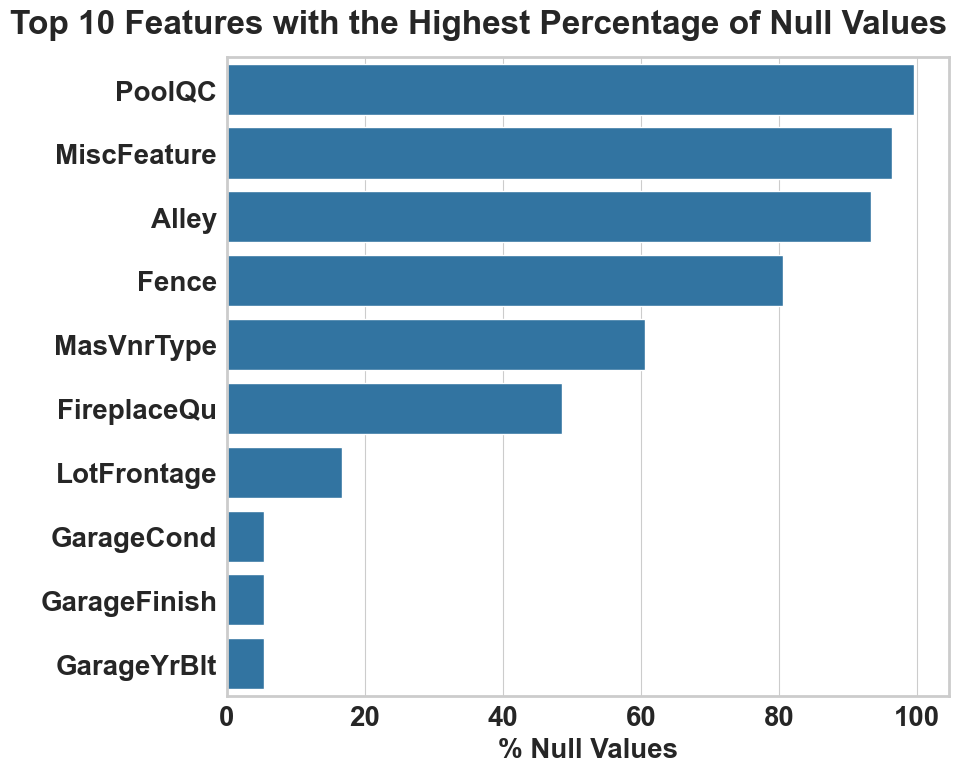

In [100]:
plot_null_counts(data)

## Univariate and Multivariate Feature Relationships

In [101]:
target_name = "SalePrice"
X, y = (
    data.drop(columns = [target_name, 'PID']),
    data[target_name]
)

<Axes: ylabel='Frequency'>

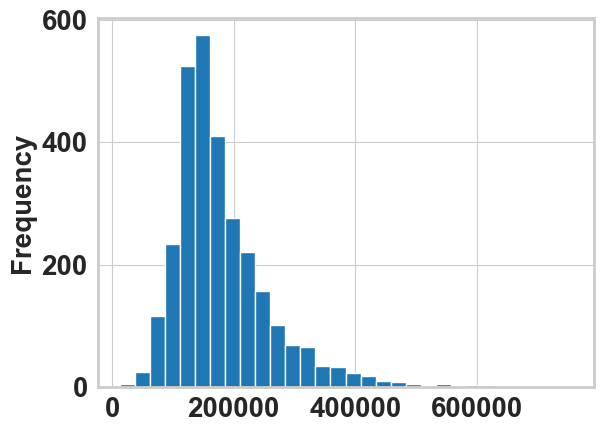

In [102]:
y.plot.hist(bins = 30)

In [103]:
numerical_data = data.select_dtypes(include = "number")
numerical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PID            2930 non-null   int64  
 1   MSSubClass     2930 non-null   int64  
 2   LotFrontage    2440 non-null   float64
 3   LotArea        2930 non-null   int64  
 4   OverallQual    2930 non-null   int64  
 5   OverallCond    2930 non-null   int64  
 6   YearBuilt      2930 non-null   int64  
 7   YearRemod/Add  2930 non-null   int64  
 8   MasVnrArea     2907 non-null   float64
 9   BsmtFinSF1     2929 non-null   float64
 10  BsmtFinSF2     2929 non-null   float64
 11  BsmtUnfSF      2929 non-null   float64
 12  TotalBsmtSF    2929 non-null   float64
 13  1stFlrSF       2930 non-null   int64  
 14  2ndFlrSF       2930 non-null   int64  
 15  LowQualFinSF   2930 non-null   int64  
 16  GrLivArea      2930 non-null   int64  
 17  BsmtFullBath   2928 non-null   float64
 18  BsmtHalf

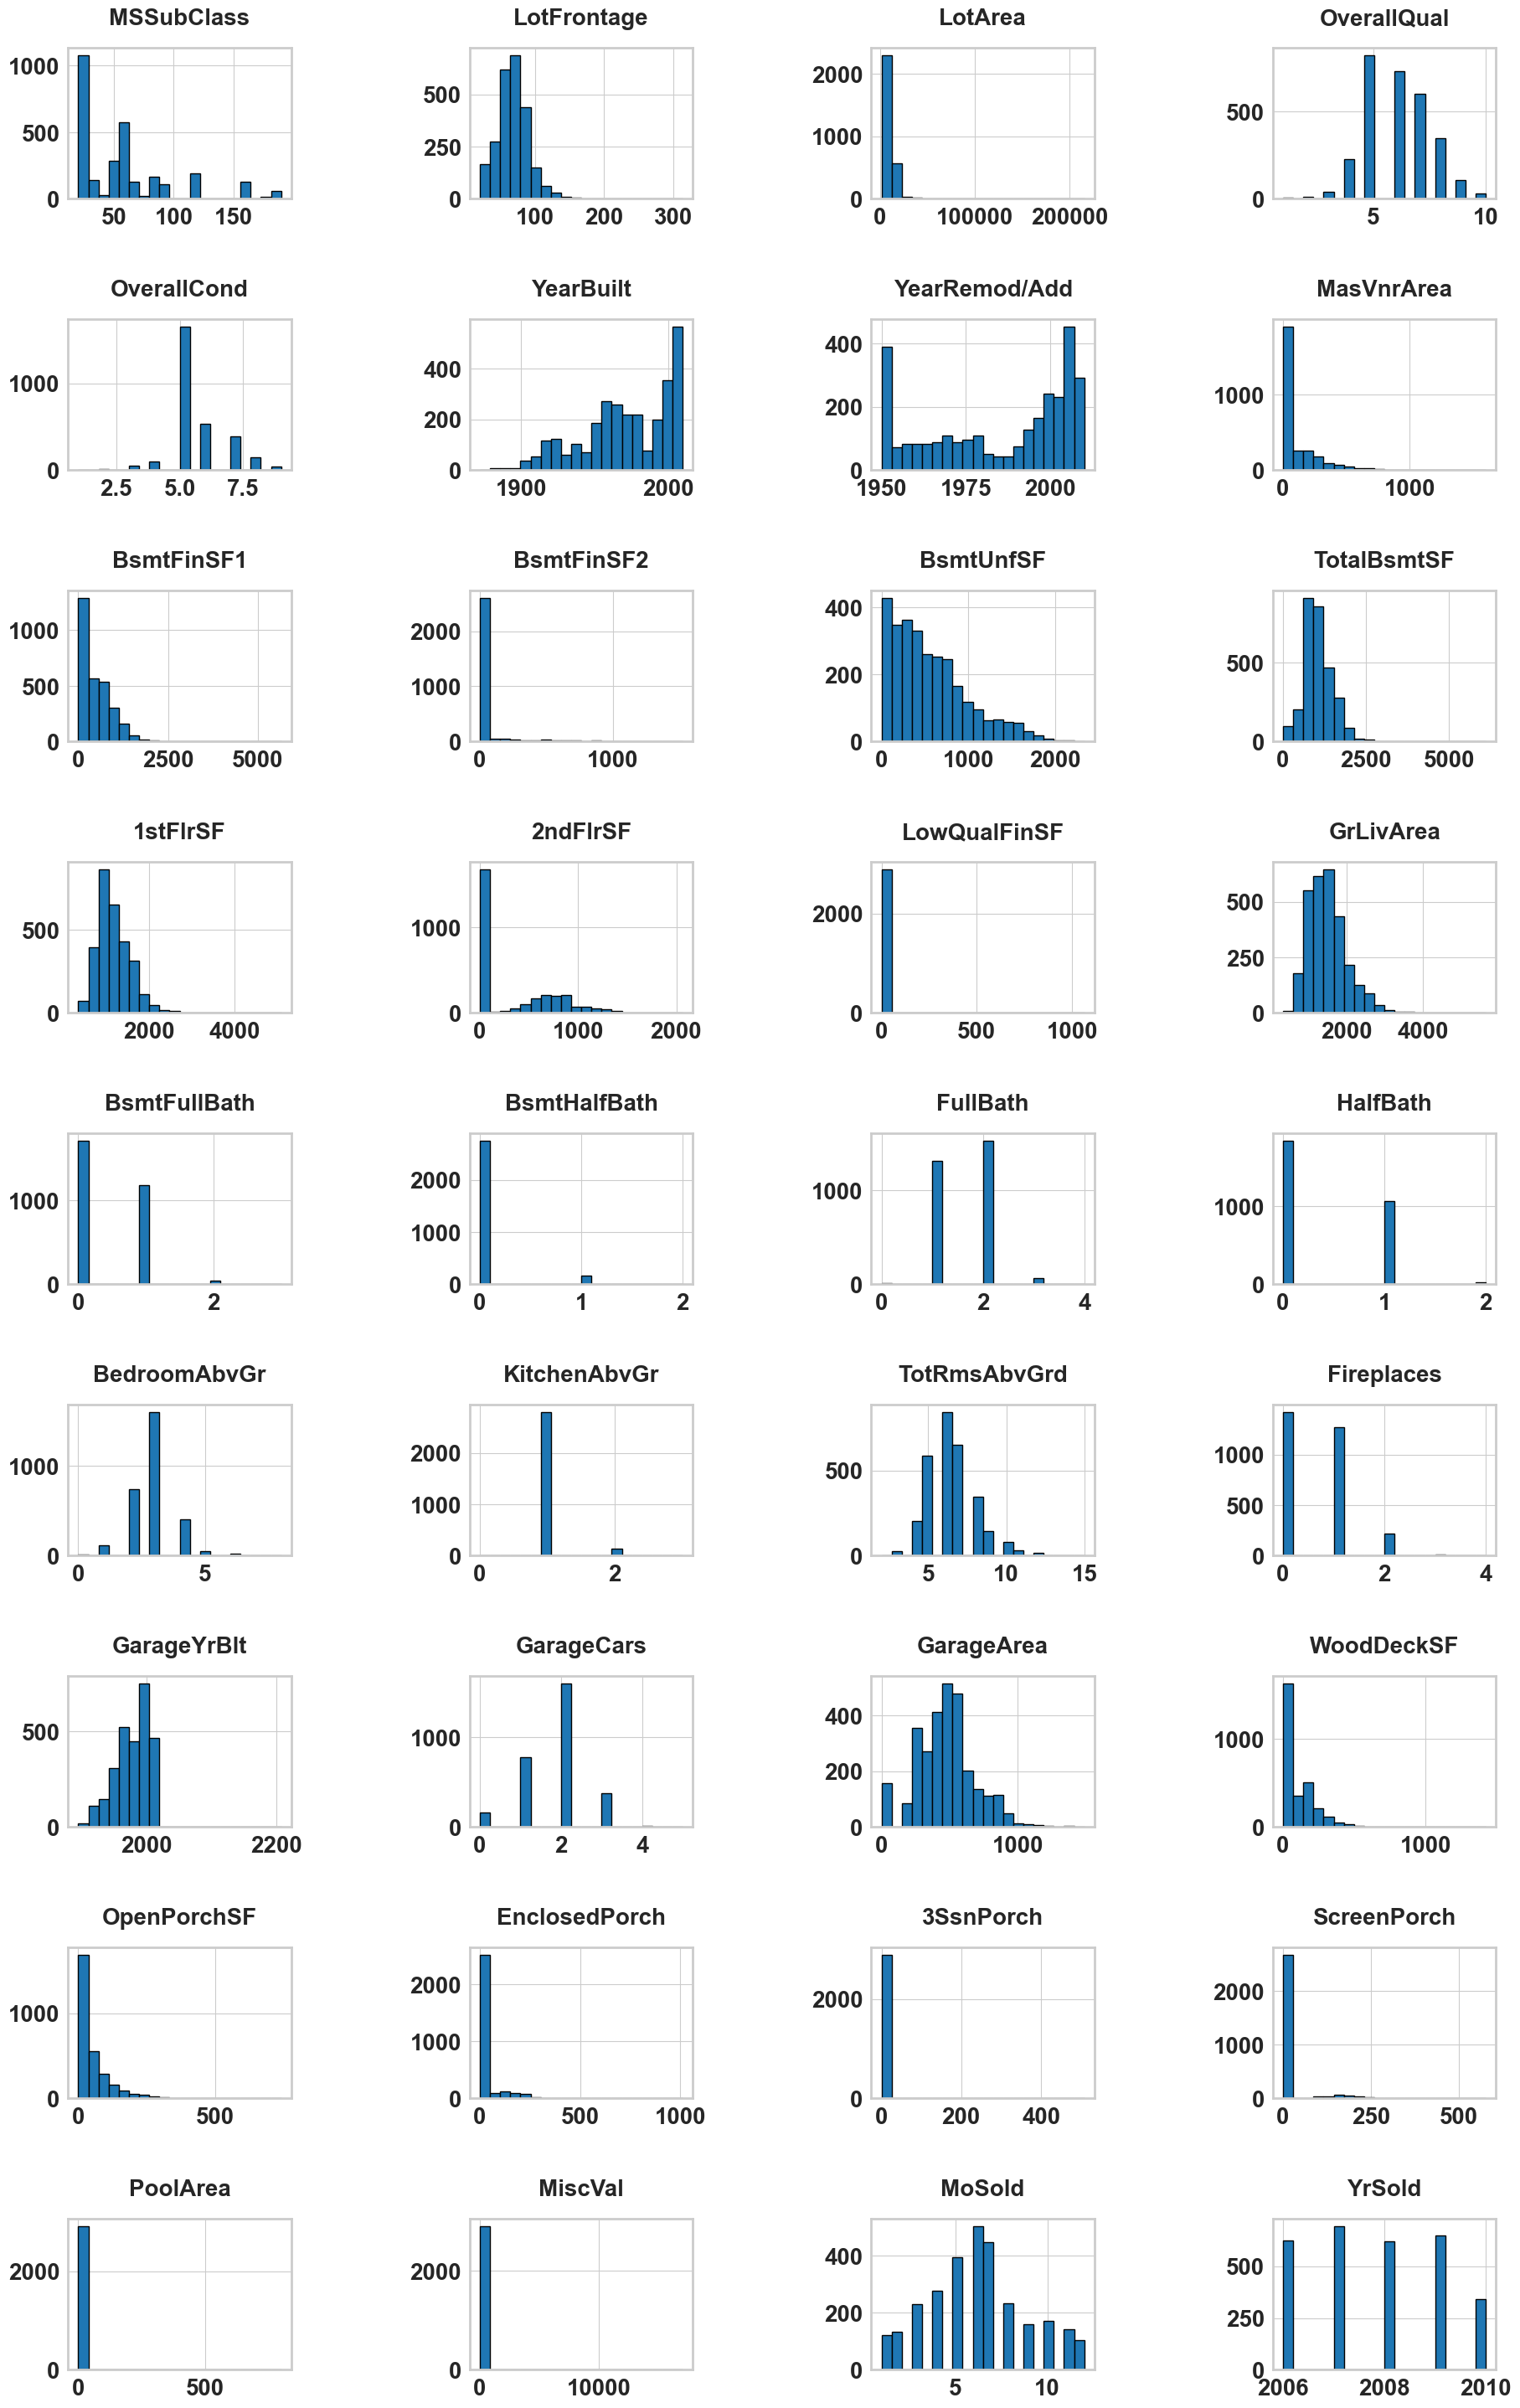

In [104]:
def plot_univariate_numerical_features(df: pd.DataFrame, nrow: int = 9, ncol: int = 4, figsize: tuple = (22, 36), bins: int = 20) -> None:
    """
    Plots histograms for univariate numerical features in a DataFrame.
    
    Parameters:
    - df (pd.DataFrame): The DataFrame containing the data to be plotted.
    - nrow (int, optional): Number of rows in the subplot grid. Default is 9.
    - ncol (int, optional): Number of columns in the subplot grid. Default is 4.
    - figsize (tuple, optional): Size of the figure. Default is (22, 36).
    - bins (int, optional): Number of bins for the histogram. Default is 20.
    
    Returns:
    - None
    """
    
    numerical_data = df.select_dtypes(include=['number'])
    
    numerical_data.hist(
        bins=bins, figsize=figsize, edgecolor="black", layout=(nrow, ncol)
    )
    plt.subplots_adjust(hspace=0.8, wspace=0.8)

plot_univariate_numerical_features(X)


In [105]:
string_data = data.select_dtypes(object)
string_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       2930 non-null   object
 1   Street         2930 non-null   object
 2   Alley          198 non-null    object
 3   LotShape       2930 non-null   object
 4   LandContour    2930 non-null   object
 5   Utilities      2930 non-null   object
 6   LotConfig      2930 non-null   object
 7   LandSlope      2930 non-null   object
 8   Neighborhood   2930 non-null   object
 9   Condition1     2930 non-null   object
 10  Condition2     2930 non-null   object
 11  BldgType       2930 non-null   object
 12  HouseStyle     2930 non-null   object
 13  RoofStyle      2930 non-null   object
 14  RoofMatl       2930 non-null   object
 15  Exterior1st    2930 non-null   object
 16  Exterior2nd    2930 non-null   object
 17  MasVnrType     1155 non-null   object
 18  ExterQual      2930 non-null

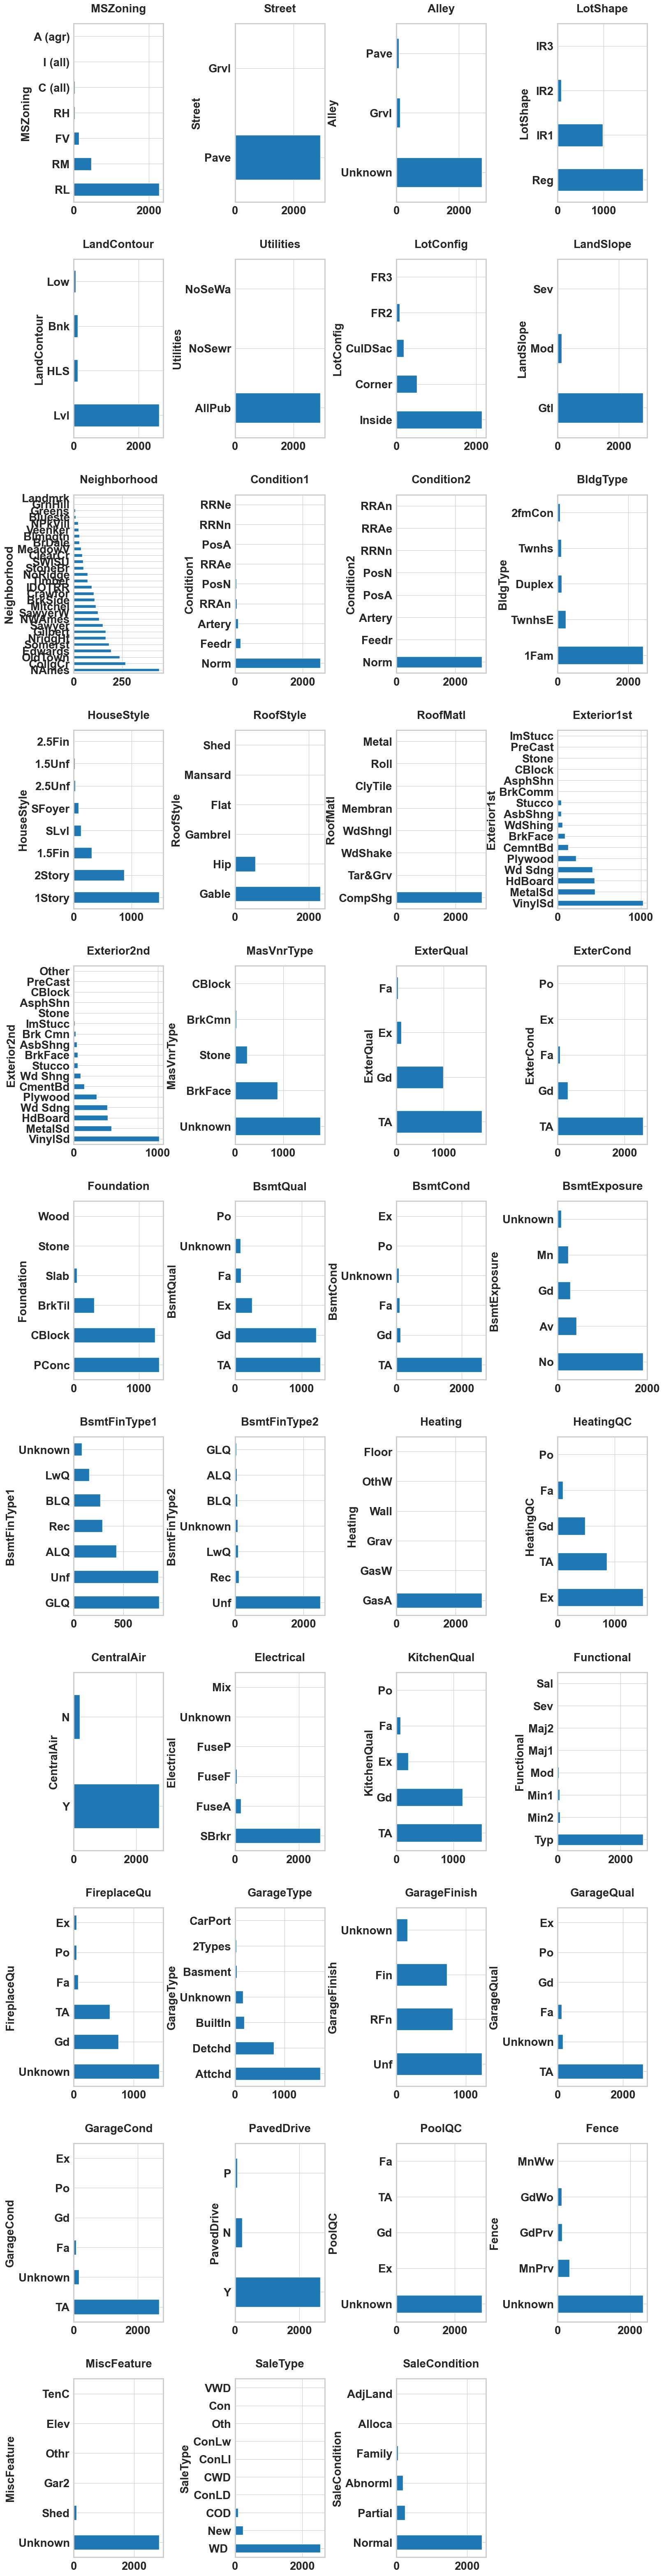

In [106]:
def plot_categorical_features(df: pd.DataFrame, ncol: int = 4, figsize: tuple = (18, 80)) -> None:
    """
    Plots bar charts for categorical features in a DataFrame.
    
    Parameters:
    - df (pd.DataFrame): The DataFrame containing the data to be plotted.
    - ncol (int, optional): Number of columns in the subplot grid. Default is 4.
    - figsize (tuple, optional): Size of the figure. Default is (18, 80).
    
    Returns:
    - None
    """
    string_data = df.select_dtypes(include=['object']).fillna('Unknown')
    n_string_features = string_data.shape[1]
    nrows = ceil(n_string_features / ncol)
    
    fig, axs = plt.subplots(ncols=ncol, nrows=nrows, figsize=figsize)
    
    for feature_name, ax in zip_longest(string_data, axs.flatten()):
        if feature_name is None:
            # do not show the axis
            ax.axis("off")
            continue
        
        string_data[feature_name].value_counts().plot.barh(ax=ax)
        ax.set_title(feature_name)
    
    plt.subplots_adjust(hspace = 0.32, wspace = 0.8)

# Example usage:
plot_categorical_features(X)

In [107]:
def plot_target_by_cat_features(df: pd.DataFrame, column: str, target: str = 'SalePrice', top_n: int = 10) -> None:
    """
    Visualizes the relationship between a categorical feature and a target variable.

    This function fills missing values in the specified categorical column with 'Unknown' and 
    generates a boxplot and a violin plot to show the distribution and spread of the target variable 
    across different categories of the specified feature. If the number of categories exceeds top_n,
    only the top_n categories are displayed and sorted from high to low based on the median target variable.

    Parameters:
    df (pd.DataFrame): The input DataFrame containing the data.
    column (str): The name of the categorical column to be plotted.
    target (str, optional): The name of the target variable to be plotted. Default is 'SalePrice'.
    top_n (int, optional): The number of top categories to display. Default is 10.

    Returns:
    None: The function generates plots and does not return any value.

    Notes:
    - The function fills missing values in the specified categorical column with the string 'Unknown' 
    to ensure all data is included in the plots.
    - The color palette used is 'tab20' from the Seaborn library, which provides a variety of colors 
    for distinguishing different categories.
    - The function creates two subplots: a boxplot and a violin plot, providing a comprehensive view of 
    the data distribution and spread.
    """
    # Make a copy of the DataFrame
    data = df.copy()
    
    # Fill missing values in the categorical column with 'Unknown'
    data[column] = data[column].fillna('Unknown')
    
    # Limit to top_n categories based on median target value
    category_medians = data.groupby(column)[target].median().sort_values(ascending=False)
    top_categories = category_medians.index[:top_n]
    data = data[data[column].isin(top_categories)]
    
    # Sort the categorical column by median target value
    data[column] = pd.Categorical(data[column], categories=top_categories, ordered=True)
    
    # Define a color palette
    palette = sns.color_palette('tab20', n_colors=top_n)
    
    # Create subplots
    fig, ax = plt.subplots(1, 2, figsize = (18, 10), sharey = True, sharex = True)
    
    # Plot a boxplot
    sns.boxplot(data=data, x=target, y=column, palette=palette, ax=ax[0])
    ax[0].set_ylabel('')
    ax[0].set_xlabel("Sales Price [USD]")
    
    # Plot a violin plot
    sns.violinplot(data=data, x=target, y=column, hue=column, palette=palette, ax=ax[1])
    ax[1].set_ylabel('')
    ax[1].set_xlabel("Sales Price [USD]")
    
    # Set a common super-title
    plt.suptitle(f'Sales Price of Homes Available by Top {top_n} {column} in Ames City')
    
    # Minimize horizontal space between figures
    plt.subplots_adjust(wspace=0.02, top = 0.95)
    
    # Rotate x-axis labels if needed
    for axes in ax:
        axes.set_xticklabels(axes.get_xticklabels(), rotation= 0, ha = 'right')
    
    # set right and left spines invisible for ax[0] and ax[1]
    ax[0].spines['right'].set_visible(False)
    ax[1].spines['left'].set_visible(False)

    # Show the plots
    plt.show()

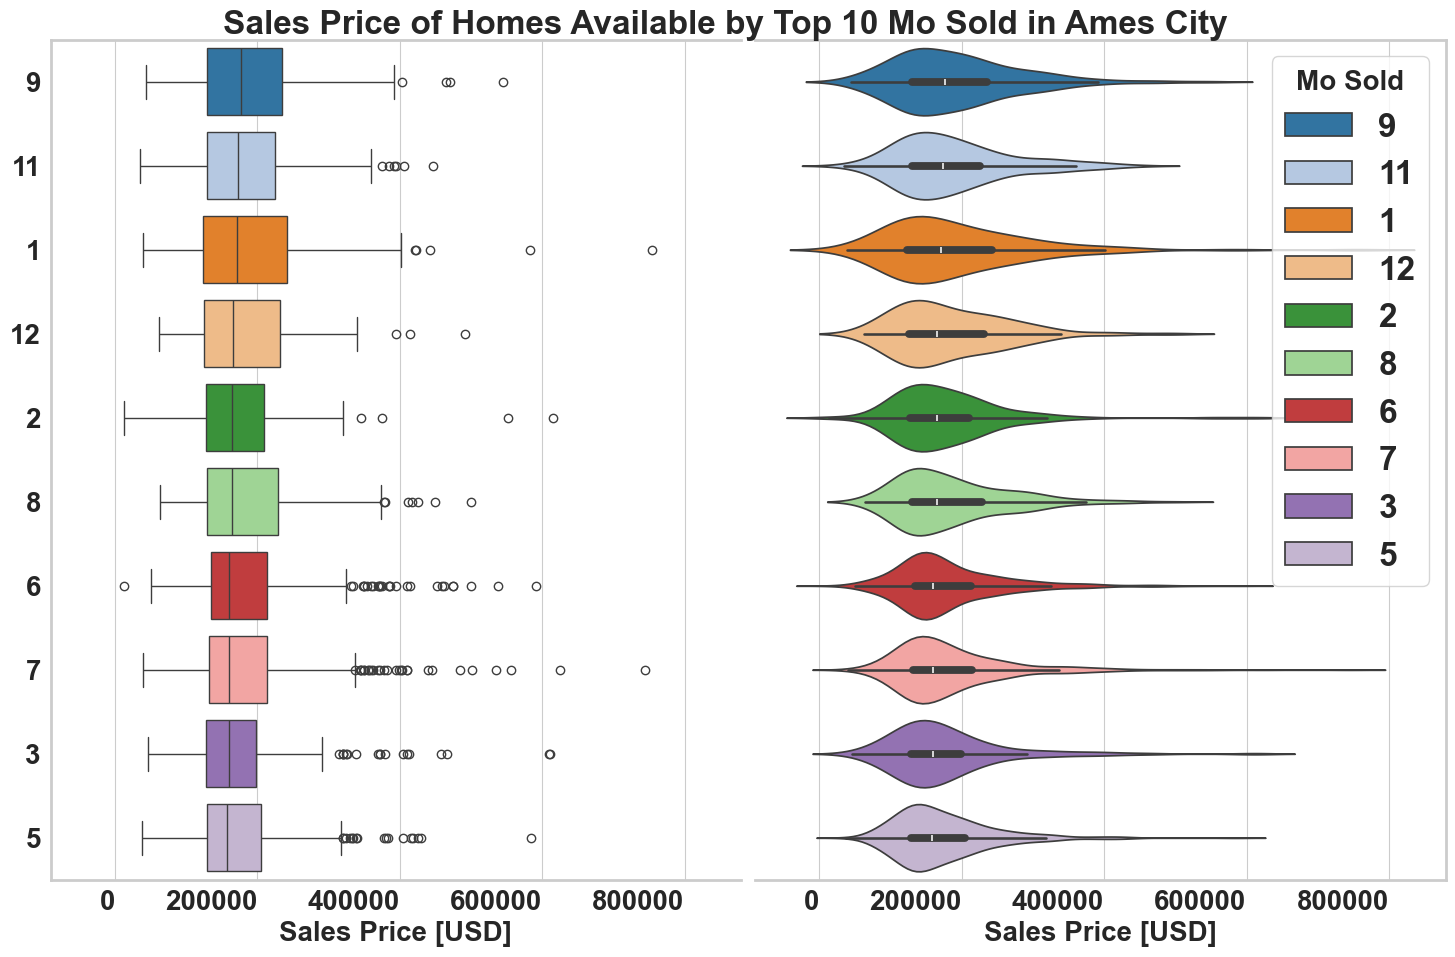

In [251]:
plot_target_by_cat_features(data, 'Mo Sold')

In [249]:
data.columns

Index(['PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish'

<Figure size 1400x800 with 0 Axes>

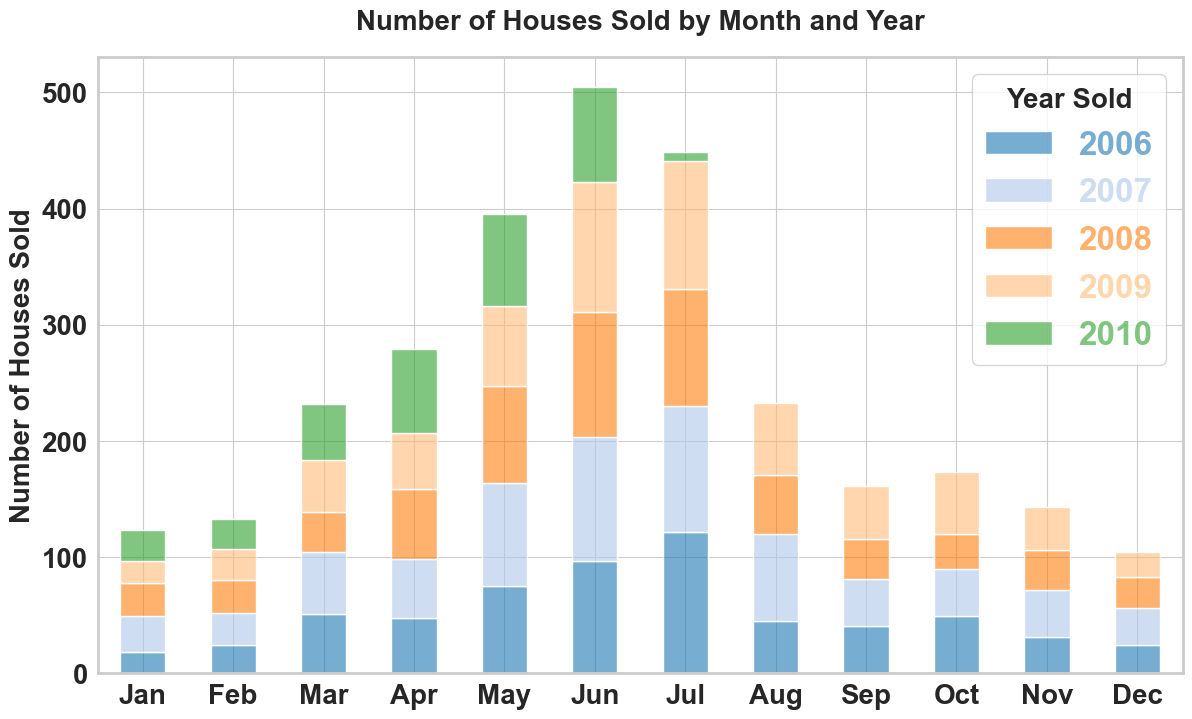

In [109]:
# Group by 'YrSold' and 'MoSold', count and unstack
grouped = X.groupby(['MoSold', 'YrSold']).size().unstack().fillna(0)

# Map month numbers to month names in the columns
month_names = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
grouped.index = grouped.index.map(month_names)

# Define a color palette
palette = sns.color_palette('tab20', n_colors = grouped.shape[1])
palette_with_alpha = [(r, g, b, 0.6) for r, g, b in palette]

# Create the plot
plt.figure(figsize=(14, 8))
ax = grouped.plot(kind='bar', stacked=True, figsize=(14, 8), rot = 0, color = palette_with_alpha)

# Set plot title and labels
plt.title('Number of Houses Sold by Month and Year', fontweight = 'bold')
plt.xlabel('')
plt.ylabel('Number of Houses Sold')

# set legend title and color
plt.legend(labelcolor = 'linecolor', title = 'Year Sold')
# Show the plot
plt.show()


In [110]:
def cramers_v(x, y):
    """Calculate Cramér's V for two categorical variables."""
    confusion_matrix = pd.crosstab(x, y)
    chi2, p, dof, expected = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    minDim = min(confusion_matrix.shape) - 1
    V = np.sqrt((chi2 / n) / minDim)
    return V, p

def filter_strong_associations(df, cramer_threshold = 0.3, p_value_threshold = 0.05):
    """
    Calculate Cramér's V and chi-squared test for each pair of categorical features and 
    return a DataFrame with pairs that have a Cramér's V value greater than cramer_threshold 
    and p-value less than p_value_threshold.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the features.
    cramer_threshold (float, optional): The threshold for Cramér's V value. Default is 0.1.
    p_value_threshold (float, optional): The threshold for p-value. Default is 0.05.
    
    Returns:
    pd.DataFrame: A DataFrame with pairs of columns, Cramér's V values, and p-values.
    """
    categorical_columns = df.select_dtypes(include=['object']).columns
    results = []

    for col1, col2 in combinations(categorical_columns, 2):
        V, p = cramers_v(df[col1].fillna('Unknown'), df[col2].fillna('Unknown'))
        if V > cramer_threshold and p < p_value_threshold:
            results.append({'Column1': col1, 'Column2': col2, 'Cramér\'s V': V, 'p-value': p})
    
    results_df = pd.DataFrame(results)
    return results_df

# Example usage
strong_associations = filter_strong_associations(X)
print(strong_associations)

       Column1        Column2  Cramér's V        p-value
0     MSZoning         Street    0.350307   1.370346e-74
1     MSZoning          Alley    0.419472  3.839313e-213
2     MSZoning      Utilities    0.353416  6.409168e-149
3     MSZoning   Neighborhood    0.543881   0.000000e+00
4        Alley   Neighborhood    0.480565  1.350636e-247
..         ...            ...         ...            ...
73  GarageQual     GarageCond    0.627809   0.000000e+00
74  GarageQual     PavedDrive    0.309125  6.577725e-114
75  GarageCond     PavedDrive    0.330620  3.573558e-131
76      PoolQC    MiscFeature    0.353545  1.328319e-298
77    SaleType  SaleCondition    0.472634   0.000000e+00

[78 rows x 4 columns]


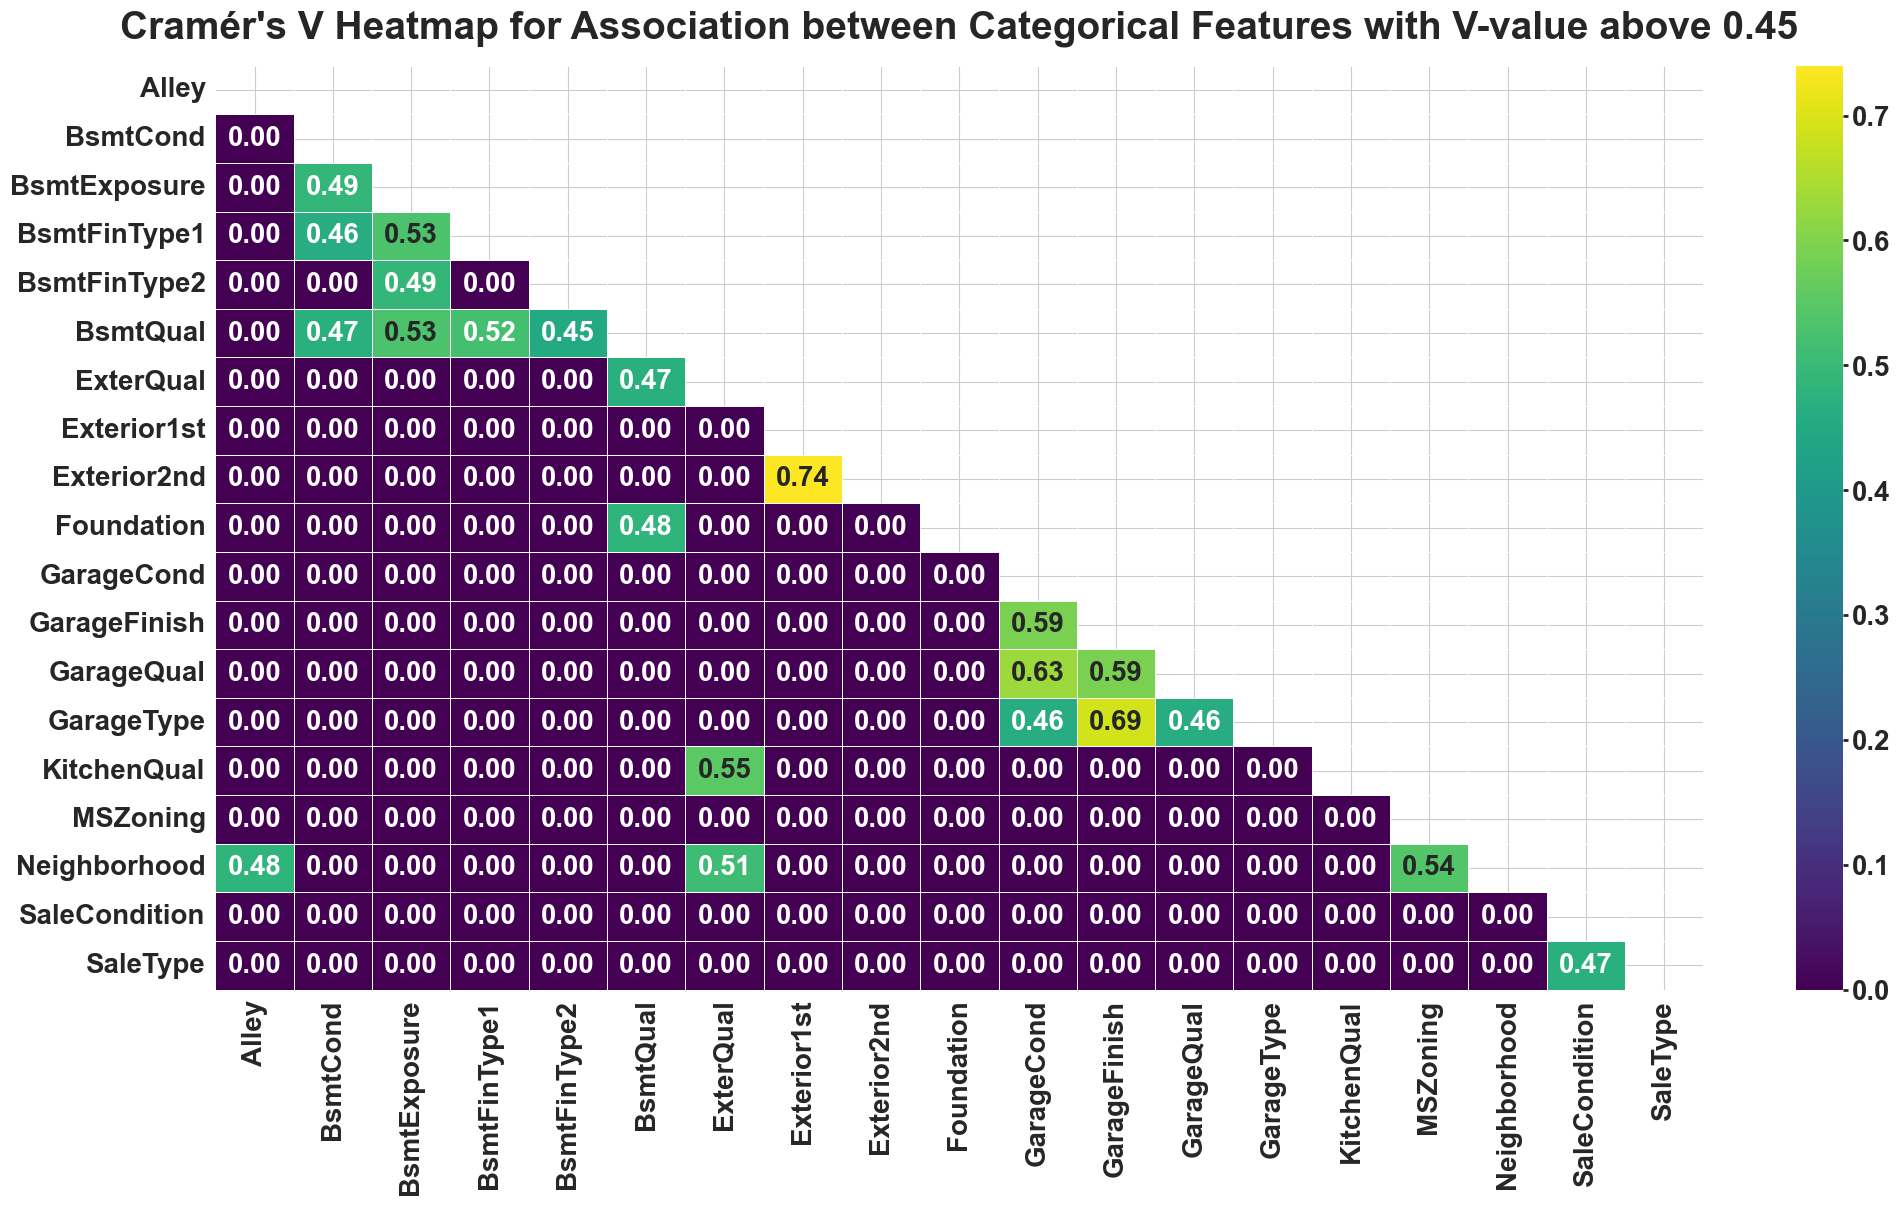

In [111]:
def calculate_cramers_v_matrix(df, cramer_v_threshold = 0.3):
    """
    Calculate the Cramér's V matrix for all pairs of categorical features.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the features.
    cramer_v_threshold (float, optional): The threshold for filtering Cramér's V values.
    
    Returns:
    pd.DataFrame: A DataFrame with Cramér's V values for each pair of categorical features that pass the threshold.
    """
    categorical_columns = df.select_dtypes(include=['object']).columns
    cramers_v_dict = defaultdict(dict)

    for col1, col2 in combinations(categorical_columns, 2):
        V, _ = cramers_v(df[col1].fillna('Unknown'), df[col2].fillna('Unknown'))
        if V >= cramer_v_threshold:
            cramers_v_dict[col1][col2] = round(V, 2)
            cramers_v_dict[col2][col1] = round(V, 2)  # Mirror the value across the diagonal

    # Convert defaultdict to DataFrame
    cramers_v_matrix = pd.DataFrame(cramers_v_dict).fillna(0)  # Fill missing values with 0

    # Ensure the order of columns and index are the same
    cramers_v_matrix = cramers_v_matrix.reindex(sorted(cramers_v_matrix.columns), axis=0)
    cramers_v_matrix = cramers_v_matrix.reindex(sorted(cramers_v_matrix.columns), axis=1)
    
    # Create mask for the upper triangle
    mask = np.triu(np.ones_like(cramers_v_matrix, dtype=bool))

    return cramers_v_matrix.astype(float), mask  # Ensure all values are float and return mask

# Example usage
cramer_v_threshold = 0.45
cramers_v_matrix, mask = calculate_cramers_v_matrix(X, cramer_v_threshold = cramer_v_threshold)

# Plot the heatmap
plt.figure(figsize = (24, 12))
sns.heatmap(cramers_v_matrix, annot = True, cmap = 'viridis', linewidths = .5, fmt='.2f', mask=mask)
plt.title(f"Cramér's V Heatmap for Association between Categorical Features with V-value above {cramer_v_threshold}", fontsize = 28)
plt.show()

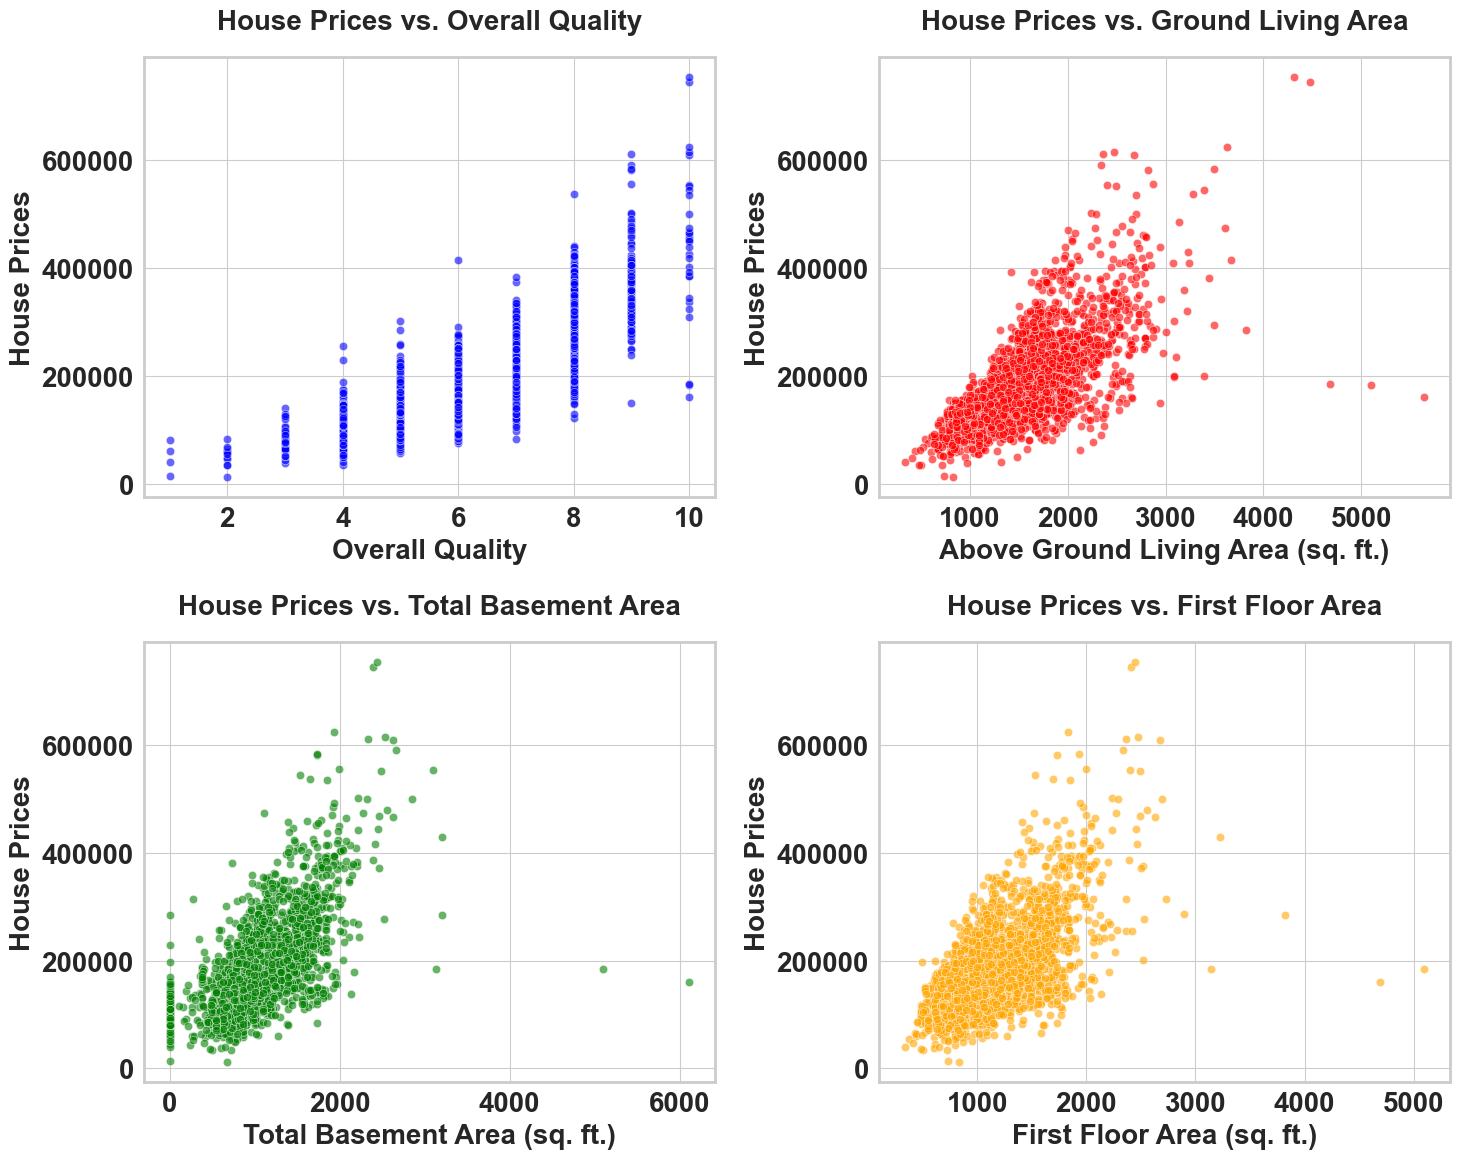

In [112]:
# Setting up the figure and axes
fig, ax = plt.subplots(2, 2, figsize=(15, 12))

palette = ['blue', 'red', 'green', 'orange']
# Scatter plot for SalePrice vs. OverallQual
sns.scatterplot(x= data['OverallQual'], y= y, ax=ax[0, 0], color= palette[0], alpha=0.6)
ax[0, 0].set_title('House Prices vs. Overall Quality')
ax[0, 0].set_ylabel('House Prices')
ax[0, 0].set_xlabel('Overall Quality')
 
# Scatter plot for SalePrice vs. GrLivArea
sns.scatterplot(x=data['GrLivArea'], y= y, ax=ax[0, 1], color = palette[1], alpha=0.6)
ax[0, 1].set_title('House Prices vs. Ground Living Area')
ax[0, 1].set_ylabel('House Prices')
ax[0, 1].set_xlabel('Above Ground Living Area (sq. ft.)')
 
# Scatter plot for SalePrice vs. TotalBsmtSF
sns.scatterplot(x=data['TotalBsmtSF'], y= y, ax=ax[1, 0], color= palette[2], alpha=0.6)
ax[1, 0].set_title('House Prices vs. Total Basement Area')
ax[1, 0].set_ylabel('House Prices')
ax[1, 0].set_xlabel('Total Basement Area (sq. ft.)')
 
# Scatter plot for SalePrice vs. 1stFlrSF
sns.scatterplot(x=data['1stFlrSF'], y= y, ax=ax[1, 1], color= palette[3], alpha=0.6)
ax[1, 1].set_title('House Prices vs. First Floor Area')
ax[1, 1].set_ylabel('House Prices')
ax[1, 1].set_xlabel('First Floor Area (sq. ft.)')
 
# Adjust layout
plt.tight_layout()
plt.show()

## Data Preprocessing

Lets look percentage of possible outliers for contamination factor IsolationForest (the default is auto as defined by original research paper).

In [113]:
def calculate_outlier_percentage(df: pd.DataFrame, lower_percentile: float = 1, upper_percentile: float = 99) -> pd.DataFrame:
    """
    Calculates the percentage of outliers based on winsorization for all numerical variables in the DataFrame.

    Parameters:
    df (pd.DataFrame): The input DataFrame containing the data.
    lower_percentile (float, optional): The lower percentile for winsorization. Default is 5.
    upper_percentile (float, optional): The upper percentile for winsorization. Default is 95.

    Returns:
    pd.DataFrame: A DataFrame containing the column names and the percentage of outliers.
    """
    outlier_percentages = {}

    numerical_cols = df.select_dtypes(include=[np.number]).columns

    for col in numerical_cols:
        x_low, x_high = np.percentile(df[col].dropna(), [lower_percentile, upper_percentile])
        total_values = len(df[col])
        outliers = len(df[~df[col].between(x_low, x_high)])
        outlier_percentage = round((outliers / total_values) * 100, 2)
        outlier_percentages[col] = outlier_percentage

    outlier_df = pd.DataFrame(list(outlier_percentages.items()), columns=['Numerical Features', 'Outliers Percentage'])
    return outlier_df

# Example usage
outlier_percentages = calculate_outlier_percentage(data)
print(outlier_percentages.sort_values(by = 'Outliers Percentage', ascending = False).reset_index(drop = True))

   Numerical Features  Outliers Percentage
0         LotFrontage                17.58
1         GarageYrBlt                 6.38
2                 PID                 2.05
3           GrLivArea                 2.05
4           SalePrice                 2.05
5            1stFlrSF                 2.01
6           YearBuilt                 1.84
7          MasVnrArea                 1.81
8             LotArea                 1.67
9        TotRmsAbvGrd                 1.57
10         GarageArea                 1.06
11         BsmtFinSF1                 1.06
12         BsmtFinSF2                 1.06
13          BsmtUnfSF                 1.06
14        TotalBsmtSF                 1.06
15        OpenPorchSF                 1.02
16         WoodDeckSF                 1.02
17       BedroomAbvGr                 1.02
18        ScreenPorch                 1.02
19           2ndFlrSF                 1.02
20            MiscVal                 1.02
21       LowQualFinSF                 1.02
22         

### Automated Pipelines
Although Scikit learn comes loaded with a set of standard transformers, we will begin with a custom one to understand what they do and how they work. The first thing to remember is that a custom transformer is an estimator and a transformer, so we will create a class that inherits from both BaseEstimator and TransformerMixin. It is a good practice to initialize it with super().__init__(). By inheriting, we get a standard method such as get_params and set_params for free. In the init, we also want to create the model parameter or parameters we want to learn.

<a href = "https://towardsdatascience.com/pipelines-custom-transformers-in-scikit-learn-ef792bbb3260">ref1</a>

<a href = "https://stackoverflow.com/questions/64900801/implementing-knn-imputation-on-categorical-variables-in-an-sklearn-pipeline">ref2</a>

<a href = "https://www.superannotate.com/blog/how-to-optimize-machine-learning-pipeline#:~:text=A%20machine%20learning%20pipeline%20otherwise,a%20fully%2Dfunctioning%20ML%20pipeline.">Automated Pipeline</a>



In [114]:
def fill_missing_values(df, cat_threshold = 0.5):
    """
    Fills missing values in a DataFrame for both categorical and numerical columns based on specific rules.

    Parameters:
    -----------
    df : pd.DataFrame
        The input DataFrame with missing values.
    cat_threshold : float, optional (default = 0.5 percentage)
        The threshold for handling missing values in categorical columns.
        - If the percentage of missing values in a categorical column is less than `cat_threshold`, 
        fill with the most frequent value.
        - If it exceeds the threshold, fill with the category 'Unknown'.

    Returns:
    --------
    pd.DataFrame
        A DataFrame with no missing values.
        
    Rules for filling missing values:
    1. Categorical columns:
        - If missing values are less than `cat_threshold`, fill with the most frequent category.
        - If greater than the threshold, fill with 'Unknown'.
    2. LotFrontage and GarageYrBlt columns:
        - Fill using groupby medians based on relevant related columns.
    3. Other numeric columns:
        - Fill missing values with the overall median of the column.
    """

    # Make a copy of the original DataFrame
    data = df.copy()

    # Handle missing values in categorical columns
    for col in data.select_dtypes(include=['object', 'category']).columns:
        missing_ratio = data[col].isnull().mean() * 100.
        if missing_ratio > cat_threshold:
            data[col] = data[col].fillna('Unknown')
        else:
            data[col] = data[col].fillna(data[col].mode()[0])

    # Handle LotFrontage with groupby median imputation
    if 'LotFrontage' in data.columns:
        data['LotFrontage'] = data.groupby(['HouseStyle', 'Neighborhood', 'BldgType', 
        'LandContour', 'LotConfig'])['LotFrontage'].transform(lambda x: x.fillna(x.median()))

    # Handle GarageYrBlt with groupby median imputation
    if 'GarageYrBlt' in data.columns:
        data['GarageYrBlt'] = data.groupby(['YearBuilt', 'GarageType', 'Neighborhood'])['GarageYrBlt'].transform(lambda x: x.fillna(x.median()))

    # Handle other numeric columns with median imputation
    for col in data.select_dtypes(include=['number']).columns:
        if data[col].isnull().sum() > 0:
            data[col] = data[col].fillna(data[col].median())

    return data


In [115]:
class CustomScaler(BaseEstimator, TransformerMixin):
    def __init__(self):
        super().__init__()
        self.means_ = None
        self.std_ = None

    def fit(self, X, y=None):
        X = X.to_numpy()
        self.means_ = X.mean(axis=0, keepdims=True)
        self.std_ = X.std(axis=0, keepdims=True)

        return self

    def transform(self, X, y=None):
        X[:] = (X.to_numpy() - self.means_) / self.std_

        return X

In [116]:
data.columns

Index(['PID', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemod/Add', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDri

### Feature Engineering

In [117]:
# Create new features
X['TotalSqFt'] = X['GrLivArea'] + X['TotalBsmtSF']
X['YrRemodAge'] = X['YrSold'] - X['YearRemod/Add']
X['HouseAge'] = 2010 - X['YearBuilt']
X['GarageAge'] = 2010 - X['GarageYrBlt']
X['TotalBaths'] = X['FullBath'] + 0.5 * X['HalfBath'] + X['BsmtFullBath'] + 0.5 * X['BsmtHalfBath']

### Split the data set into train and test set

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [119]:
X_train = fill_missing_values(X_train)

### Feature Selection

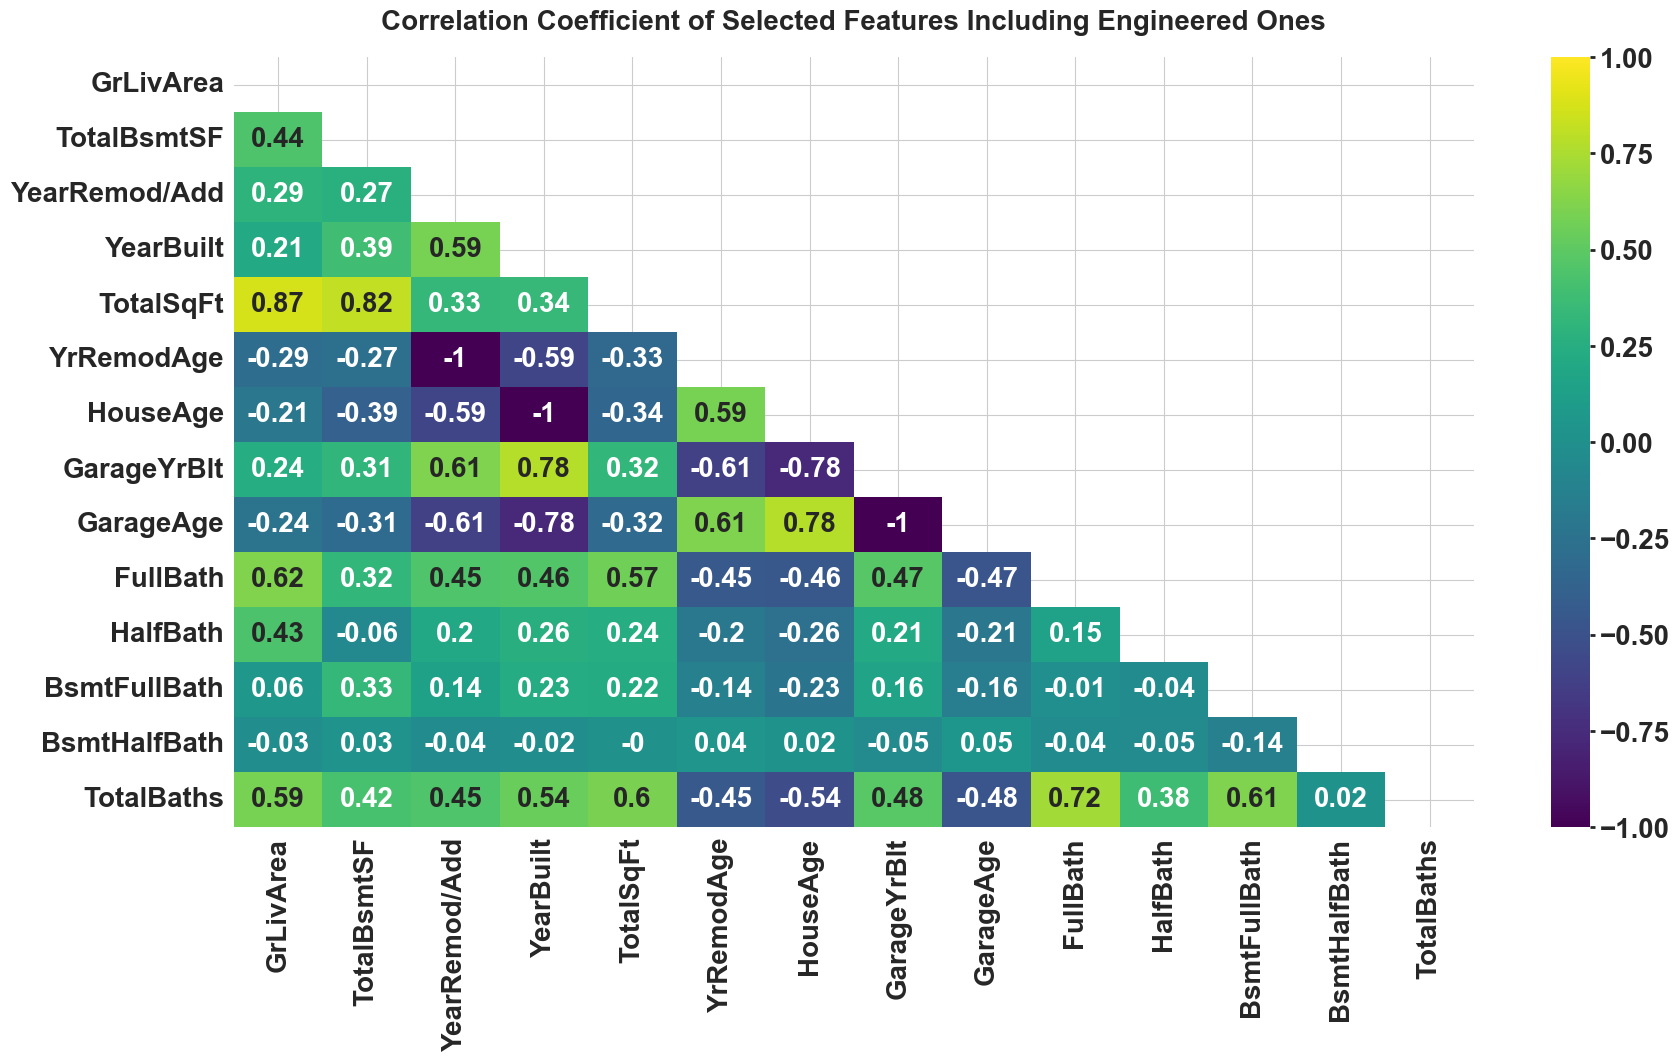

In [120]:
# Select old and new features
selected_features = ['GrLivArea', 'TotalBsmtSF', 'YearRemod/Add', 'YearBuilt', 'TotalSqFt', 'YrRemodAge', 'HouseAge',
                     'GarageYrBlt', 'GarageAge', 'FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath', 'TotalBaths']

# Compute the correlations for the selected features
corr_matrix = X_train[selected_features].corr().round(2)

# Generate a mask to only show the bottom triangle
mask = np.triu(np.ones_like(corr_matrix, dtype = bool))

# Generate the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot = True, mask = mask, vmin = -1, vmax = 1, cmap = 'viridis')
plt.title('Correlation Coefficient of Selected Features Including Engineered Ones')
plt.show()

## Top-n Categorical Features

In [121]:
X_train_new = X_train.drop(columns = ['GrLivArea', 'TotalBsmtSF', 'YearRemod/Add', 'YearBuilt', 'GarageYrBlt', 
                            'FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath'])
X_test_new = X_test.drop(columns = ['GrLivArea', 'TotalBsmtSF', 'YearRemod/Add', 'YearBuilt', 'GarageYrBlt', 
                            'FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath'])

In [122]:
def anova_tests(df: pd.DataFrame, target: Union[str, pd.Series]) -> pd.DataFrame:
    """
    Perform ANOVA tests to assess the relationship between categorical inputs and a numerical target.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    target (str or pd.Series): The name of the numerical target column or a standalone Series.

    Returns:
    pd.DataFrame: A DataFrame with the ANOVA F-values and p-values for each categorical column.
    """
    # Check if target is a string (column name) or a standalone Series
    if isinstance(target, str):
        # Ensure the target column is in the DataFrame
        if target not in df.columns:
            raise ValueError("Target column not found in DataFrame")
        target_data = df[target]
    else:
        # If the target is provided as a Series
        target_data = target
    
    # Identify categorical columns
    categorical_columns = df.select_dtypes(include=['object']).columns
    
    # Store results
    results = []

    for cat_col in categorical_columns:
        # Group the numerical data by the categorical column
        groups = [target_data[df[cat_col] == category] for category in df[cat_col].unique()]
        
        # Perform ANOVA
        f_value, p_value = stats.f_oneway(*groups)
        
        # Append results
        results.append({'Categorical Column': cat_col, 'F-value': f_value, \
        'P-value': p_value})
    return pd.DataFrame(results).sort_values(by = ['F-value', 'P-value'], 
            ascending = False).reset_index(drop = True)

In [123]:
anova_tests(X_train, y_train)

Categorical Column     F-value        P-value
0           ExterQual  736.365436   0.000000e+00
1         KitchenQual  672.454143  3.239848e-315
2            BsmtQual  453.760570   0.000000e+00
3        GarageFinish  320.150197  3.723546e-174
4         FireplaceQu  204.513701  3.218798e-181
5          CentralAir  183.137224   3.126434e-40
6          Foundation  174.396667  5.114029e-158
7           HeatingQC  151.375728  2.845975e-115
8          GarageType  122.352003  9.276168e-135
9        BsmtExposure  119.692946   5.204699e-93
10         MasVnrType  117.401297   2.314388e-91
11       BsmtFinType1  113.167990  1.269505e-125
12       Neighborhood  109.079016   0.000000e+00
13         PavedDrive   99.103620   4.843651e-42
14           LotShape   83.288347   3.380142e-51
15      SaleCondition   66.861001   1.896794e-65
16           MSZoning   51.159058   2.211045e-59
17         GarageQual   47.774786   3.516771e-47
18         GarageCond   41.740844   2.790526e-41
19           SaleType   37.758166   4.520885e-63
20         Electrical   37.358662   2.499038e-30
21        LandContour   36.917644   2.631380e-23
22          RoofStyle   31.704505   2.427405e-31
23        Exterior1st   28.905261   1.297492e-75
24        Exterior2nd   27.819635   1.028027e-72
25              Alley   26.143138   5.903591e-12
26         HouseStyle   25.801560   3.339012e-34
27           BsmtCond   24.472768   4.318790e-24
28              Fence   22.126109   5.971170e-18
29           BldgType   19.324416   1.177290e-15
30             PoolQC   15.686937   1.130099e-12
31          ExterCond   14.854146   5.441564e-12
32          LotConfig   13.159861   1.328566e-10
33         Condition1   12.930462   2.263848e-18
34       BsmtFinType2   12.625995   4.600965e-14
35             Street    9.027586   2.687551e-03
36           RoofMatl    7.621133   4.052195e-09
37          LandSlope    6.823855   1.109283e-03
38         Condition2    6.199673   3.268890e-07
39         Functional    5.861218   9.179067e-07
40            Heating    4.421168   5.199240e-04
41        MiscFeature    2.859832   2.226286e-02
42          Utilities    1.575759   2.070698e-01

## Categorical Feature Importance in Predicting Sale Price

When examining the importance of features in predicting **Sale Price**, we analyze the **ANOVA F-values** and **p-values**.


### F-value:
- A higher F-value indicates significant differences in group means (based on categorical features), suggesting that the feature greatly influences the target variable (Sale Price).

### p-value:
- A p-value below **0.05** signifies statistical significance. Smaller p-values provide stronger evidence against the null hypothesis (which posits that the group means are equal), indicating that the feature has a notable effect on Sale Price.

## Results Summary:

| **Categorical Column** | **F-value** | **p-value** |
|------------------------|-------------|-------------|
| ExterQual              | 809.62      | 0.000000e+00 |
| GarageCars             | 412.91      | 0.000000e+00 |
| KitchenQual            | 543.67      | 0.000000e+00 |
| Neighborhood           | 120.20      | 0.000000e+00 |
| BsmtQual               | 477.84      | 0.000000e+00 |

### Highly Significant Features:
- **ExterQual (F-value: 809.62, p-value: 0.0)**: Extremely strong relationship with Sale Price.
- **GarageCars (F-value: 412.91, p-value: 0.0)**: Significant impact.
- **KitchenQual (F-value: 543.67, p-value: 0.0)**: Notable influence.
- **Neighborhood (F-value: 120.20, p-value: 0.0)**: Affects Sale Price significantly.
- **BsmtQual (F-value: 477.84, p-value: 0.0)**: Highly significant as well.

### Less Significant Features:
- **Utilities (F-value: 2.995, p-value: 0.08)**: Indicates lower significance.
- **BsmtHalfBath (F-value: 1.142, p-value: 0.33)**: Not statistically significant.
- **BsmtFinSF2 (F-value: 0.737, p-value: 0.999)**: Not significant.

## Next Steps:

1. **Prioritize Significant Features**:
   - Focus on impactful features like **ExterQual**, **GarageCars**, and **KitchenQual** for your predictive models, as they strongly influence Sale Price.

2. **Review Less Significant Features**:
   - Consider dropping or transforming features like **BsmtFinSF2** and **BsmtHalfBath**, as they contribute minimally to Sale Price predictions.

3. **Analyze Cramér's V Value**:
   - To avoid having strongly associated features, examine Cramér's V value, which measures the association between categorical variables. This step helps in selecting features that are not overly correlated, improving model performance and interpretability.

Lets drop categorical features that has strong association with other categorical features and select top 4 categorical features that people usually look for. Neighborhood, Fireplace Quality, Kitchen Quality, Basement Exposure.


## Selecting Top-n Numerical Features

### Use r_regression and f_regression from sklearn
<a href = 'https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.r_regression.html'> r_regression</a>
Compute Pearson’s r for each features and the target.

Pearson’s r is also known as the Pearson correlation coefficient.

Linear model for testing the individual effect of each of many regressors. This is a scoring function to be used in a feature selection procedure, not a free standing feature selection procedure.

The cross correlation between each regressor and the target is computed as:
E[(X[:, i] - mean(X[:, i])) * (y - mean(y))] / (std(X[:, i]) * std(y))

### Feature Selection: f_regression vs r_regression

Both `f_regression` and `r_regression` are used for feature selection based on linear relationships between features and the target variable.

- **f_regression** is preferred because it provides F-scores and p-values to assess feature significance, independent of positive or negative associations.
- **r_regression** computes Pearson correlation, returning values between -1 and 1, but lacks p-values, making it less useful for assessing statistical significance.

For downstream classifiers, **f_regression** is typically favored for its statistical rigor.

In [124]:
from sklearn.feature_selection import r_regression, f_regression

# Compute r_regression scores
# scores = f_regression(data_new.select_dtypes(include='number'), target)

# Compute f_regression scores
f_score, p_value = f_regression(X_train_new.select_dtypes(include='number'), y_train)

# Create a DataFrame with scores
scores_df = pd.DataFrame({
    'Feature': X_train_new.select_dtypes(include='number').columns,
    'F-Score': f_score,
    'P-Value': p_value
}).sort_values(by = ['F-Score', 'P-Value'], ascending=False).reset_index(drop = True)

# Select top features
top_features = scores_df.head(35)

# Sort top_features by the absolute value of 'Score'
print(top_features)



          Feature      F-Score        P-Value
0     OverallQual  4030.762673   0.000000e+00
1       TotalSqFt  3511.813072   0.000000e+00
2      GarageCars  1661.535113  5.401955e-275
3      TotalBaths  1613.790893  6.879371e-269
4      GarageArea  1566.511083  9.043226e-263
5        1stFlrSF  1369.423612  1.939001e-236
6        HouseAge   991.671383  8.387002e-182
7      YrRemodAge   868.419479  1.267421e-162
8       GarageAge   778.032522  4.405989e-148
9      MasVnrArea   717.070657  4.925451e-138
10   TotRmsAbvGrd   684.065511  1.648497e-132
11     Fireplaces   655.021473  1.346129e-127
12     BsmtFinSF1   512.830777  7.774940e-103
13     WoodDeckSF   292.181400   8.003561e-62
14    LotFrontage   260.781788   1.056003e-55
15    OpenPorchSF   227.782028   3.460194e-49
16       2ndFlrSF   197.657484   3.663641e-43
17        LotArea   171.675782   6.629992e-38
18      BsmtUnfSF    64.430720   1.565991e-15
19   BedroomAbvGr    53.371996   3.765759e-13
20    ScreenPorch    44.755253   2

### Feature Selection Based on F-Score and P-Value

Based on the F-scores and p-values, the following conclusions can be drawn:

#### Features to Keep:
- **TotalSqFt**, **OverallQual**, **1stFlrSF**, **TotalBaths**, **GarageCars**, **GarageArea**, **HouseAge**, etc.
  - These features have high F-scores and very low p-values (statistically significant), indicating they are important predictors.

#### Features to Drop:
- **3SsnPorch**, **PoolArea**, **LowQualFinSF**, **BsmtFinSF2**, **MiscVal**, **MoSold**, **YrSold**
  - These features have low F-scores and high p-values (statistically insignificant), suggesting they have weak relationships with the target variable.


In [125]:
# compute the vif for all given features
def compute_vif(df):
    
    d = df.select_dtypes(include = 'number')
    # the calculation of variance inflation requires a constant
    d['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = d.columns
    vif["VIF"] = [variance_inflation_factor(d.values, i) for i in range(d.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif
# Criterion: Remove variables with VIF >= 5.0

In [126]:
compute_vif(X_train_new).sort_values(by = 'VIF', ascending = False).reset_index(drop = True)

Variable          VIF
0       TotalSqFt  2980.062541
1      BsmtFinSF1   957.601977
2       BsmtUnfSF   882.734802
3        2ndFlrSF   856.740562
4        1stFlrSF   697.474231
5      BsmtFinSF2   136.687850
6    LowQualFinSF    10.265053
7      GarageCars     5.578599
8      GarageArea     5.443760
9    TotRmsAbvGrd     4.479966
10       HouseAge     4.436962
11      GarageAge     3.170258
12    OverallQual     3.041922
13     TotalBaths     3.038840
14     YrRemodAge     2.318115
15   BedroomAbvGr     2.297721
16    LotFrontage     1.678630
17     MSSubClass     1.647154
18    OverallCond     1.549551
19   KitchenAbvGr     1.539661
20     Fireplaces     1.531721
21     MasVnrArea     1.407207
22        LotArea     1.288627
23  EnclosedPorch     1.249255
24     WoodDeckSF     1.235431
25    OpenPorchSF     1.203299
26       PoolArea     1.107620
27    ScreenPorch     1.085283
28        MiscVal     1.057475
29         YrSold     1.051071
30         MoSold     1.040926
31      3SsnPorch     1.015800

From the VIF values, TotalSqFt, BsmtFinSF1, BsmtUnfSF, 2ndFlrSF, and 1stFlrSF have extremely high VIF scores, indicating severe multicollinearity. These features are likely highly correlated with each other, making them problematic for regression analysis. We might want to keep only TotalSqFt and remove other area related features BsmtFinSF1, BsmtUnfSF, 2ndFlrSF, and 1stFlrSF as they have lower F-Score and P-values that might reduce VIF score.

To address this, we may consider removing some of these features or combining them to reduce redundancy. Features with lower VIF values, such as GarageCars, GarageArea, and TotRmsAbvGrd, are less likely to suffer from multicollinearity.

In [127]:
compute_vif(X_train_new.drop(columns = ['BsmtFinSF1', 'BsmtUnfSF', '2ndFlrSF', '1stFlrSF', 'GarageArea',
        "2ndFlrSF", "BsmtUnfSF", "BedroomAbvGr", "EnclosedPorch", "ScreenPorch", 
    "KitchenAbvGr", "OverallCond", "MSSubClass", "3SsnPorch", "PoolArea", 
    "LowQualFinSF", "BsmtFinSF2", "MiscVal", "MoSold", "YrSold"])).\
sort_values(by = 'VIF', ascending = False).reset_index(drop = True)

Variable       VIF
0      TotalSqFt  3.536970
1       HouseAge  3.389633
2      GarageAge  2.955172
3    OverallQual  2.711003
4     TotalBaths  2.097282
5   TotRmsAbvGrd  1.958635
6     YrRemodAge  1.909756
7     GarageCars  1.893344
8     Fireplaces  1.401744
9     MasVnrArea  1.357075
10   LotFrontage  1.356635
11       LotArea  1.269913
12   OpenPorchSF  1.165339
13    WoodDeckSF  1.158316

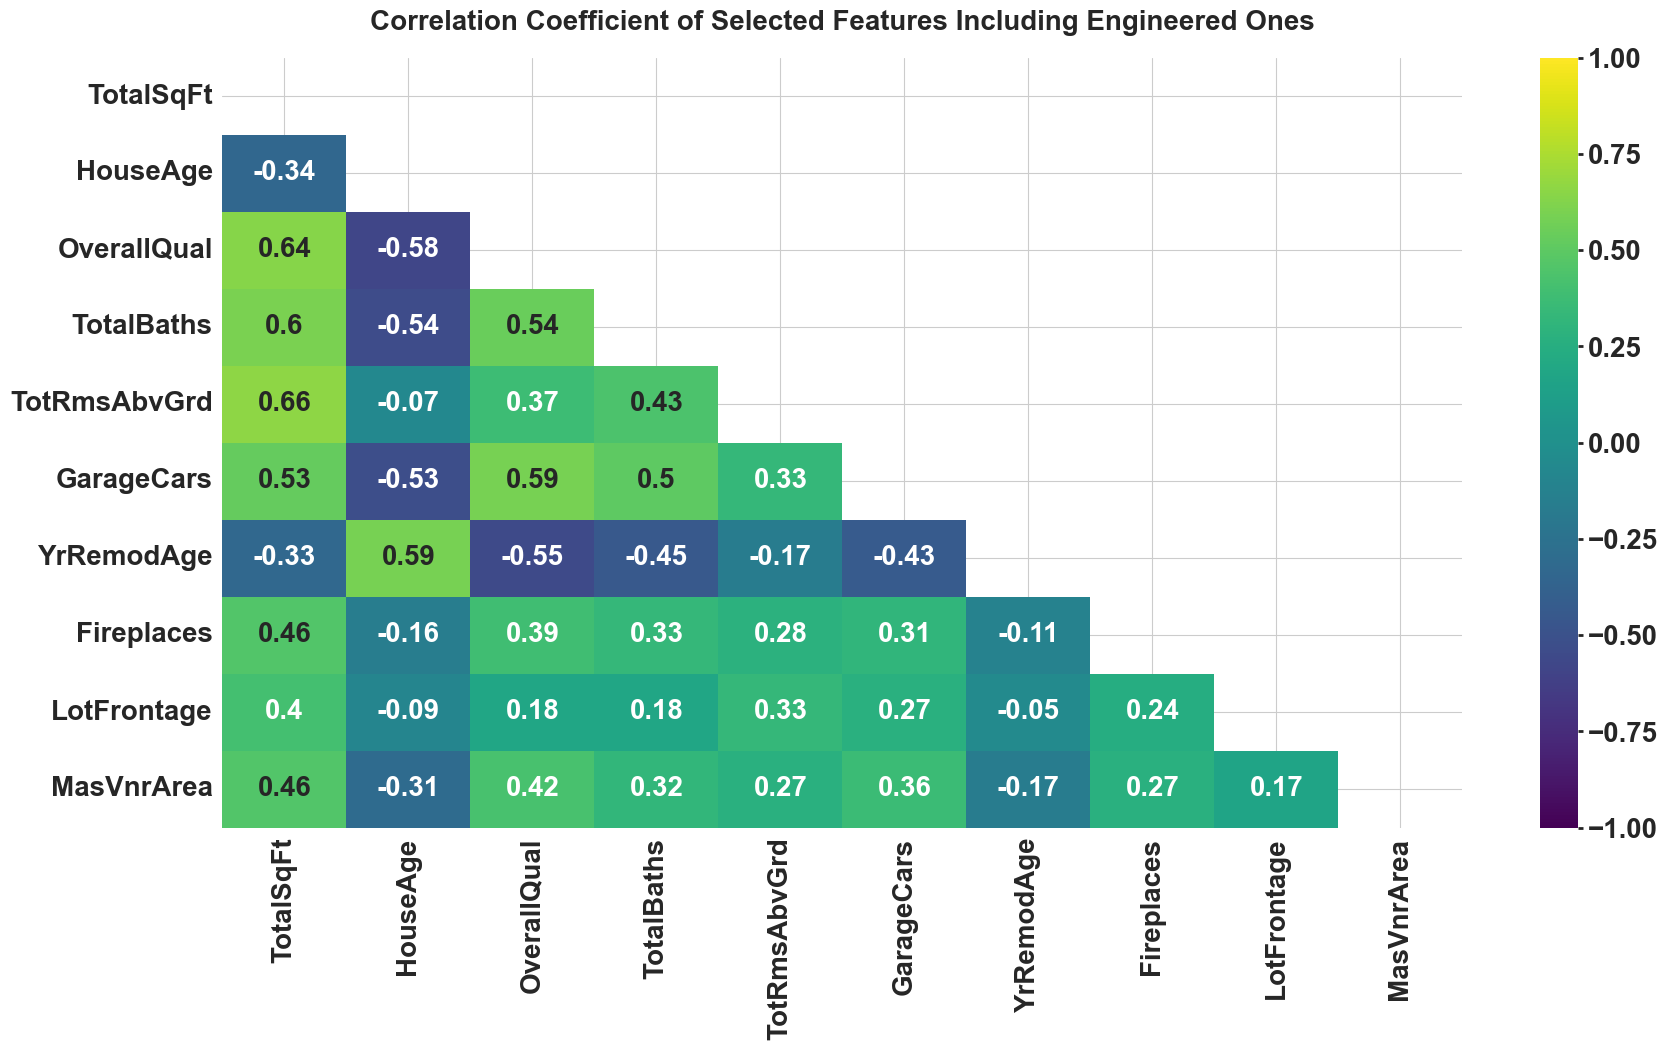

In [128]:
# Select old and new features
selected_features = [
    "TotalSqFt", "HouseAge", "OverallQual", "TotalBaths", 
    "TotRmsAbvGrd", "GarageCars", "YrRemodAge", "Fireplaces",
    "LotFrontage", "MasVnrArea"]


# Compute the correlations for the selected features
corr_matrix = X_train_new[selected_features].corr().round(2)

# Generate a mask to only show the bottom triangle
mask = np.triu(np.ones_like(corr_matrix, dtype = bool))

# Generate the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot = True, mask = mask, vmin = -1, vmax = 1, cmap = 'viridis')
plt.title('Correlation Coefficient of Selected Features Including Engineered Ones')
plt.show()

In [129]:
compute_vif(X_train_new[selected_features])

Variable       VIF
0     TotalSqFt  3.367572
1      HouseAge  2.283658
2   OverallQual  2.657610
3    TotalBaths  2.065626
4  TotRmsAbvGrd  1.949337
5    GarageCars  1.872338
6    YrRemodAge  1.795730
7    Fireplaces  1.345782
8   LotFrontage  1.252839
9    MasVnrArea  1.354716

# Model Building

https://machinelearningmastery.com/from-features-to-performance-crafting-robust-predictive-models/

## Base Model: CatBoost with all features
Why CatBoost is good?

<img src="https://i.sstatic.net/Fmqc7.png" alt="Image Description" width="500" height="600">

https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation


In [131]:
# Identify and fill NaNs in categorical columns
cat_features = [col for col in X_train_new.columns if X_train_new[col].dtype == 'object']
# Define and train the default CatBoost Model
base_model = CatBoostRegressor(cat_features = cat_features, random_state = 42, verbose = 0)
base_scores = cross_val_score(base_model, X_train_new, y_train, cv = 5, scoring = 'r2')
print(f"Average r2 score for default CatBoost: {base_scores.mean():.4f}")

Average r2 score for default CatBoost: 0.9125


In [132]:
base_scores

array([0.88449204, 0.92523497, 0.92133909, 0.89634955, 0.93528412])

In [133]:
# CatBoost with Ordered Boosting
base_model_ordered = CatBoostRegressor(cat_features = cat_features, random_state = 42, verbose = 0, boosting_type='Ordered')
base_scores_ordered = cross_val_score(base_model_ordered, X_train_new, y_train, cv = 5, scoring = 'r2')
print(f"Average r2 score for default CatBoost with ordered boosting: {base_scores_ordered.mean():.4f}")

Average r2 score for default CatBoost with ordered boosting: 0.9076


Ordered Boosting is novel and should have performed better but not in our data set.

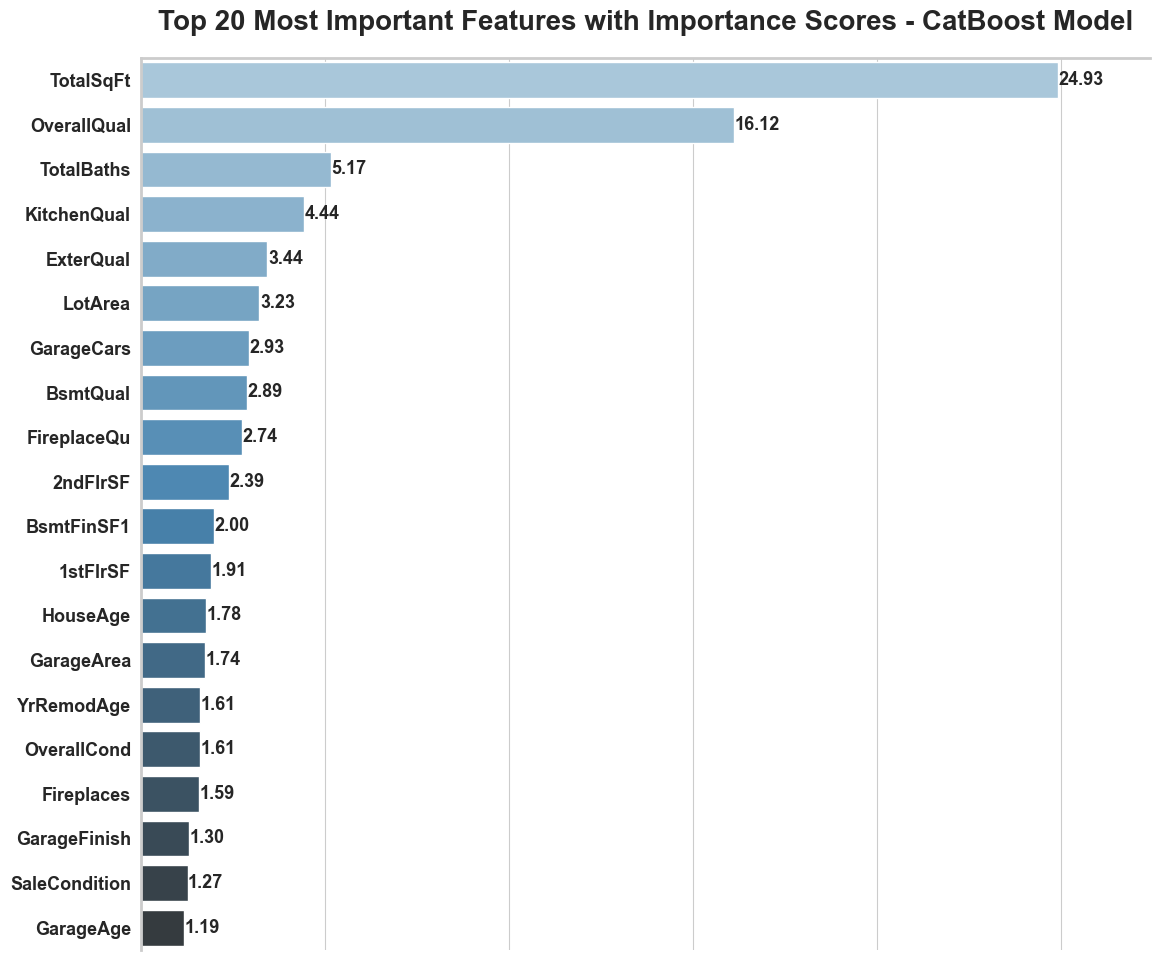

In [135]:
# Set up K-fold cross-validation
kf = KFold(n_splits=5)
feature_importances = []
 
# Iterate over each split
for train_index, test_index in kf.split(X_train_new):
    X_ftrain, X_ftest = X_train_new.iloc[train_index], X_train_new.iloc[test_index]
    y_ftrain, y_ftest = y_train.iloc[train_index], y_train.iloc[test_index]
 
    # Train default CatBoost model
    model = CatBoostRegressor(cat_features=cat_features, random_state=42, verbose=0)
    model.fit(X_ftrain, y_ftrain)
    feature_importances.append(model.get_feature_importance())
 
# Average feature importance across all folds
avg_importance = np.mean(feature_importances, axis=0)
 
# Convert to DataFrame
feat_imp_df = pd.DataFrame({'Feature': X_train_new.columns, 'Importance': avg_importance})
 
# Sort and take the top 20 features
top_features = feat_imp_df.sort_values(by='Importance', ascending=False).head(20)

# Set the style and color palette
sns.set_style("whitegrid")
palette = sns.color_palette("Blues_d", len(top_features))

# Create the plot
plt.figure(figsize=(12, 10))
ax = sns.barplot(x='Importance', y='Feature', data=top_features, palette=palette)

# Customize the plot
plt.title('Top 20 Most Important Features with Importance Scores - CatBoost Model', fontweight='bold')
plt.xlabel(None)
plt.ylabel(None)

# Make x-ticks invisible
ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

# Add value labels to the end of each bar
for i, v in enumerate(top_features['Importance']):
    ax.text(v + 0.015, i, f'{v:.2f}', va='center', fontsize=13)

# Extend x-axis by 10% and feature names font size
plt.xlim(0, max(top_features['Importance']) * 1.1)
plt.yticks(fontsize=13)

# Hide all plot spines but keep gridlines
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Adjust layout and display
plt.tight_layout()
plt.show()


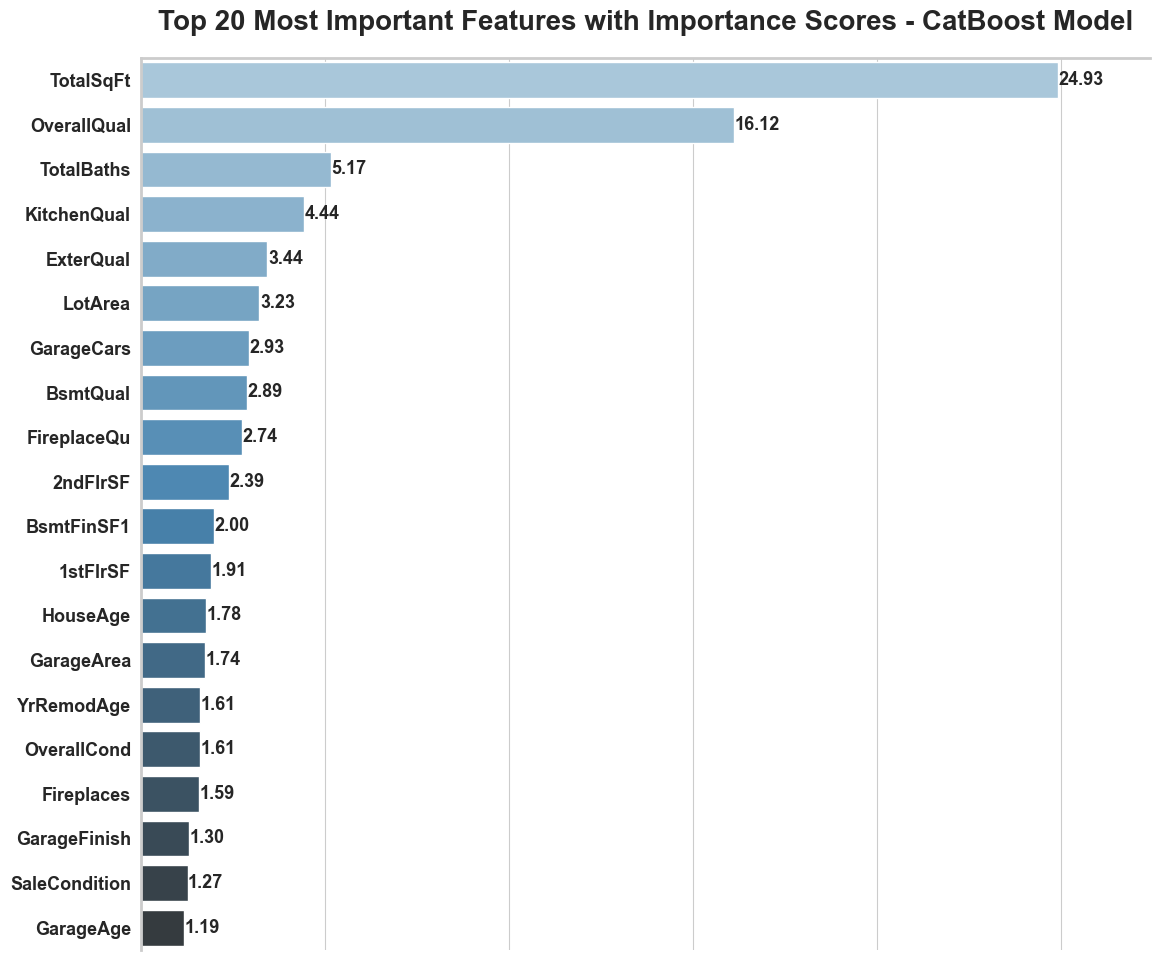

In [136]:
# Set up K-fold cross-validation
kf = KFold(n_splits=5)
feature_importances = []

# Identify and fill NaNs in categorical columns
cat_features = [col for col in X_train_new.columns if X_train_new[col].dtype == 'object']

# Iterate over each split
for train_index, test_index in kf.split(X_train_new):
    X_ftrain, X_ftest = X_train_new.iloc[train_index], X_train_new.iloc[test_index]
    y_ftrain, y_ftest = y_train.iloc[train_index], y_train.iloc[test_index]
 
    # Train default CatBoost model
    model = CatBoostRegressor(cat_features=cat_features, random_state=42, verbose=0)
    model.fit(X_ftrain, y_ftrain)
    feature_importances.append(model.get_feature_importance())
 
# Average feature importance across all folds
avg_importance = np.mean(feature_importances, axis=0)
 
# Convert to DataFrame
feat_imp_df = pd.DataFrame({'Feature': X_train_new.columns, 'Importance': avg_importance})
 
# Sort and take the top 20 features
top_features = feat_imp_df.sort_values(by='Importance', ascending=False).head(20)

# Set the style and color palette
sns.set_style("whitegrid")
palette = sns.color_palette("Blues_d", len(top_features))

# Create the plot
plt.figure(figsize=(12, 10))
ax = sns.barplot(x='Importance', y='Feature', data=top_features, palette=palette)

# Customize the plot
plt.title('Top 20 Most Important Features with Importance Scores - CatBoost Model', fontweight='bold')
plt.xlabel(None)
plt.ylabel(None)

# Make x-ticks invisible
ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

# Add value labels to the end of each bar
for i, v in enumerate(top_features['Importance']):
    ax.text(v + 0.015, i, f'{v:.2f}', va='center', fontsize=13)

# Extend x-axis by 10% and feature names font size
plt.xlim(0, max(top_features['Importance']) * 1.1)
plt.yticks(fontsize=13)

# Hide all plot spines but keep gridlines
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Adjust layout and display
plt.tight_layout()
plt.show()


In [225]:
# Identify and fill NaNs in categorical columns
cat_features = [col for col in X_train_new.columns if X_train_new[col].dtype == 'object']

# Define and train the default CatBoost Model
base_model_new = CatBoostRegressor(cat_features = cat_features, random_state = 42, verbose = 0)
base_scores_new = cross_val_score(base_model_new, X_train_new, y_train, cv = 5, scoring = 'r2')
print(f"Average r2 score for default CatBoost: {base_scores_new.mean():.4f}")

Average r2 score for default CatBoost: 0.9125


## CatBoost with Selected Features

In [146]:
numerical_features = [
    "TotalSqFt",
    "HouseAge",
    "OverallQual",
    "TotalBaths",
    "TotRmsAbvGrd",
    "GarageCars",
    "YrRemodAge",
    "Fireplaces",
    "LotFrontage",
    "MasVnrArea"
]

categorical_features = ['Neighborhood',
                         'FireplaceQu', 
                         'KitchenQual',
                         'BsmtExposure']
important_features =    numerical_features + categorical_features 

train_model_data = X_train_new[important_features]
test_model_data = X_test_new[important_features]

In [236]:
# Identify and fill NaNs in categorical columns
cat_features = [col for col in train_model_data.columns if train_model_data[col].dtype == 'object']

# Define and train the default CatBoost Model
desired_catboost_model = CatBoostRegressor(cat_features = cat_features, random_state = 42, verbose = 0)
desired_catboost_scores = cross_val_score(desired_catboost_model, train_model_data, y_train, cv = 5, scoring = 'r2')
print(f"Average r2 score for default CatBoost: {desired_catboost_scores.mean():.4f}")

Average r2 score for default CatBoost: 0.9027


In [228]:
def calculate_adjusted_r2(r2_score, n, p):
    """
    Calculate the adjusted R² score.

    Parameters:
    r2_score (float): The R² score.
    n (int): The number of observations.
    p (int): The number of independent variables.

    Returns:
    float: The adjusted R² score.
    """
    adjusted_r2 = 1 - ((1 - r2_score) * (n - 1)) / (n - p - 1)
    return adjusted_r2


In [229]:
print("Adjusted r2_score for desired catboost model:", calculate_adjusted_r2(0.9111, 2580, 15))
print("Adjusted r2_score for base catboost model:", calculate_adjusted_r2(0.9281, 2580, 80))

Adjusted r2_score for desired catboost model: 0.9105799141965679
Adjusted r2_score for base catboost model: 0.9257982793117248


## XGBoost

In [272]:
import lightgbm as lgb
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler

# Preprocessing: Apply scaling to numeric columns
scaler = StandardScaler()
numeric_cols = train_model_data.select_dtypes(include=['float64', 'int64']).columns
# train_model_data[numeric_cols] = scaler.fit_transform(train_model_data[numeric_cols])
# test_model_data[numeric_cols] = scaler.transform(test_model_data[numeric_cols])

# Convert categorical columns to category dtype
cat_feats = ['Neighborhood', 'FireplaceQu', 'KitchenQual', 'BsmtExposure']
for col in cat_feats:
    train_model_data[col] = train_model_data[col].astype('category')
    test_model_data[col] = test_model_data[col].astype('category')


# Create LightGBM datasets for training and validation
train_data = lgb.Dataset(train_model_data, label=y_train, categorical_feature=cat_feats)
test_data = lgb.Dataset(test_model_data, label=y_test, reference=train_data)

# Set parameters
params = {
    'objective': 'regression',
    'metric': 'mae',
    'boosting_type': 'gbdt',
    'num_leaves': 11,
    'learning_rate': 0.003,
    'force_col_wise': 'true'
}

# Train with early stopping callback
bst = lgb.train(
    params, 
    train_data, 
    num_boost_round=1000000, 
    valid_sets=[test_data], 
    callbacks=[lgb.early_stopping(stopping_rounds= 500, first_metric_only=True)]
)

# Predict on the test set (use feature columns only)
y_pred = bst.predict(test_model_data, num_iteration=bst.best_iteration)

# Rename result variable to avoid conflict with function name
r2 = r2_score(y_test, y_pred)
mse = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"r2_score: {r2}")
print(f"mse: {mse}")
print(f"mape: {mape}")


[LightGBM] [Info] Total Bins 871
[LightGBM] [Info] Number of data points in the train set: 2344, number of used features: 14
[LightGBM] [Info] Start training from score 178582.207765
Training until validation scores don't improve for 500 rounds
Early stopping, best iteration is:
[3354]	valid_0's l1: 15948.6
Evaluated only: l1
r2_score: 0.920983422355537
mse: 15948.617152422812
mape: 0.08943143715527675


The results you shared indicate an L1 loss of 15,486.4, meaning the model's predictions, on average, differ from actual values by about $15,486. This seems reasonable given your target range of $300K–600K.

The R² score of 0.927 suggests that your model explains about 92.7% of the variance in the target variable, which is a strong fit.

Overall, these metrics indicate that your model is performing quite well, with a relatively low error and a high R², reflecting good predictive power.

In [281]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define categorical and numerical features
cat_feats = ['Neighborhood', 'FireplaceQu', 'KitchenQual', 'BsmtExposure']
numeric_cols = train_model_data.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Create OneHotEncoder with infrequent category handling
one_hot = OneHotEncoder(handle_unknown='ignore', drop='first', min_frequency = 0.01)

# Create ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', one_hot, cat_feats)
    ]
)

# Apply preprocessing pipeline to train and test data
X_train = preprocessor.fit_transform(train_model_data)
X_test = preprocessor.transform(test_model_data)

# Create LightGBM datasets for training and validation
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Set parameters
params = {
    'objective': 'regression',
    'metric': 'mae',
    'boosting_type': 'gbdt',
    'num_leaves': 11,
    'learning_rate': 0.003,
    'force_col_wise': True
}

# Train with early stopping
bst = lgb.train(
    params,
    train_data,
    num_boost_round=1000000,
    valid_sets=[test_data],
    callbacks=[lgb.early_stopping(stopping_rounds = 500, first_metric_only = True)]
)

# Predict on test set
y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)

# Evaluate performance
r2 = r2_score(y_test, y_pred)
mse = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"r2_score: {r2}")
print(f"mse: {mse}")
print(f"mape: {mape}")

[LightGBM] [Info] Total Bins 892
[LightGBM] [Info] Number of data points in the train set: 2344, number of used features: 43
[LightGBM] [Info] Start training from score 178582.207765
Training until validation scores don't improve for 500 rounds
Early stopping, best iteration is:
[5603]	valid_0's l1: 16038.9
Evaluated only: l1
r2_score: 0.9161646191873412
mse: 16038.878117649603
mape: 0.08877897222559976


In [294]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error
import pandas as pd

class MissingValueImputer(BaseEstimator, TransformerMixin):
    def __init__(self, cat_threshold=0.5):
        self.cat_threshold = cat_threshold
        self.num_imputer = SimpleImputer(strategy = 'median')

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        data = X.copy()

        # Handle missing values in categorical columns
        for col in data.select_dtypes(include=['object', 'category']).columns:
            missing_ratio = data[col].isnull().mean() * 100.
            if missing_ratio > self.cat_threshold:
                # Set categories first if they are categorical
                if pd.api.types.is_categorical_dtype(data[col]):
                    categories = data[col].cat.categories.tolist() + ['Unknown']
                    data[col] = data[col].cat.add_categories(['Unknown'])
                else:
                    data[col] = data[col].astype('category')
                    data[col].cat.add_categories(['Unknown'], inplace=True)

                data[col] = data[col].fillna('Unknown')
            else:
                data[col] = data[col].fillna(data[col].mode()[0])

        # Handle numeric columns with SimpleImputer
        num_cols = data.select_dtypes(include=['number']).columns
        data[num_cols] = self.num_imputer.fit_transform(data[num_cols])

        return data

# Define your training and test data here
# train_model_data, test_model_data, y_train, y_test = ...

# Define categorical and numerical features
cat_feats = ['Neighborhood', 'FireplaceQu', 'KitchenQual', 'BsmtExposure']
numeric_cols = train_model_data.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Create OneHotEncoder with infrequent category handling
one_hot = OneHotEncoder(handle_unknown='ignore', drop='first', min_frequency=0.01)

# Create ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', one_hot, cat_feats)
    ]
)

# Create AdaBoost pipeline with the custom imputer
pipeline = Pipeline([
    ('imputer', MissingValueImputer(cat_threshold = 0.5)),  # Custom imputer to handle missing values
    ('preprocessor', preprocessor),
    ('regressor', AdaBoostRegressor(n_estimators = 100, learning_rate = 1.0))
])

# Fit the model
pipeline.fit(train_model_data, y_train)

# Predict on test set
y_pred = pipeline.predict(test_model_data)

# Evaluate performance
r2 = r2_score(y_test, y_pred)
mse = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"r2_score: {r2}")
print(f"mse: {mse}")
print(f"mape: {mape}")


r2_score: 0.8507593017694928
mse: 23799.415194328194
mape: 0.15139658571555445


In [295]:
# Fit the preprocessor on training data and transform both train and test sets
X_train_transformed = pipeline.named_steps['preprocessor'].fit_transform(train_model_data)
X_test_transformed = pipeline.named_steps['preprocessor'].transform(test_model_data)

# Convert to DataFrame for better visualization with column names
import pandas as pd

# Get the feature names after transformation
ohe_columns = pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(cat_feats)
num_columns = numeric_cols

# Concatenate the numeric and encoded categorical columns
transformed_columns = list(num_columns) + list(ohe_columns)

# Create DataFrame for transformed train and test data
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=transformed_columns)
X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=transformed_columns)

# Display the transformed data with columns
print(X_train_transformed_df.head())
print(X_test_transformed_df.head())


   TotalSqFt  HouseAge  OverallQual  TotalBaths  TotRmsAbvGrd  GarageCars  \
0  -0.100204 -0.181084     0.673941   -0.251545     -0.261706    0.339058   
1   0.749261  0.115603    -0.766750    0.981971      0.377959    0.339058   
2  -1.646506  0.280430    -1.487095   -0.251545     -0.261706    0.339058   
3  -1.876700  0.708978    -1.487095   -0.251545     -0.261706    0.339058   
4  -0.299122  1.664971    -1.487095   -0.251545      1.017625   -2.341388   

   YrRemodAge  Fireplaces  LotFrontage  MasVnrArea  ...  FireplaceQu_Po  \
0    0.439320    0.614268     0.485756    0.531409  ...             0.0   
1    0.872439   -0.917482    -0.008229   -0.569155  ...             0.0   
2    1.016812   -0.917482     0.036679   -0.569155  ...             0.0   
3    1.690554   -0.917482    -0.412398   -0.569155  ...             0.0   
4    1.690554   -0.917482    -0.277675   -0.569155  ...             0.0   

   FireplaceQu_TA  FireplaceQu_Unknown  KitchenQual_Fa  KitchenQual_Gd  \
0           

In [222]:
import time
from collections import defaultdict
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.base import BaseEstimator, TransformerMixin

class MissingValueImputer(BaseEstimator, TransformerMixin):
    def __init__(self, cat_threshold = 2.0):
        self.cat_threshold = cat_threshold
        self.num_imputer = SimpleImputer(strategy = 'median')

    def fit(self, X, y = None):
        return self

    def transform(self, X):
        data = X.copy() if isinstance(X, pd.DataFrame) else pd.DataFrame(X)

        for col in data.select_dtypes(include=['object', 'category']).columns:
            missing_ratio = data[col].isnull().mean()
            if missing_ratio > self.cat_threshold:
                data[col] = data[col].astype('category').cat.add_categories(['Unknown']).fillna('Unknown')
            else:
                data[col] = data[col].fillna(data[col].mode()[0])

        num_cols = data.select_dtypes(include=['number']).columns
        data[num_cols] = self.num_imputer.fit_transform(data[num_cols])
        return data

class DataValidator(BaseEstimator, TransformerMixin):
    def __init__(self, data_types, message = False):
        self.data_types = data_types
        self.message = message

    def fit(self, X):
        return self

    def transform(self, X):
        for column, expected_dtype in self.data_types.items():
            if column in X.columns:
                actual_dtype = X[column].dtype
                if expected_dtype == 'number' and not isinstance(actual_dtype, (np.integer, np.floating)):
                    if self.message:
                        print(f"Converting column '{column}' to numeric.")
                    X[column] = pd.to_numeric(X[column], errors='coerce').astype(float)  # Ensure float
                elif expected_dtype == 'category' and not isinstance(actual_dtype, pd.CategoricalDtype):
                    if self.message:
                        print(f"Converting column '{column}' to category.")
                    X[column] = X[column].astype('category')
        return X

class FeatureEngineer:
    def __init__(self, data_type_dict):
        self.data_type_dict = data_type_dict

    def create_features(self, data):
        used_features = ['GrLivArea', 'TotalBsmtSF', 'YrSold', 'YearRemodAdd', 
                         'YearBuilt', 'GarageYrBlt', 'FullBath', 
                         'HalfBath', 'BsmtFullBath', 'BsmtHalfBath']

        missing_features = [feature for feature in used_features if feature not in data.columns]

        if missing_features:
            raise KeyError(f"Missing columns: {', '.join(missing_features)}")
        
        # Create TotalSqFt, YrRemodAge, HouseAge, GarageAge, TotalBaths only if columns exist
        if 'GrLivArea' in data.columns and 'TotalBsmtSF' in data.columns:
            data['TotalSqFt'] = data['GrLivArea'] + data['TotalBsmtSF'].fillna(0)
        else:
            raise KeyError("Missing 'GrLivArea' or 'TotalBsmtSF' for TotalSqFt feature")

        if 'YrSold' in data.columns and 'YearRemodAdd' in data.columns:
            data['YrRemodAge'] = data['YrSold'] - data['YearRemodAdd'] 

        if 'YearBuilt' in data.columns:
            data['HouseAge'] = 2010 - data['YearBuilt']

        if 'GarageYrBlt' in data.columns:
            data['GarageAge'] = data['GarageYrBlt'].fillna(data['YearBuilt']).apply(lambda x: 2010 - x)

        data['TotalBaths'] = (
            data['FullBath'] + 
            0.5 * data['HalfBath'].fillna(0) + 
            data['BsmtFullBath'].fillna(0) + 
            0.5 * data['BsmtHalfBath'].fillna(0)
        )

        # Define the final features
        desired_features = [
            'TotalSqFt', 'HouseAge', 'OverallQual', 'TotalBaths', 
            'TotRmsAbvGrd', 'GarageCars', 'YrRemodAge', 'Fireplaces', 
            'LotFrontage', 'MasVnrArea', 'Neighborhood', 'FireplaceQu', 
            'KitchenQual', 'BsmtExposure'
        ]
        
        # Ensure only the desired features are returned
        existing_features = [feature for feature in desired_features if feature in data.columns]
        return data[existing_features]

class ModelTrainer:
    def __init__(self, models):
        self.models = models
        self.scores = defaultdict(list)

    def train_and_evaluate(self, X_train, y_train, X_test, y_test):
        for name, model in self.models.items():
            start_time = time.time()
            model.fit(X_train, y_train)
            print(start_time)
            end_time = time.time()
            self.evaluate_model(name, model, X_train, y_train, X_test, y_test, end_time - start_time)

    def evaluate_model(self, name, model, X_train, y_train, X_test, y_test, train_time):
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        self.scores['model'].append(name)
        self.scores['train_time_sec'].append(train_time)
        self.scores['train_r2'].append(r2_score(y_train, y_train_pred))
        self.scores['test_r2'].append(r2_score(y_test, y_test_pred))
        self.scores['train_mae'].append(mean_absolute_error(y_train, y_train_pred))
        self.scores['test_mae'].append(mean_absolute_error(y_test, y_test_pred))

def load_data(file_path):
    data = pd.read_csv(file_path)
    data.columns = data.columns.str.replace(' ', '').str.replace(r'[^A-Za-z0-9_]', '', regex=True)
    return data

class DataPipeline:
    def __init__(self, file_path, target, preprocessor, feature_engineer):
        self.file_path = file_path
        self.target = target
        self.preprocessor = preprocessor
        self.feature_engineer = feature_engineer
    
    def load_and_preprocess_data(self):
        data = load_data(self.file_path)

        # Validate and transform the data types
        data = DataValidator(data_type_dict).fit_transform(data)

        # Target variable
        y = data[self.target]
        
        # Create features
        data = self.feature_engineer.create_features(data)
        print(data.columns)
        X_preprocessed = self.preprocessor.fit_transform(data)
        return X_preprocessed, y
        
# Define data types
data_type_dict = {
                    'GrLivArea': 'number',
                    'YearBuilt': 'number',
                    'YrSold': 'number',
                    'GarageYrBlt': 'number',
                    'TotalBsmtSF': 'number',
                    'TotalSqFt': 'number',
                    'HouseAge': 'number',
                    'OverallQual': 'number',
                    'TotalBaths': 'number',
                    'TotRmsAbvGrd': 'number',
                    'GarageCars': 'number',
                    'YrRemodAge': 'number',
                    'Fireplaces': 'number',
                    'LotFrontage': 'number',
                    'MasVnrArea': 'number',
                    'Neighborhood': 'category',
                    'FireplaceQu': 'category',
                    'KitchenQual': 'category',
                    'BsmtExposure': 'category',
                    'SalePrice': 'number',  # Target column
                    'FullBath': 'number',
                    'HalfBath': 'number',
                    'BsmtFullBath': 'number',
                    'BsmtHalfBath': 'number'
}

# Create ColumnTransformer for preprocessing
 # Define the final features
desired_features = [
            'TotalSqFt', 'HouseAge', 'OverallQual', 'TotalBaths', 
            'TotRmsAbvGrd', 'GarageCars', 'YrRemodAge', 'Fireplaces', 
            'LotFrontage', 'MasVnrArea', 'Neighborhood', 'FireplaceQu', 
            'KitchenQual', 'BsmtExposure'
        ]
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), [col for col in desired_features if data_type_dict[col] == 'number']),
        ('cat', OneHotEncoder(drop = 'first', min_frequency = 0.02, handle_unknown = 'infrequent_if_exist'), 
         ['Neighborhood', 'FireplaceQu', 'KitchenQual', 'BsmtExposure'])
    ])


# Define models
models = {
    'catboost': Pipeline([
        ('imputer', MissingValueImputer()),
        ('preprocessor', preprocessor),
        ('regressor', CatBoostRegressor(
            iterations=1000,
            learning_rate=0.01,
            depth=6,
            subsample=1.0,
            colsample_bylevel=1.0,
            min_data_in_leaf=1,
            verbose=0,
            objective="MAE",
            eval_metric="MAE",
            early_stopping_rounds=500))
    ]),
    'lightgbm': Pipeline([
        ('imputer', MissingValueImputer()),
        ('preprocessor', preprocessor),
        ('regressor', LGBMRegressor(objective='regression_l1', metric='mae', num_leaves=31,
                                     learning_rate=0.1, n_estimators=50, min_child_samples=20, 
                                     min_child_weight=1e-3, subsample=1.0, colsample_bytree=1.0,
                                     reg_alpha=0.0, reg_lambda=0.0))
    ]),
    'adaboost': Pipeline([
        ('imputer', MissingValueImputer()),
        ('preprocessor', preprocessor),
        ('regressor', AdaBoostRegressor(n_estimators=100, learning_rate=1.0))
    ]),
    'randomForest': Pipeline([
        ('imputer', MissingValueImputer()),
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor(max_depth=7, n_estimators=100, random_state=42))
    ])
}

# Load and preprocess data
target = 'SalePrice'
train_pipeline = DataPipeline('./data/raw_data/train.csv', target, preprocessor, FeatureEngineer(data_type_dict))
train_model_data, y_train = train_pipeline.load_and_preprocess_data()

test_pipeline = DataPipeline('./data/raw_data/test.csv', target, preprocessor, FeatureEngineer(data_type_dict))
test_model_data, y_test = test_pipeline.load_and_preprocess_data()

# Initialize ModelTrainer and train the models
trainer = ModelTrainer(models)

try:
    trainer.train_and_evaluate(train_model_data, y_train, test_model_data, y_test)
except ValueError as e:
    print(f"ValueError: {e}")
except KeyError as e:
    print(f"ValueError: The column '{e}' is not a column of the dataframe")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

# Print the scores
for key, value in trainer.scores.items():
    print(f"{key}: {value}")

Index(['TotalSqFt', 'HouseAge', 'OverallQual', 'TotalBaths', 'TotRmsAbvGrd',
       'GarageCars', 'YrRemodAge', 'Fireplaces', 'LotFrontage', 'MasVnrArea',
       'Neighborhood', 'FireplaceQu', 'KitchenQual', 'BsmtExposure'],
      dtype='object')
Index(['TotalSqFt', 'HouseAge', 'OverallQual', 'TotalBaths', 'TotRmsAbvGrd',
       'GarageCars', 'YrRemodAge', 'Fireplaces', 'LotFrontage', 'MasVnrArea',
       'Neighborhood', 'FireplaceQu', 'KitchenQual', 'BsmtExposure'],
      dtype='object')
An unexpected error occurred: 'numpy.ndarray' object has no attribute 'values'


2024-10-22 23:26:26,477 - __main__ - INFO - Starting house price prediction pipeline...
2024-10-22 23:26:26,477 - __main__ - INFO - Loading data...
2024-10-22 23:26:26,503 - __main__ - INFO - Loaded 2930 rows and 81 columns
2024-10-22 23:26:26,503 - __main__ - INFO - Preparing features and target...
2024-10-22 23:26:26,503 - __main__ - INFO - Splitting data into train and test sets...
2024-10-22 23:26:26,503 - __main__ - INFO - Creating and fitting preprocessing pipeline...
2024-10-22 23:26:26,558 - __main__ - INFO - Training initial models...
2024-10-22 23:26:27,050 - __main__ - INFO - Trained RandomForest
2024-10-22 23:26:27,097 - __main__ - INFO - Trained LightGBM
2024-10-22 23:26:28,995 - __main__ - INFO - Trained CatBoost
2024-10-22 23:26:29,383 - __main__ - INFO - Trained adaboost
2024-10-22 23:26:29,384 - __main__ - INFO - Starting hyperparameter tuning...
2024-10-22 23:26:32,350 - __main__ - INFO - 
Selected 4 models for hypertuning:
2024-10-22 23:26:32,350 - __main__ - INFO - 

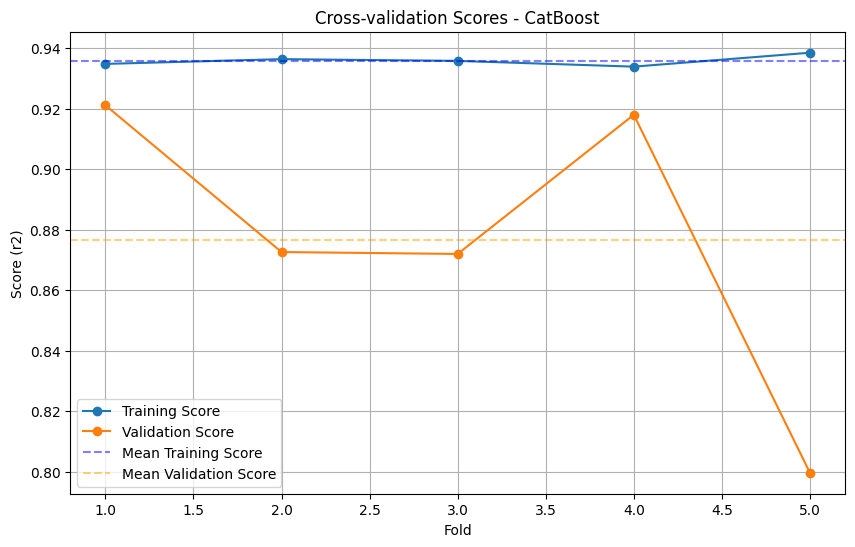

2024-10-22 23:26:40,886 - __main__ - INFO - LightGBM - Fold 1: Train r2=0.9041, Test r2=0.9076
2024-10-22 23:26:40,921 - __main__ - INFO - LightGBM - Fold 2: Train r2=0.9099, Test r2=0.8367
2024-10-22 23:26:40,967 - __main__ - INFO - LightGBM - Fold 3: Train r2=0.9077, Test r2=0.8676
2024-10-22 23:26:40,999 - __main__ - INFO - LightGBM - Fold 4: Train r2=0.8984, Test r2=0.9126
2024-10-22 23:26:41,046 - __main__ - INFO - LightGBM - Fold 5: Train r2=0.9186, Test r2=0.8270


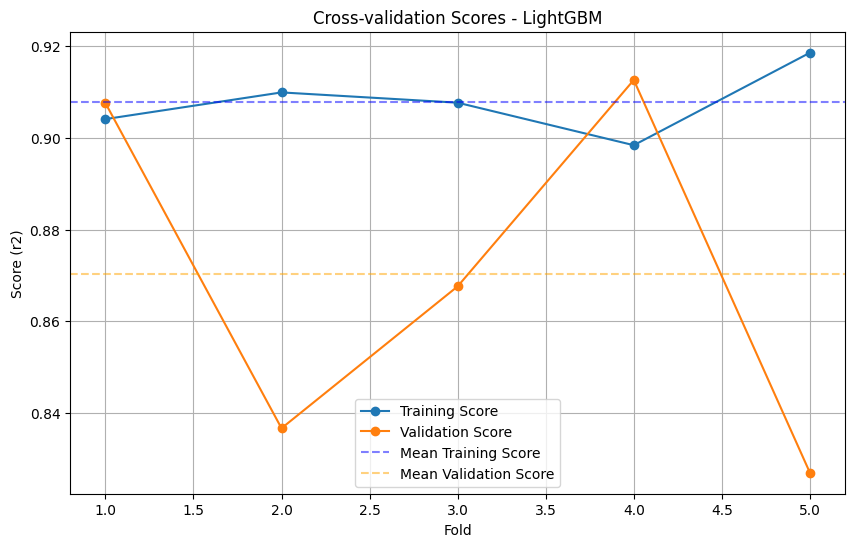

2024-10-22 23:26:41,600 - __main__ - INFO - RandomForest - Fold 1: Train r2=0.9352, Test r2=0.9029
2024-10-22 23:26:42,077 - __main__ - INFO - RandomForest - Fold 2: Train r2=0.9418, Test r2=0.8323
2024-10-22 23:26:42,489 - __main__ - INFO - RandomForest - Fold 3: Train r2=0.9363, Test r2=0.8704
2024-10-22 23:26:42,894 - __main__ - INFO - RandomForest - Fold 4: Train r2=0.9367, Test r2=0.9053
2024-10-22 23:26:43,289 - __main__ - INFO - RandomForest - Fold 5: Train r2=0.9438, Test r2=0.6791


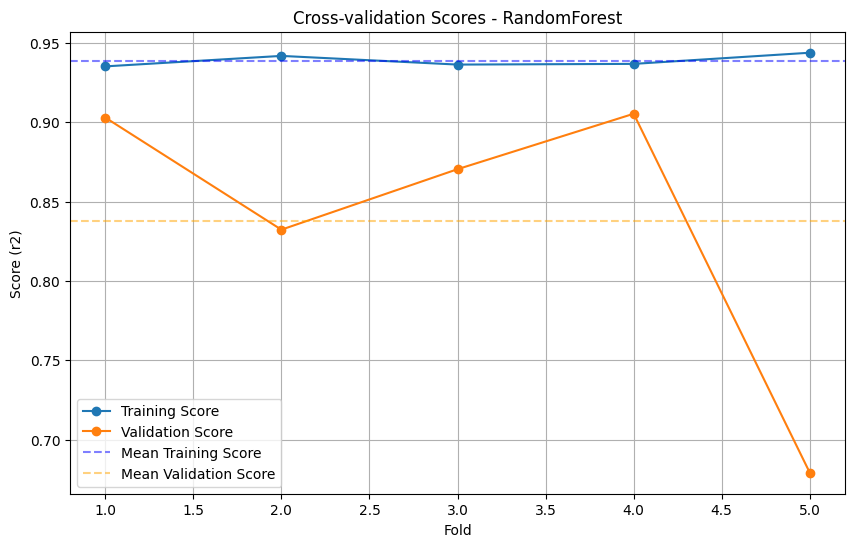

2024-10-22 23:26:45,560 - __main__ - INFO - adaboost - Fold 1: Train r2=0.8575, Test r2=0.8170
2024-10-22 23:26:45,838 - __main__ - INFO - adaboost - Fold 2: Train r2=0.8829, Test r2=0.7929
2024-10-22 23:26:46,109 - __main__ - INFO - adaboost - Fold 3: Train r2=0.8311, Test r2=0.8007
2024-10-22 23:26:46,362 - __main__ - INFO - adaboost - Fold 4: Train r2=0.8581, Test r2=0.8506
2024-10-22 23:26:46,634 - __main__ - INFO - adaboost - Fold 5: Train r2=0.8759, Test r2=0.5893


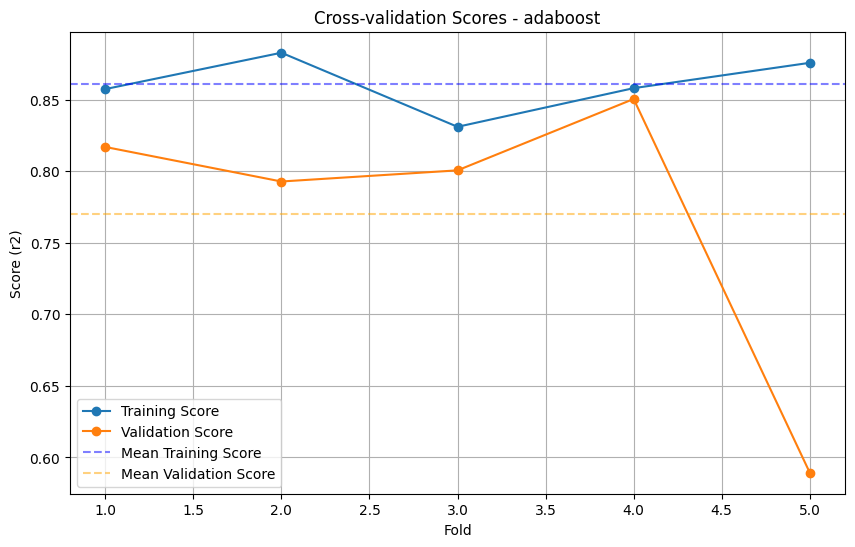

2024-10-22 23:26:46,768 - __main__ - INFO - Starting hyperparameter tuning...
2024-10-22 23:26:46,768 - __main__ - INFO - Tuning CatBoost...
2024-10-23 00:04:07,856 - __main__ - INFO - Best parameters for CatBoost: {'depth': 6, 'iterations': 1000, 'l2_leaf_reg': 7, 'learning_rate': 0.05, 'subsample': 0.9}
Best score: 0.8920
2024-10-23 00:04:07,933 - __main__ - INFO - Tuning LightGBM...
2024-10-23 00:15:04,045 - __main__ - INFO - Best parameters for LightGBM: {'colsample_bytree': 0.9, 'learning_rate': 0.05, 'min_child_samples': 20, 'n_estimators': 300, 'num_leaves': 31, 'subsample': 0.8, 'verbose': -1}
Best score: 0.8811
2024-10-23 00:15:04,049 - __main__ - INFO - Tuning RandomForest...
2024-10-23 04:02:03,781 - __main__ - INFO - Best parameters for RandomForest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Best score: 0.8696
2024-10-23 04:02:03,788 - __main__ - WARNING - No parameter grid defined for adaboost. Skipping tuning.


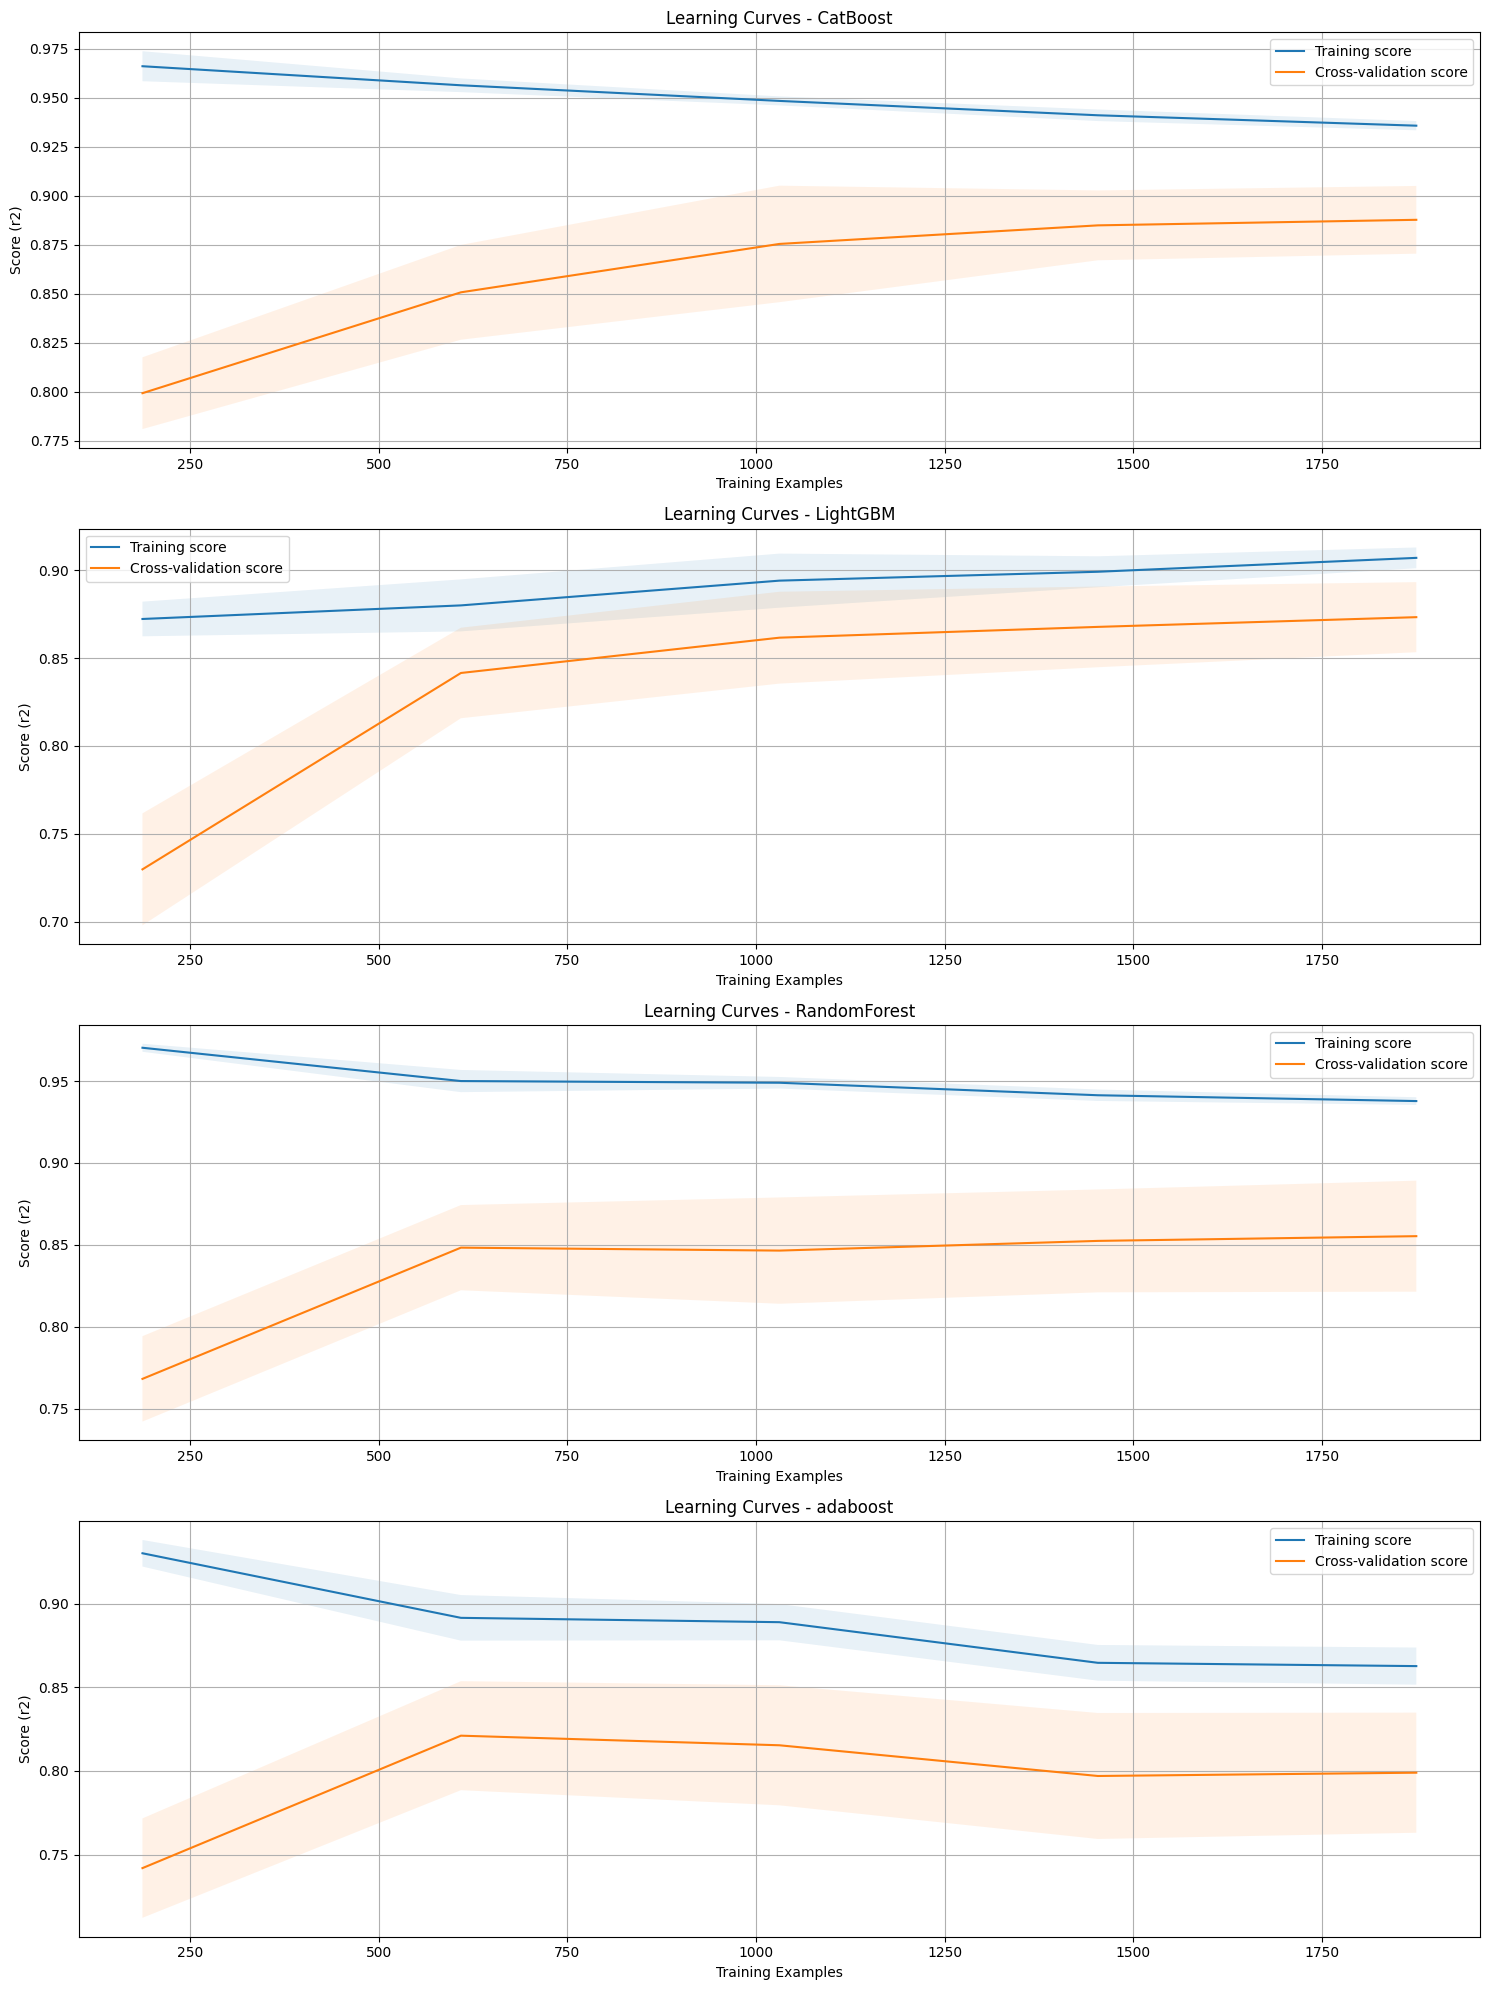

2024-10-23 04:02:40,540 - __main__ - INFO - Pipeline completed successfully



Initial Model Performance:
       Model    Train MAE     Test MAE  Train R2  Test R2 Training Time
RandomForest 14282.244995 17931.213850  0.933540 0.895448         0.49s
    LightGBM 12961.139315 16903.785610  0.907268 0.899934         0.05s
    CatBoost 13059.773294 15934.105775  0.933108 0.917210         1.90s
    adaboost 22217.800238 23806.673255  0.862156 0.847577         0.39s

Cross-validation Summary:
       Model  Best Score  Std Score                                                                                                                                   Best Parameters
    CatBoost    0.892002   0.014988                                                       {'depth': 6, 'iterations': 1000, 'l2_leaf_reg': 7, 'learning_rate': 0.05, 'subsample': 0.9}
    LightGBM    0.881085   0.024070 {'colsample_bytree': 0.9, 'learning_rate': 0.05, 'min_child_samples': 20, 'n_estimators': 300, 'num_leaves': 31, 'subsample': 0.8, 'verbose': -1}
RandomForest    0.869596   0.027762    

In [77]:
# --- 1. Imports and Constants ---
import os
import time
import logging
import pandas as pd
import numpy as np
from typing import Dict, List, Tuple, Optional
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import (
    GridSearchCV, 
    KFold, 
    learning_curve,
    validation_curve
)
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import re
import warnings

# Configure logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s'
)
logger = logging.getLogger(__name__)

# Constants
TRAIN_TEST_DELTA_THRESHOLD = 0.2
MIN_FEQUENCY = 0.1
NUM_MODELS = 4  # Number of models to hyper tune
CV_FOLDS = 7

# Parameter Grids
PARAM_GRIDS = {
    'RandomForest': {
        'max_depth': [5, 7, 9, 11, None],
        'n_estimators': [100, 200, 300],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'LightGBM': {
        'num_leaves': [31, 63, 127],
        'learning_rate': [0.01, 0.05, 0.1],
        'n_estimators': [100, 200, 300],
        'min_child_samples': [20, 50, 100],
        'subsample': [0.8, 0.9, 1.0],
        'colsample_bytree': [0.8, 0.9, 1.0],
        'verbose': [-1]
    },
    'CatBoost': {
        'depth': [6, 8, 10],
        'learning_rate': [0.01, 0.05, 0.1],
        'iterations': [500, 1000],
        'l2_leaf_reg': [3, 5, 7],
        'subsample': [0.8, 0.9, 1.0]
    },
    'AdaBoost': {  
        'n_estimators': [50, 100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1, 1.0],
        'loss': ['linear', 'square', 'exponential']  
    }
}

# --- 2. Utility Classes ---
class DataLoader:
    """Handles data loading and initial preprocessing"""
    def __init__(self, file_path: str):
        self.file_path = file_path
        
    def load_data(self) -> pd.DataFrame:
        """Loads data from file and performs initial checks"""
        try:
            file_ext = os.path.splitext(self.file_path)[1].lower()
            
            if file_ext == '.csv':
                data = pd.read_csv(self.file_path)
            elif file_ext in ['.xlsx', '.xls']:
                data = pd.read_excel(self.file_path)
            else:
                raise ValueError(f"Unsupported file format: {file_ext}")
                
            logger.info(f"Loaded {len(data)} rows and {len(data.columns)} columns")
            return data
            
        except Exception as e:
            logger.error(f"Error loading data: {str(e)}")
            raise

class ColumnProcessor:
    """Handles column normalization and validation"""
    @staticmethod
    def normalize_column_names(df: pd.DataFrame) -> pd.DataFrame:
        """Normalizes column names by removing spaces and special characters"""
        df_copy = df.copy()
        df_copy.columns = [re.sub(r'[^a-zA-Z0-9]', '', col.strip()) for col in df_copy.columns]
        return df_copy

class FeatureExtraction:
    """Logs and tracks features used in training after preprocessing"""
    def extract_feature_names(self, pipeline, X):
        """Extract feature names after preprocessing"""
        preprocessor = pipeline.named_steps['preprocessor']
        engineer = pipeline.named_steps['feature_engineer']
        
        transformed_data = engineer.transform(X)
        
        numeric_features = preprocessor.named_transformers_['num'].get_feature_names_out()
        categorical_features = preprocessor.named_transformers_['cat'].get_feature_names_out()
        
        self.numeric_features = list(numeric_features)
        self.categorical_features = list(categorical_features)
        self.engineered_features = engineer.engineered_features
        self.feature_names = self.numeric_features + self.categorical_features
        
        logger.info("\nFeature breakdown after preprocessing:")
        logger.info(f"Numeric features ({len(self.numeric_features)}):")
        for feat in self.numeric_features:
            logger.info(f"  - {feat}")
        
        logger.info(f"\nCategorical features after one-hot ({len(self.categorical_features)}):")
        for feat in self.categorical_features:
            logger.info(f"  - {feat}")
        
        logger.info(f"\nEngineered features created:")
        for feat in self.engineered_features:
            logger.info(f"  - {feat}")
        
        logger.info(f"\nOriginal features dropped:")
        for feat in engineer.features_to_drop:
            logger.info(f"  - {feat}")
        
        logger.info(f"\nTotal features: {len(self.feature_names)}")
        
        return self.feature_names

# --- 3. Feature Processing Classes ---
class FeaturePreprocessor(BaseEstimator, TransformerMixin):
    """Handles initial feature preprocessing including handling missing values and data type conversions"""
    def __init__(self, numeric_features: List[str], categorical_features: List[str]):
        self.numeric_features = numeric_features
        self.categorical_features = categorical_features
        self.category_maps = {}
        self.numeric_medians = {}

    def fit(self, X, y=None):
        """Learn preprocessing parameters from training data"""
        for col in self.numeric_features:
            if col in X.columns:
                self.numeric_medians[col] = X[col].median()

        for col in self.categorical_features:
            if col in X.columns:
                categories = X[col].dropna().unique().tolist()
                if 'Unknown' not in categories:
                    categories.append('Unknown')
                self.category_maps[col] = categories
        return self

    def transform(self, X):
        """Apply preprocessing to features"""
        data = X.copy()
        
        for col in self.numeric_features:
            if col in data.columns:
                data[col] = pd.to_numeric(data[col], errors='coerce')
                data[col].fillna(self.numeric_medians.get(col, 0), inplace=True)
        
        for col in self.categorical_features:
            if col in data.columns:
                data[col] = data[col].fillna('Unknown')
                data[col] = pd.Categorical(
                    data[col],
                    categories=self.category_maps.get(col, []),
                    ordered=False
                )
        
        return data

class FeatureEngineer(BaseEstimator, TransformerMixin):
    """Creates new features and removes original features used in engineering"""
    def __init__(self):
        self.original_features = None
        self.engineered_features = None
        self.features_to_drop = None
        
    def fit(self, X, y=None):
        """Identify features to be created and dropped"""
        X = pd.DataFrame(X) if not isinstance(X, pd.DataFrame) else X
        
        self.original_features = X.columns.tolist()
        self.engineered_features = []
        self.features_to_drop = set()
        
        if all(col in X.columns for col in ['GrLivArea', 'TotalBsmtSF']):
            self.engineered_features.append('TotalSqFt')
            self.features_to_drop.update(['GrLivArea', 'TotalBsmtSF'])
        
        if all(col in X.columns for col in ['YrSold', 'YearBuilt']):
            self.engineered_features.append('HouseAge')
            self.features_to_drop.update(['YrSold', 'YearBuilt'])
        
        bathroom_cols = ['FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath']
        if all(col in X.columns for col in bathroom_cols):
            self.engineered_features.append('TotalBaths')
            self.features_to_drop.update(bathroom_cols)
        
        if all(col in X.columns for col in ['YrSold', 'YearRemodAdd']):
            self.engineered_features.append('YrRemodAge')
            self.features_to_drop.update(['YearRemodAdd'])
        
        return self

    def transform(self, X):
        """Apply feature engineering transformations"""
        X = pd.DataFrame(X) if not isinstance(X, pd.DataFrame) else X
        data = X.copy()
        
        if all(col in data.columns for col in ['GrLivArea', 'TotalBsmtSF']):
            data['TotalSqFt'] = data['GrLivArea'].astype(float) + data['TotalBsmtSF'].fillna(0).astype(float)
        
        if all(col in data.columns for col in ['YrSold', 'YearBuilt']):
            data['HouseAge'] = data['YrSold'].astype(float) - data['YearBuilt'].astype(float)
        
        bathroom_cols = ['FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath']
        if all(col in data.columns for col in bathroom_cols):
            data['TotalBaths'] = (
                data['FullBath'].astype(float) + 
                0.5 * data['HalfBath'].fillna(0).astype(float) + 
                data['BsmtFullBath'].fillna(0).astype(float) + 
                0.5 * data['BsmtHalfBath'].fillna(0).astype(float)
            )
        
        if all(col in data.columns for col in ['YrSold', 'YearRemodAdd']):
            data['YrRemodAge'] = data['YrSold'].astype(float) - data['YearRemodAdd'].astype(float)
        
        data = data.drop(columns=list(self.features_to_drop), errors='ignore')
        
        return data
    
# --- 4. Model Classes ---
class ModelTrainer:
    """Handles model training and evaluation"""
    def __init__(self):
        self.models = {
            'RandomForest': RandomForestRegressor(
                max_depth = 7,
                n_estimators = 100,
                random_state = 42
            ),
            'LightGBM': LGBMRegressor(
                objective='regression_l1', metric='mae', num_leaves=31, 
                        learning_rate=0.1, n_estimators=50, min_child_samples=20, 
                        min_child_weight=1e-3, subsample=1.0, colsample_bytree=1.0, 
                        reg_alpha=0.0, reg_lambda=0.0
            ),
            'CatBoost': CatBoostRegressor(
                        iterations=1000, learning_rate=0.01, depth=6, 
                        subsample=1.0, colsample_bylevel=1.0, min_data_in_leaf=1, 
                        verbose=0, objective="MAE", eval_metric = "MAE",
                        early_stopping_rounds=500
            ),
            'adaboost': AdaBoostRegressor(
                n_estimators=100, learning_rate=1.0)
        }
        
    def train_and_evaluate(
        self, 
        X_train: np.ndarray, 
        y_train: np.ndarray, 
        X_test: np.ndarray, 
        y_test: np.ndarray
    ) -> pd.DataFrame:
        """Trains multiple models and evaluates their performance"""
        results = []
        
        for name, model in self.models.items():
            start_time = time.time()
            
            # Train model
            model.fit(X_train, y_train)
            
            # Make predictions
            train_preds = model.predict(X_train)
            test_preds = model.predict(X_test)
            
            # Calculate metrics
            train_mae = mean_absolute_error(y_train, train_preds)
            test_mae = mean_absolute_error(y_test, test_preds)
            train_r2 = r2_score(y_train, train_preds)
            test_r2 = r2_score(y_test, test_preds)
            
            # Record results
            results.append({
                'Model': name,
                'Train MAE': train_mae,
                'Test MAE': test_mae,
                'Train R2': train_r2,
                'Test R2': test_r2,
                'Training Time': f"{time.time() - start_time:.2f}s"
            })
            
            logger.info(f"Trained {name}")
            
        return pd.DataFrame(results)

class ModelHypertuner:
    """Handles model hyperparameter tuning and validation analysis"""
    def __init__(
        self, 
        models: Dict,
        param_grids: Optional[Dict] = None,
        train_test_delta_threshold: float = TRAIN_TEST_DELTA_THRESHOLD,
        n_best_models: Optional[Union[int, str, List[str]]] = NUM_MODELS,
        cv_folds: int = CV_FOLDS,
        scoring: str = 'r2',
        n_jobs: int = -1
    ):
        """
        Initialize the hypertuner with models and tuning parameters.
        
        Parameters:
        -----------
        models : Dict
            Dictionary of model instances to tune
        param_grids : Optional[Dict]
            Dictionary of parameter grids for each model
        train_test_delta_threshold : float
            Maximum allowed difference between train and test scores
        n_best_models : Optional[Union[int, str, List[str]]]
            Number of models to select or specific model names
        cv_folds : int
            Number of cross-validation folds
        scoring : str
            Scoring metric to use
        n_jobs : int
            Number of parallel jobs (-1 for all processors)
        """
        self.models = models
        self.param_grids = param_grids or PARAM_GRIDS
        self.delta_threshold = train_test_delta_threshold
        self.n_best_models = n_best_models
        self.cv_folds = cv_folds
        self.scoring = scoring
        self.n_jobs = n_jobs
        self.best_params = {}
        self.cv_results = {}
        self.tuned_models = {}
        self.learning_curves = {}
        self.validation_curves = {}

    def _get_model_name(self, name: str) -> str:
        """Convert potential shorthand model names to full names"""
        return MODEL_NAME_MAPPING.get(name, name)

    def _filter_models(self) -> Dict:
        """Filter models based on n_best_models parameter"""
        if self.n_best_models is None:
            return self.models
            
        if isinstance(self.n_best_models, int):
            return self.models
            
        if isinstance(self.n_best_models, str):
            model_name = self._get_model_name(self.n_best_models)
            if model_name not in self.models:
                raise ValueError(f"Model {model_name} not found in available models")
            return {model_name: self.models[model_name]}
            
        if isinstance(self.n_best_models, (list, tuple)):
            selected_models = {}
            for name in self.n_best_models:
                model_name = self._get_model_name(name)
                if model_name not in self.models:
                    raise ValueError(f"Model {model_name} not found in available models")
                selected_models[model_name] = self.models[model_name]
            return selected_models
            
        raise ValueError("Invalid n_best_models parameter")

    def select_best_models(
        self, 
        X_train: np.ndarray, 
        y_train: np.ndarray,
        X_test: np.ndarray,
        y_test: np.ndarray
    ) -> Dict:
        """
        Select best models based on performance metrics or specification.
        
        Parameters:
        -----------
        X_train : np.ndarray
            Training features
        y_train : np.ndarray
            Training target
        X_test : np.ndarray
            Test features
        y_test : np.ndarray
            Test target
            
        Returns:
        --------
        Dict
            Dictionary of selected models
        """
        available_models = self._filter_models()
        model_scores = []

        for name, model in available_models.items():
            try:
                logger.info(f"\nEvaluating {name}...")
                model.fit(X_train, y_train)
                
                y_train_pred = model.predict(X_train)
                y_test_pred = model.predict(X_test)

                train_mae = mean_absolute_error(y_train, y_train_pred)
                test_mae = mean_absolute_error(y_test, y_test_pred)
                train_r2 = r2_score(y_train, y_train_pred)
                test_r2 = r2_score(y_test, y_test_pred)
                score_delta = abs(train_r2 - test_r2)

                model_scores.append({
                    'name': name,
                    'model': model,
                    'train_r2': train_r2,
                    'test_r2': test_r2,
                    'train_mae': train_mae,
                    'test_mae': test_mae,
                    'score_delta': score_delta
                })
                
                logger.info(f"Train R²: {train_r2:.4f}")
                logger.info(f"Test R²: {test_r2:.4f}")
                logger.info(f"Score Delta: {score_delta:.4f}")
                
            except Exception as e:
                logger.error(f"Error evaluating {name}: {str(e)}")
                continue

        if isinstance(self.n_best_models, (str, list, tuple)):
            self.tuned_models = available_models
            
        else:
            valid_models = [
                model for model in model_scores 
                if model['score_delta'] <= self.delta_threshold
            ]

            if not valid_models:
                logger.warning(
                    f"No models found with train-test delta below {self.delta_threshold}. "
                    "Using all models."
                )
                valid_models = model_scores

            valid_models.sort(key=lambda x: x['test_r2'], reverse=True)
            
            n_models = self.n_best_models if isinstance(self.n_best_models, int) else 2
            selected_models = valid_models[:n_models]
            
            self.tuned_models = {
                model['name']: model['model'] for model in selected_models
            }

        logger.info(f"\nSelected {len(self.tuned_models)} models for hypertuning:")
        for name in self.tuned_models.keys():
            score = next(s for s in model_scores if s['name'] == name)
            logger.info(
                f"\nModel: {name}\n"
                f"Train R²: {score['train_r2']:.4f}\n"
                f"Test R²: {score['test_r2']:.4f}\n"
                f"Train MAE: {score['train_mae']:.4f}\n"
                f"Test MAE: {score['test_mae']:.4f}\n"
                f"Delta: {score['score_delta']:.4f}"
            )

        return self.tuned_models

    def tune_hyperparameters(
        self,
        X: np.ndarray,
        y: np.ndarray
    ) -> Dict:
        """
        Perform hyperparameter tuning using GridSearchCV
        
        Parameters:
        -----------
        X : np.ndarray
            Training features
        y : np.ndarray
            Training target
            
        Returns:
        --------
        Dict
            Dictionary of tuned models
        """
        logger.info("Starting hyperparameter tuning...")
        
        for name, model in self.models.items():
            if name not in self.param_grids:
                logger.warning(f"No parameter grid defined for {name}. Using default parameters.")
                self.best_params[name] = model.get_params()
                self.tuned_models[name] = model
                continue
                
            logger.info(f"\nTuning {name}...")
            
            try:
                grid_search = GridSearchCV(
                    estimator=model,
                    param_grid=self.param_grids[name],
                    cv=self.cv_folds,
                    scoring=self.scoring,
                    n_jobs=self.n_jobs,
                    verbose=1
                )
                
                # Fit grid search
                grid_search.fit(X, y)
                
                # Store results
                self.best_params[name] = grid_search.best_params_
                self.cv_results[name] = pd.DataFrame(grid_search.cv_results_)
                self.tuned_models[name] = grid_search.best_estimator_
                
                logger.info(f"Best parameters: {grid_search.best_params_}")
                logger.info(f"Best score: {grid_search.best_score_:.4f}")
                
            except Exception as e:
                logger.error(f"Error tuning {name}: {str(e)}")
                logger.warning(f"Using default parameters for {name}")
                self.best_params[name] = model.get_params()
                self.tuned_models[name] = model
        
        return self.tuned_models

    def plot_learning_curves(
        self,
        X: np.ndarray,
        y: np.ndarray,
        train_sizes: np.ndarray = np.linspace(0.1, 1.0, 5)
    ) -> None:
        """
        Plot learning curves for each selected model
        
        Parameters:
        -----------
        X : np.ndarray
            Training features
        y : np.ndarray
            Training target
        train_sizes : np.ndarray
            Array of training set sizes to evaluate
        """
        plt.figure(figsize=(15, 5 * len(self.tuned_models)))
        
        for idx, (name, model) in enumerate(self.tuned_models.items(), 1):
            try:
                train_sizes_abs, train_scores, test_scores = learning_curve(
                    estimator=model,
                    X=X,
                    y=y,
                    train_sizes=train_sizes,
                    cv=self.cv_folds,
                    n_jobs=self.n_jobs,
                    scoring=self.scoring
                )
                
                self.learning_curves[name] = {
                    'train_sizes': train_sizes_abs,
                    'train_scores': train_scores,
                    'test_scores': test_scores
                }
                
                train_mean = np.mean(train_scores, axis=1)
                train_std = np.std(train_scores, axis=1)
                test_mean = np.mean(test_scores, axis=1)
                test_std = np.std(test_scores, axis=1)
                
                plt.subplot(len(self.tuned_models), 1, idx)
                
                plt.plot(train_sizes_abs, train_mean, 'o-', label='Training score')
                plt.plot(train_sizes_abs, test_mean, 'o-', label='Cross-validation score')
                
                plt.fill_between(
                    train_sizes_abs,
                    train_mean - train_std,
                    train_mean + train_std,
                    alpha=0.1
                )
                plt.fill_between(
                    train_sizes_abs,
                    test_mean - test_std,
                    test_mean + test_std,
                    alpha=0.1
                )
                
                plt.title(f'Learning Curves - {name}')
                plt.xlabel('Training Examples')
                plt.ylabel(f'Score ({self.scoring})')
                plt.legend(loc='best')
                plt.grid(True)
                
                logger.info(f"\nGenerated learning curves for {name}")
                
            except Exception as e:
                logger.error(f"Error generating learning curves for {name}: {str(e)}")
                continue
        
        plt.tight_layout()
        plt.show()

    def plot_validation_curves(self, X: np.ndarray, y: np.ndarray) -> None:
        """
        Plot validation curves for key parameters of each model
        
        Parameters:
        -----------
        X : np.ndarray
            Training features
        y : np.ndarray
            Training target
        """
        for name, model in self.tuned_models.items():
            if name not in self.param_grids:
                continue
                
            param_grid = self.param_grids[name]
            n_params = len(param_grid)
            
            if n_params == 0:
                continue
                
            plt.figure(figsize=(15, 5 * ((n_params + 1) // 2)))
            
            for idx, (param_name, param_range) in enumerate(param_grid.items(), 1):
                try:
                    train_scores, test_scores = validation_curve(
                        estimator=model,
                        X=X,
                        y=y,
                        param_name=param_name,
                        param_range=param_range,
                        cv=self.cv_folds,
                        scoring=self.scoring,
                        n_jobs=self.n_jobs
                    )
                    
                    self.validation_curves[f"{name}_{param_name}"] = {
                        'param_range': param_range,
                        'train_scores': train_scores,
                        'test_scores': test_scores
                    }
                    
                    train_mean = np.mean(train_scores, axis=1)
                    train_std = np.std(train_scores, axis=1)
                    test_mean = np.mean(test_scores, axis=1)
                    test_std = np.std(test_scores, axis=1)
                    
                    plt.subplot((n_params + 1) // 2, 2, idx)
                    
                    plt.plot(param_range, train_mean, 'o-', label='Training score')
                    plt.plot(param_range, test_mean, 'o-', label='Cross-validation score')
                    
                    plt.fill_between(
                        param_range,
                        train_mean - train_std,
                        train_mean + train_std,
                        alpha=0.1
                    )
                    plt.fill_between(
                        param_range,
                        test_mean - test_std,
                        test_mean + test_std,
                        alpha=0.1
                    )
                    
                    plt.title(f'{name} - {param_name}')
                    plt.xlabel(param_name)
                    plt.ylabel(f'Score ({self.scoring})')
                    plt.legend(loc='best')
                    plt.grid(True)
                    
                except Exception as e:
                    logger.error(f"Error generating validation curve for {name} - {param_name}: {str(e)}")
                    continue
            
            plt.tight_layout()
            plt.show()
            
            logger.info(f"\nGenerated validation curves for {name}")

    def get_cv_summary(self) -> pd.DataFrame:
        """
        Generate a summary of cross-validation results
        
        Returns:
        --------
        pd.DataFrame
            Summary of CV results for each model
        """
        summary_data = []
        
        for name, cv_result in self.cv_results.items():
            if isinstance(cv_result, pd.DataFrame) and not cv_result.empty:
                best_idx = cv_result['rank_test_score'].argmin()
                summary_data.append({
                    'Model': name,
                    'Best Score': cv_result.loc[best_idx, 'mean_test_score'],
                    'Std Score': cv_result.loc[best_idx, 'std_test_score'],
                    'Best Parameters': self.best_params.get(name, 'Default parameters'),
                    'Mean Fit Time': cv_result['mean_fit_time'].mean(),
                    'Mean Score Time': cv_result['mean_score_time'].mean()
                })
            else:
                summary_data.append({
                    'Model': name,
                    'Best Score': None,
                    'Std Score': None,
                    'Best Parameters': self.best_params.get(name, 'Default parameters'),
                    'Mean Fit Time': None,
                    'Mean Score Time': None
                })
        
        summary_df = pd.DataFrame(summary_data)
        summary_df = summary_df.sort_values('Best Score', ascending=False)
        
        return summary_df

    def get_param_importance(self, model_name: str) -> Optional[pd.DataFrame]:
        """
        Calculate parameter importance based on CV results
        
        Parameters:
        -----------
        model_name : str
            Name of the model to analyze
            
        Returns:
        --------
        Optional[pd.DataFrame]
            DataFrame with parameter importance scores
        """
        if model_name not in self.cv_results:
            logger.warning(f"No CV results found for {model_name}")
            return None
            
        try:
            cv_result = self.cv_results[model_name]
            
            # Get parameter columns
            param_cols = [col for col in cv_result.columns if col.startswith('param_')]
            if not param_cols:
                logger.warning(f"No parameter columns found in CV results for {model_name}")
                return None
            
            # Calculate importance for each parameter
            importance_data = []
            
            for param in param_cols:
                param_name = param.replace('param_', '')
                
                # Group by parameter value and calculate mean score
                param_scores = cv_result.groupby(param)['mean_test_score'].agg(['mean', 'std'])
                
                # Calculate importance as range of scores
                score_range = param_scores['mean'].max() - param_scores['mean'].min()
                
                importance_data.append({
                    'Parameter': param_name,
                    'Score Range': score_range,
                    'Best Value': self.best_params[model_name].get(param_name, 'N/A'),
                    'Mean Score Std': param_scores['std'].mean()
                })
            
            # Create DataFrame and sort by importance
            importance_df = pd.DataFrame(importance_data)
            importance_df['Relative Importance'] = (
                importance_df['Score Range'] / importance_df['Score Range'].sum()
            )
            importance_df = importance_df.sort_values('Score Range', ascending=False)
            
            return importance_df
            
        except Exception as e:
            logger.error(f"Error calculating parameter importance for {model_name}: {str(e)}")
            return None

    def plot_param_importance(self, model_name: str) -> None:
        """
        Plot parameter importance for a specific model
        
        Parameters:
        -----------
        model_name : str
            Name of the model to analyze
        """
        importance_df = self.get_param_importance(model_name)
        
        if importance_df is None or importance_df.empty:
            return
            
        plt.figure(figsize=(10, 6))
        
        # Create bar plot
        bars = plt.bar(
            importance_df['Parameter'],
            importance_df['Relative Importance'],
            alpha=0.8
        )
        
        # Add value labels on top of bars
        for bar in bars:
            height = bar.get_height()
            plt.text(
                bar.get_x() + bar.get_width()/2.,
                height,
                f'{height:.2%}',
                ha='center',
                va='bottom'
            )
        
        plt.title(f'Parameter Importance for {model_name}')
        plt.xlabel('Parameter')
        plt.ylabel('Relative Importance')
        plt.xticks(rotation=45)
        plt.grid(True, axis='y', alpha=0.3)
        plt.tight_layout()
        plt.show()

    def plot_score_distributions(self, model_name: str) -> None:
        """
        Plot distribution of CV scores for a specific model
        
        Parameters:
        -----------
        model_name : str
            Name of the model to analyze
        """
        if model_name not in self.cv_results:
            logger.warning(f"No CV results found for {model_name}")
            return
            
        cv_result = self.cv_results[model_name]
        
        plt.figure(figsize=(12, 6))
        
        # Create violin plot of test scores
        plt.subplot(1, 2, 1)
        plt.violinplot(cv_result['test_score'])
        plt.title(f'{model_name}\nCV Score Distribution')
        plt.ylabel('Score')
        plt.grid(True, alpha=0.3)
        
        # Create histogram of test scores
        plt.subplot(1, 2, 2)
        plt.hist(cv_result['test_score'], bins=20, alpha=0.8)
        plt.axvline(
            cv_result['test_score'].mean(),
            color='red',
            linestyle='--',
            label=f'Mean: {cv_result["test_score"].mean():.4f}'
        )
        plt.title(f'{model_name}\nCV Score Histogram')
        plt.xlabel('Score')
        plt.ylabel('Frequency')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()

    def save_tuning_results(self, path: str = './tuning_results') -> None:
        """
        Save tuning results to files
        
        Parameters:
        -----------
        path : str
            Directory path to save results
        """
        os.makedirs(path, exist_ok=True)
        timestamp = datetime.now().strftime("%Y%m%d_%H%M")
        
        # Save CV results
        for name, cv_result in self.cv_results.items():
            if isinstance(cv_result, pd.DataFrame):
                cv_result.to_csv(
                    os.path.join(path, f'{name}_cv_results_{timestamp}.csv'),
                    index=False
                )
        
        # Save best parameters
        with open(os.path.join(path, f'best_params_{timestamp}.json'), 'w') as f:
            json.dump(self.best_params, f, indent=4)
        
        # Save CV summary
        summary_df = self.get_cv_summary()
        summary_df.to_csv(
            os.path.join(path, f'cv_summary_{timestamp}.csv'),
            index=False
        )
        
        logger.info(f"Saved tuning results to {path}")

    def get_best_model(self, model_name: str) -> Optional[BaseEstimator]:
        """
        Get the best tuned model for a specific model type
        
        Parameters:
        -----------
        model_name : str
            Name of the model to retrieve
            
        Returns:
        --------
        Optional[BaseEstimator]
            The best tuned model if available
        """
        if model_name not in self.tuned_models:
            logger.warning(f"No tuned model found for {model_name}")
            return None
            
        return self.tuned_models[model_name]

    def get_best_params(self, model_name: str) -> Optional[Dict]:
        """
        Get the best parameters for a specific model type
        
        Parameters:
        -----------
        model_name : str
            Name of the model to retrieve parameters for
            
        Returns:
        --------
        Optional[Dict]
            Dictionary of best parameters if available
        """
        if model_name not in self.best_params:
            logger.warning(f"No best parameters found for {model_name}")
            return None
            
        return self.best_params[model_name]

class ModelHypertuner:
    """Handles model hyperparameter tuning and validation analysis"""
    
    def __init__(
        self, 
        models: Dict,
        param_grids: Optional[Dict] = None,
        train_test_delta_threshold: float = TRAIN_TEST_DELTA_THRESHOLD,
        n_best_models: int = 4,
        cv_folds: int = 5,
        scoring: str = 'r2',
        n_jobs: int = -1
    ):
        self.models = models
        self.param_grids = param_grids or self._default_param_grids()
        self.delta_threshold = train_test_delta_threshold
        self.n_best_models = n_best_models
        self.cv_folds = cv_folds
        self.scoring = scoring
        self.n_jobs = n_jobs
        self.best_models = {}
        self.cv_results = {}
        self.tuned_models = {}

    def select_best_models(
        self, 
        X_train: np.ndarray, 
        y_train: np.ndarray,
        X_test: np.ndarray,
        y_test: np.ndarray
    ) -> Dict:
        """
        Select best models based on R² score and train-test delta
        
        Parameters:
        -----------
        X_train : np.ndarray
            Training features
        y_train : np.ndarray
            Training target
        X_test : np.ndarray
            Test features
        y_test : np.ndarray
            Test target
            
        Returns:
        --------
        Dict
            Dictionary of selected best models
        """
        model_scores = []

        for name, model in self.models.items():
            # Fit model
            model.fit(X_train, y_train)
            
            # Get predictions
            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)

            # Calculate scores
            train_r2 = r2_score(y_train, y_train_pred)
            test_r2 = r2_score(y_test, y_test_pred)
            score_delta = abs(train_r2 - test_r2)

            model_scores.append({
                'name': name,
                'model': model,
                'train_r2': train_r2,
                'test_r2': test_r2,
                'score_delta': score_delta
            })

        # Filter models based on delta threshold
        valid_models = [
            model for model in model_scores 
            if model['score_delta'] <= self.delta_threshold
        ]

        if not valid_models:
            logger.warning(
                f"No models found with train-test delta below {self.delta_threshold}. "
                "Using all models."
            )
            valid_models = model_scores

        # Sort by test R² score and select top N
        valid_models.sort(key=lambda x: x['test_r2'], reverse=True)
        selected_models = valid_models[:self.n_best_models]

        # Store selected models
        self.best_models = {
            model['name']: model['model'] for model in selected_models
        }

        # Log selection results
        logger.info(f"\nSelected {len(self.best_models)} models for hypertuning:")
        for model in selected_models:
            logger.info(
                f"Model: {model['name']}, "
                f"Train R²: {model['train_r2']:.4f}, "
                f"Test R²: {model['test_r2']:.4f}, "
                f"Delta: {model['score_delta']:.4f}"
            )

        return self.best_models

    def _default_param_grids(self) -> Dict:
        """Define default parameter grids for each model type"""
        return {
            'RandomForest': {
                'max_depth': [5, 7, 9],
                'n_estimators': [100, 200],
                'min_samples_split': [2, 5],
                'min_samples_leaf': [1, 2]
            },
            'LightGBM': {
                'num_leaves': [31, 63],
                'learning_rate': [0.05, 0.1],
                'n_estimators': [100, 200],
                'min_child_samples': [20, 50]
            },
            'CatBoost': {
                'depth': [6, 8],
                'learning_rate': [0.01, 0.05],
                'iterations': [500, 1000],
                'l2_leaf_reg': [3, 5]
            }
        }

    def tune_hyperparameters(
        self,
        X: np.ndarray,
        y: np.ndarray
    ) -> Dict:
        """Perform hyperparameter tuning using GridSearchCV"""
        logger.info("Starting hyperparameter tuning...")
        
        for name, model in self.best_models.items():
            if name not in self.param_grids:
                logger.warning(f"No parameter grid defined for {name}. Skipping tuning.")
                continue
                
            logger.info(f"Tuning {name}...")
            grid_search = GridSearchCV(
                estimator=model,
                param_grid=self.param_grids[name],
                cv=self.cv_folds,
                scoring=self.scoring,
                n_jobs=self.n_jobs,
                verbose=0
            )
            
            # Fit grid search
            grid_search.fit(X, y)
            
            # Store best model
            self.tuned_models[name] = grid_search.best_estimator_
            
            # Log results
            logger.info(
                f"Best parameters for {name}: {grid_search.best_params_}\n"
                f"Best score: {grid_search.best_score_:.4f}"
            )
            
            # Store CV results
            self.cv_results[name] = pd.DataFrame(grid_search.cv_results_)
        
        return self.tuned_models

    def plot_learning_curves(
        self,
        X: np.ndarray,
        y: np.ndarray,
        train_sizes: np.ndarray = np.linspace(0.1, 1.0, 5)
    ) -> None:
        """Plot learning curves for each selected model"""
        plt.figure(figsize=(15, 5 * len(self.best_models)))
        
        for idx, (name, model) in enumerate(self.best_models.items(), 1):
            # Calculate learning curves
            train_sizes_abs, train_scores, test_scores = learning_curve(
                estimator=model,
                X=X,
                y=y,
                train_sizes=train_sizes,
                cv=self.cv_folds,
                n_jobs=self.n_jobs,
                scoring=self.scoring
            )
            
            # Calculate statistics
            train_mean = np.mean(train_scores, axis=1)
            train_std = np.std(train_scores, axis=1)
            test_mean = np.mean(test_scores, axis=1)
            test_std = np.std(test_scores, axis=1)
            
            # Create subplot
            plt.subplot(len(self.best_models), 1, idx)
            
            # Plot learning curves
            plt.plot(train_sizes_abs, train_mean, label='Training score')
            plt.plot(train_sizes_abs, test_mean, label='Cross-validation score')
            
            # Plot standard deviation ranges
            plt.fill_between(
                train_sizes_abs,
                train_mean - train_std,
                train_mean + train_std,
                alpha=0.1
            )
            plt.fill_between(
                train_sizes_abs,
                test_mean - test_std,
                test_mean + test_std,
                alpha=0.1
            )
            
            # Customize plot
            plt.title(f'Learning Curves - {name}')
            plt.xlabel('Training Examples')
            plt.ylabel(f'Score ({self.scoring})')
            plt.legend(loc='best')
            plt.grid(True)
        
        plt.tight_layout()
        plt.show()

    def get_cv_summary(self) -> pd.DataFrame:
        """Generate a summary of cross-validation results"""
        summary_data = []
        
        for name, cv_result in self.cv_results.items():
            best_idx = cv_result['rank_test_score'].argmin()
            
            summary_data.append({
                'Model': name,
                'Best Score': cv_result.loc[best_idx, 'mean_test_score'],
                'Std Score': cv_result.loc[best_idx, 'std_test_score'],
                'Best Parameters': cv_result.loc[best_idx, 'params']
            })
        
        return pd.DataFrame(summary_data)

    def perform_cross_validation(
        self,
        X: np.ndarray,
        y: np.ndarray,
        plot: bool = True
    ) -> Dict:
        """Perform k-fold cross-validation on selected models"""
        cv_results = {}
        kf = KFold(n_splits = self.cv_folds, shuffle=True, random_state=42)

        for name, model in self.best_models.items():
            fold_scores = []
            train_scores = []
            test_scores = []

            for fold, (train_idx, test_idx) in enumerate(kf.split(X), 1):
                # Split data
                if isinstance(X, pd.DataFrame):
                    X_train_fold = X.iloc[train_idx]
                    X_test_fold = X.iloc[test_idx]
                else:
                    X_train_fold = X[train_idx]
                    X_test_fold = X[test_idx]
                
                y_train_fold = y.iloc[train_idx] if isinstance(y, pd.Series) else y[train_idx]
                y_test_fold = y.iloc[test_idx] if isinstance(y, pd.Series) else y[test_idx]

                # Train model
                model.fit(X_train_fold, y_train_fold)
                
                # Get scores
                train_score = model.score(X_train_fold, y_train_fold)
                test_score = model.score(X_test_fold, y_test_fold)
                
                train_scores.append(train_score)
                test_scores.append(test_score)
                
                logger.info(
                    f"{name} - Fold {fold}: "
                    f"Train {self.scoring}={train_score:.4f}, "
                    f"Test {self.scoring}={test_score:.4f}"
                )

            cv_results[name] = {
                'train_scores': train_scores,
                'test_scores': test_scores,
                'train_mean': np.mean(train_scores),
                'train_std': np.std(train_scores),
                'test_mean': np.mean(test_scores),
                'test_std': np.std(test_scores)
            }

            if plot:
                self._plot_cv_results(name, cv_results[name])

        return cv_results

    def _plot_cv_results(self, model_name: str, results: Dict) -> None:
        """Plot cross-validation results for a single model"""
        plt.figure(figsize=(10, 6))
        
        # Plot scores
        plt.plot(range(1, self.cv_folds + 1), results['train_scores'], 
                'o-', label='Training Score')
        plt.plot(range(1, self.cv_folds + 1), results['test_scores'], 
                'o-', label='Validation Score')
        
        # Add mean lines
        plt.axhline(y=results['train_mean'], color='blue', linestyle='--', 
                   alpha=0.5, label='Mean Training Score')
        plt.axhline(y=results['test_mean'], color='orange', linestyle='--', 
                   alpha=0.5, label='Mean Validation Score')
        
        plt.title(f'Cross-validation Scores - {model_name}')
        plt.xlabel('Fold')
        plt.ylabel(f'Score ({self.scoring})')
        plt.legend(loc='best')
        plt.grid(True)
        plt.show()

class HousePricePipeline:
    """Main pipeline class that orchestrates the entire process"""
    def __init__(self, file_path: str):
        self.file_path = file_path
        self.data_loader = DataLoader(file_path)
        self.column_processor = ColumnProcessor()
        self.min_frequency = MIN_FEQUENCY
        
        # Input features needed for engineering
        self.engineering_features = [
            'GrLivArea', 'TotalBsmtSF',  # For TotalSqFt
            'YrSold', 'YearBuilt',       # For HouseAge
            'FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath',  # For TotalBaths
            'YearRemodAdd'               # For YrRemodAge
        ]
        
        # Original features to keep (not used in engineering)
        self.original_numeric_features = [
            'OverallQual',
            'TotRmsAbvGrd',
            'GarageCars',
            'Fireplaces',
            'LotFrontage',
            'MasVnrArea'
        ]
        
        # Engineered features that will be created
        self.engineered_features = [
            'TotalSqFt',
            'HouseAge',
            'TotalBaths',
            'YrRemodAge'
        ]
        
        # Final numeric features (will be available after engineering)
        self.numeric_features = self.original_numeric_features + self.engineered_features
        
        # Categorical features (unchanged through pipeline)
        self.categorical_features = [
            'Neighborhood',
            'FireplaceQu',
            'KitchenQual',
            'BsmtExposure'
        ]

    def create_preprocessing_pipeline(self) -> Pipeline:
        """Creates the preprocessing pipeline with correct feature handling"""
        numeric_transformer = Pipeline(steps=[
            ('scaler', StandardScaler())
        ])
        
        categorical_transformer = Pipeline(steps=[
            ('onehot', OneHotEncoder(drop='first', min_frequency= self.min_frequency, 
            sparse_output=False, handle_unknown='ignore'))
        ])
        
        # Get all numeric features needed initially
        initial_numeric_features = list(set(
            self.engineering_features + 
            [f for f in self.numeric_features if f not in 
            ['TotalSqFt', 'HouseAge', 'TotalBaths', 'YrRemodAge']]
        ))
        
        # Create initial column transformer for original features
        initial_preprocessor = ColumnTransformer(
            transformers=[
                ('num', numeric_transformer, initial_numeric_features),
                ('cat', categorical_transformer, self.categorical_features)
            ],
            remainder='passthrough'  # Important: keep other columns for engineering
        )
        
        # Create final column transformer for post-engineering features
        final_preprocessor = ColumnTransformer(
            transformers=[
                ('num', numeric_transformer, self.numeric_features),
                ('cat', categorical_transformer, self.categorical_features)
            ],
            remainder='drop'
        )
        
        # Create complete pipeline
        return Pipeline([
            ('initial_preprocessing', FeaturePreprocessor(
                numeric_features=initial_numeric_features,
                categorical_features=self.categorical_features
            )),
            ('feature_engineering', FeatureEngineer()),
            ('final_preprocessing', final_preprocessor)
        ])
                
    def run(self) -> Tuple[Dict, Dict]:
        """Runs the entire pipeline"""
        try:
            # Load data
            logger.info("Loading data...")
            data = self.data_loader.load_data()
            
            # Normalize column names
            data = self.column_processor.normalize_column_names(data)
            
            # Split features and target
            logger.info("Preparing features and target...")
            X = data.drop('SalePrice', axis=1)
            y = data['SalePrice']
            
            # Create train-test split
            logger.info("Splitting data into train and test sets...")
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size = 0.2, random_state = 42
            )
            
            # Create and fit preprocessing pipeline
            logger.info("Creating and fitting preprocessing pipeline...")
            preprocessing_pipeline = self.create_preprocessing_pipeline()
            
            # Fit pipeline on training data and transform both train and test
            X_train_processed = preprocessing_pipeline.fit_transform(X_train)
            X_test_processed = preprocessing_pipeline.transform(X_test)
            
            # Train initial models
            logger.info("Training initial models...")
            trainer = ModelTrainer()
            initial_results = trainer.train_and_evaluate(
                X_train_processed, y_train, X_test_processed, y_test
            )
            
            # Create hypertuner
            logger.info("Starting hyperparameter tuning...")
            hypertuner = ModelHypertuner(
                models=trainer.models,
                param_grids=PARAM_GRIDS,
                train_test_delta_threshold=0.1,
                n_best_models = NUM_MODELS
            )
            
            # Select best models
            best_models = hypertuner.select_best_models(
                X_train_processed, y_train, X_test_processed, y_test
            )
            
            # Perform cross-validation
            cv_results = hypertuner.perform_cross_validation(
                X_train_processed, y_train, plot=True
            )
            
            # Tune hyperparameters
            tuned_models = hypertuner.tune_hyperparameters(
                X_train_processed, y_train
            )
            
            # Plot learning curves
            hypertuner.plot_learning_curves(X_train_processed, y_train)
            
            logger.info("Pipeline completed successfully")
            return {
                'pipeline': preprocessing_pipeline,
                'models': trainer.models,
                'tuned_models': tuned_models,
                'cv_results': cv_results,
                'X_train': X_train_processed,
                'X_test': X_test_processed,
                'y_train': y_train,
                'y_test': y_test
            }, {
                'initial_results': initial_results,
                'cv_summary': hypertuner.get_cv_summary()
            }
            
        except Exception as e:
            logger.error(f"Pipeline failed: {str(e)}")
            raise

    def evaluate_tuned_models(
        self,
        X_train: np.ndarray,
        y_train: np.ndarray,
        X_test: np.ndarray,
        y_test: np.ndarray
    ) -> pd.DataFrame:
        """Evaluate tuned models and return detailed performance metrics"""
        evaluation_results = []
        
        for name, model in self.tuned_models.items():
            # Get predictions
            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)
            
            # Calculate metrics
            train_r2 = r2_score(y_train, y_train_pred)
            test_r2 = r2_score(y_test, y_test_pred)
            train_mae = mean_absolute_error(y_train, y_train_pred)
            test_mae = mean_absolute_error(y_test, y_test_pred)
            
            # Get best parameters
            if hasattr(model, 'get_params'):
                params = model.get_params()
                tuned_params = {
                    k: v for k, v in params.items() 
                    if k in self.param_grids[name].keys()
                }
            else:
                tuned_params = "Parameters not available"
            
            evaluation_results.append({
                'Tuned Model': name,
                'Train R²': f"{train_r2:.4f}",
                'Test R²': f"{test_r2:.4f}",
                'Train MAE': f"{train_mae:.2f}",
                'Test MAE': f"{test_mae:.2f}",
                'Best Parameters': tuned_params
            })
        
        return pd.DataFrame(evaluation_results)

    def get_parameter_importance(self, model_name: str) -> Optional[pd.DataFrame]:
        """Get parameter importance based on CV results"""
        if model_name not in self.cv_results:
            return None
            
        cv_results = self.cv_results[model_name]
        param_cols = [col for col in cv_results.columns if col.startswith('param_')]
        
        importance_data = []
        for param in param_cols:
            param_scores = cv_results.groupby(param)['mean_test_score'].agg(['mean', 'std'])
            importance_data.append({
                'Parameter': param.replace('param_', ''),
                'Score Impact': param_scores['mean'].std(),
                'Values Tested': list(cv_results[param].unique())
            })
            
        return pd.DataFrame(importance_data).sort_values('Score Impact', ascending=False)

    def print_detailed_summary(
        self,
        X_train: np.ndarray,
        y_train: np.ndarray,
        X_test: np.ndarray,
        y_test: np.ndarray
    ) -> None:
        """Print detailed summary of model performance and tuning results"""
        print("\n=== Hyperparameter Tuning Results ===")
        print("\n1. Model Performance Metrics:")
        performance_df = self.evaluate_tuned_models(X_train, y_train, X_test, y_test)
        print(performance_df.to_string(index=False))
        
        print("\n2. Parameter Importance by Model:")
        for model_name in self.tuned_models.keys():
            print(f"\n{model_name}:")
            importance_df = self.get_parameter_importance(model_name)
            if importance_df is not None:
                print(importance_df.to_string(index=False))
            else:
                print("Parameter importance analysis not available")
        
class FeatureExtraction:
    """Logs and tracks features used in training after preprocessing"""
    def extract_feature_names(self, pipeline, X):
        """Extract feature names after preprocessing"""
        # Get preprocessor and engineer steps
        preprocessor = pipeline.named_steps['preprocessor']
        engineer = pipeline.named_steps['feature_engineer']
        
        # First apply feature engineering
        transformed_data = engineer.transform(X)
        
        # Get column transformer feature names
        numeric_features = preprocessor.named_transformers_['num'].get_feature_names_out()
        categorical_features = preprocessor.named_transformers_['cat'].get_feature_names_out()
        
        self.numeric_features = list(numeric_features)
        self.categorical_features = list(categorical_features)
        self.engineered_features = engineer.engineered_features
        self.feature_names = self.numeric_features + self.categorical_features
        
        # Log feature information
        logger.info("\nFeature breakdown after preprocessing:")
        logger.info(f"Numeric features ({len(self.numeric_features)}):")
        for feat in self.numeric_features:
            logger.info(f"  - {feat}")
        
        logger.info(f"\nCategorical features after one-hot ({len(self.categorical_features)}):")
        for feat in self.categorical_features:
            logger.info(f"  - {feat}")
        
        logger.info(f"\nEngineered features created:")
        for feat in self.engineered_features:
            logger.info(f"  - {feat}")
        
        logger.info(f"\nOriginal features dropped:")
        for feat in engineer.features_to_drop:
            logger.info(f"  - {feat}")
        
        logger.info(f"\nTotal features: {len(self.feature_names)}")
        
        return self.feature_names     

def main():
    """Main execution function"""
    # Suppress warnings
    warnings.filterwarnings('ignore')
    
    # File path
    file_path = './data/raw_data/AmesHousing.csv'  # Adjust as needed
    
    try:
        # Create and run pipeline
        logger.info("Starting house price prediction pipeline...")
        pipeline = HousePricePipeline(file_path)
        artifacts, results = pipeline.run()
        
        # Print results
        print("\nInitial Model Performance:")
        print(results['initial_results'].to_string(index=False))
        print("\nCross-validation Summary:")
        print(results['cv_summary'].to_string(index=False))
        
        return artifacts, results
        
    except Exception as e:
        logger.error(f"Error in main execution: {str(e)}")
        raise

if __name__ == "__main__":
    main()

2024-10-23 07:09:36,575 - __main__ - INFO - Starting house price prediction pipeline...
2024-10-23 07:09:36,575 - __main__ - INFO - Loading data...
2024-10-23 07:09:36,742 - __main__ - INFO - Loaded 2930 rows and 81 columns
2024-10-23 07:09:36,759 - __main__ - INFO - Preparing features and target...
2024-10-23 07:09:36,792 - __main__ - INFO - Splitting data into train and test sets...
2024-10-23 07:09:36,824 - __main__ - INFO - Creating and fitting preprocessing pipeline...
2024-10-23 07:09:37,027 - __main__ - INFO - Training initial models...
2024-10-23 07:09:37,578 - __main__ - INFO - Trained RandomForest
2024-10-23 07:09:37,660 - __main__ - INFO - Trained LightGBM
2024-10-23 07:09:39,612 - __main__ - INFO - Trained CatBoost
2024-10-23 07:09:39,989 - __main__ - INFO - Trained AdaBoost
2024-10-23 07:09:39,989 - __main__ - INFO - Starting hyperparameter tuning...
2024-10-23 07:09:42,902 - __main__ - INFO - 
Selected 4 models for hypertuning:
2024-10-23 07:09:42,917 - __main__ - INFO - 

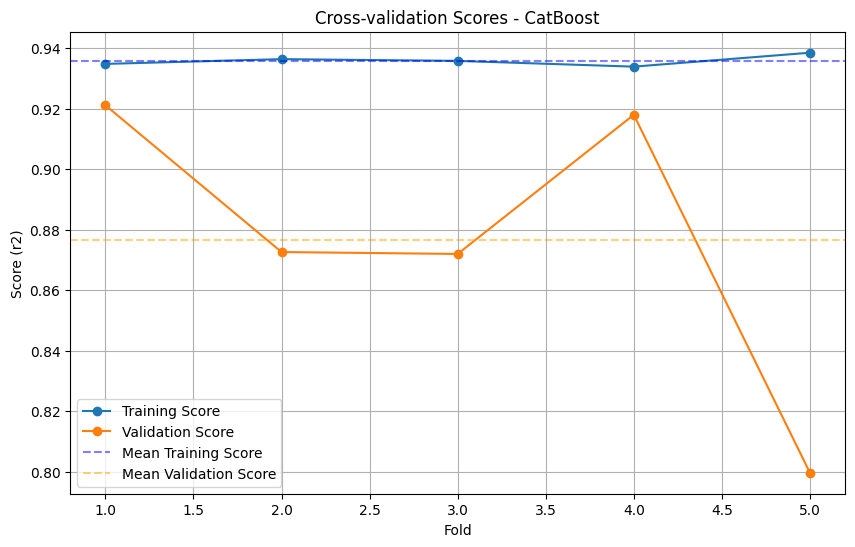

2024-10-23 07:09:51,776 - __main__ - INFO - LightGBM - Fold 1: Train r2=0.9041, Test r2=0.9076
2024-10-23 07:09:51,823 - __main__ - INFO - LightGBM - Fold 2: Train r2=0.9099, Test r2=0.8367
2024-10-23 07:09:51,859 - __main__ - INFO - LightGBM - Fold 3: Train r2=0.9077, Test r2=0.8676
2024-10-23 07:09:51,912 - __main__ - INFO - LightGBM - Fold 4: Train r2=0.8984, Test r2=0.9126
2024-10-23 07:09:51,942 - __main__ - INFO - LightGBM - Fold 5: Train r2=0.9186, Test r2=0.8270


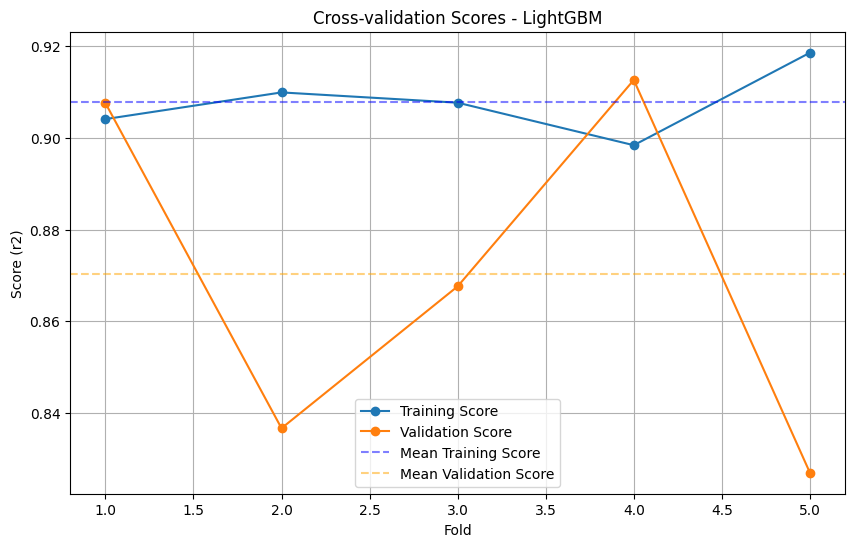

2024-10-23 07:09:52,525 - __main__ - INFO - RandomForest - Fold 1: Train r2=0.9352, Test r2=0.9029
2024-10-23 07:09:53,012 - __main__ - INFO - RandomForest - Fold 2: Train r2=0.9418, Test r2=0.8323
2024-10-23 07:09:53,434 - __main__ - INFO - RandomForest - Fold 3: Train r2=0.9363, Test r2=0.8704
2024-10-23 07:09:53,865 - __main__ - INFO - RandomForest - Fold 4: Train r2=0.9367, Test r2=0.9053
2024-10-23 07:09:54,390 - __main__ - INFO - RandomForest - Fold 5: Train r2=0.9438, Test r2=0.6791


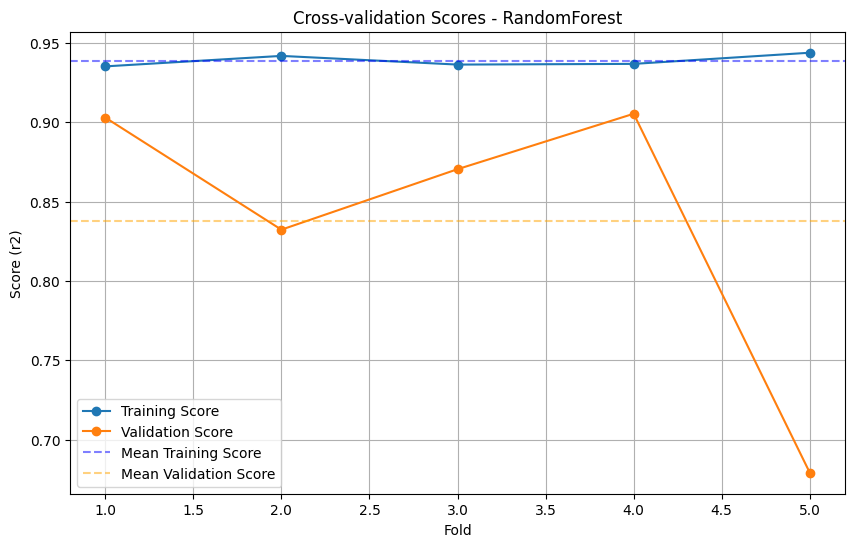

2024-10-23 07:09:54,828 - __main__ - INFO - AdaBoost - Fold 1: Train r2=0.8727, Test r2=0.8316
2024-10-23 07:09:55,139 - __main__ - INFO - AdaBoost - Fold 2: Train r2=0.8867, Test r2=0.7913
2024-10-23 07:09:55,411 - __main__ - INFO - AdaBoost - Fold 3: Train r2=0.8249, Test r2=0.8040
2024-10-23 07:09:55,693 - __main__ - INFO - AdaBoost - Fold 4: Train r2=0.8715, Test r2=0.8625
2024-10-23 07:09:55,960 - __main__ - INFO - AdaBoost - Fold 5: Train r2=0.8724, Test r2=0.5935


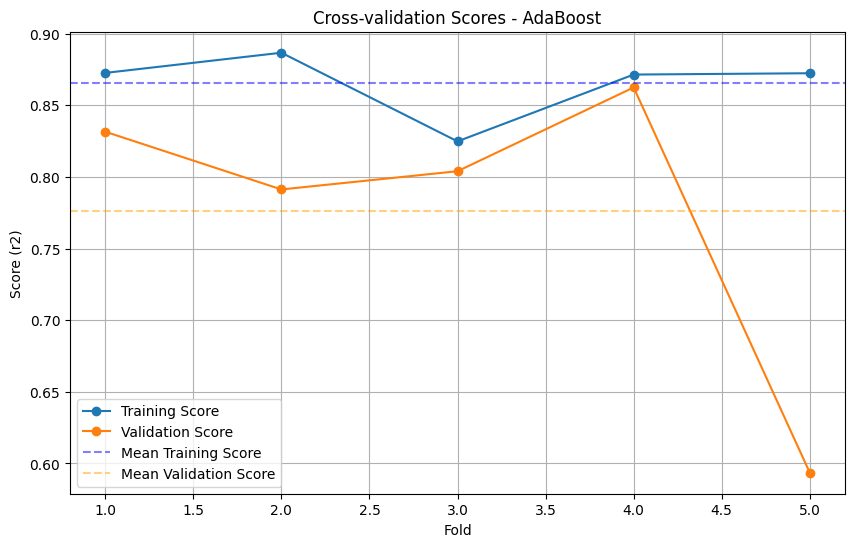

2024-10-23 07:09:56,114 - __main__ - INFO - Starting hyperparameter tuning...
2024-10-23 07:09:56,114 - __main__ - INFO - Tuning CatBoost...


KeyboardInterrupt: 

In [78]:
# --- 1. Imports and Constants ---
import os
import time
import logging
import pandas as pd
import numpy as np
from typing import Dict, List, Tuple, Optional
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import (
    GridSearchCV, 
    KFold, 
    learning_curve,
    validation_curve,
    train_test_split
)
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import matplotlib.pyplot as plt
import re
import warnings

# Configure logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s'
)
logger = logging.getLogger(__name__)

# Constants
TRAIN_TEST_DELTA_THRESHOLD = 0.2
MIN_FEQUENCY = 0.1
NUM_MODELS = 4  # Number of models to hyper tune

# Parameter Grids
PARAM_GRIDS = {
    'RandomForest': {
        'max_depth': [5, 7, 9, 11, None],
        'n_estimators': [100, 200, 300],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'LightGBM': {
        'num_leaves': [31, 63, 127],
        'learning_rate': [0.01, 0.05, 0.1],
        'n_estimators': [100, 200, 300],
        'min_child_samples': [20, 50, 100],
        'subsample': [0.8, 0.9, 1.0],
        'colsample_bytree': [0.8, 0.9, 1.0],
        'verbose': [-1]
    },
    'CatBoost': {
        'depth': [6, 8, 10],
        'learning_rate': [0.01, 0.05, 0.1],
        'iterations': [500, 1000],
        'l2_leaf_reg': [3, 5, 7],
        'subsample': [0.8, 0.9, 1.0]
    },
    'AdaBoost': {  
        'n_estimators': [50, 100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1, 1.0],
        'loss': ['linear', 'square', 'exponential']  
    }
}

# --- 2. Utility Classes ---
class DataLoader:
    """Handles data loading and initial preprocessing"""
    def __init__(self, file_path: str):
        self.file_path = file_path
        
    def load_data(self) -> pd.DataFrame:
        """Loads data from file and performs initial checks"""
        try:
            file_ext = os.path.splitext(self.file_path)[1].lower()
            
            if file_ext == '.csv':
                data = pd.read_csv(self.file_path)
            elif file_ext in ['.xlsx', '.xls']:
                data = pd.read_excel(self.file_path)
            else:
                raise ValueError(f"Unsupported file format: {file_ext}")
                
            logger.info(f"Loaded {len(data)} rows and {len(data.columns)} columns")
            return data
            
        except Exception as e:
            logger.error(f"Error loading data: {str(e)}")
            raise

class ColumnProcessor:
    """Handles column normalization and validation"""
    @staticmethod
    def normalize_column_names(df: pd.DataFrame) -> pd.DataFrame:
        """Normalizes column names by removing spaces and special characters"""
        df_copy = df.copy()
        df_copy.columns = [re.sub(r'[^a-zA-Z0-9]', '', col.strip()) for col in df_copy.columns]
        return df_copy

# --- 3. Feature Processing Classes ---

class FeaturePreprocessor(BaseEstimator, TransformerMixin):
    """Handles initial feature preprocessing including handling missing values and merging low-frequency categories."""
    
    def __init__(
        self, 
        numeric_features: List[str], 
        categorical_features: List[str], 
        cat_threshold: float = 1.0,  # Percentage threshold for handling missing values
        merge_threshold: float = 3.0  # Frequency threshold (%) for merging categories as 'Other'
    ):
        self.numeric_features = numeric_features
        self.categorical_features = categorical_features
        self.cat_threshold = cat_threshold
        self.merge_threshold = merge_threshold
        self.num_imputer = SimpleImputer(strategy='median')
        self.cat_modes = {}
        self.category_maps = {}

    def fit(self, X, y=None):
        """Learn preprocessing parameters from training data."""
        data = X.copy()
        
        # Fit numeric imputer on numeric features
        numeric_data = data[self.numeric_features].copy()
        self.num_imputer.fit(numeric_data)
        
        # Learn categorical handling parameters
        for col in self.categorical_features:
            if col in data.columns:
                # Calculate missing ratio
                missing_ratio = data[col].isnull().mean() * 100
                
                if missing_ratio > self.cat_threshold:
                    # Store original categories plus 'Unknown'
                    unique_cats = data[col].dropna().unique().tolist()
                    self.category_maps[col] = unique_cats + ['Unknown']
                else:
                    # Handle columns with low missing ratio
                    self.cat_modes[col] = data[col].mode()[0]
                    
                    # Calculate frequency percentages
                    value_counts = data[col].value_counts(normalize=True) * 100
                    
                    # Identify categories to keep (above merge_threshold)
                    keep_categories = value_counts[value_counts >= self.merge_threshold].index.tolist()
                    
                    # Add 'Other' if there are any low-frequency categories
                    if len(value_counts[value_counts < self.merge_threshold]) > 0:
                        keep_categories.append('Other')
                    
                    self.category_maps[col] = keep_categories

        return self

    def transform(self, X):
        """Apply preprocessing to features."""
        data = X.copy()
        
        # Transform numeric features using SimpleImputer
        numeric_data = data[self.numeric_features].copy()
        data[self.numeric_features] = self.num_imputer.transform(numeric_data)
        
        # Transform categorical features
        for col in self.categorical_features:
            if col in data.columns:
                # Calculate missing ratio for this column
                missing_ratio = data[col].isnull().mean() * 100
                
                if missing_ratio > self.cat_threshold:
                    # Fill missing values with 'Unknown'
                    data[col] = data[col].fillna('Unknown')
                else:
                    # Fill missing values with mode
                    data[col] = data[col].fillna(self.cat_modes[col])
                    
                    # Replace low-frequency categories with 'Other'
                    mapping_cats = set(self.category_maps[col]) - {'Other'}
                    data[col] = data[col].apply(
                        lambda x: 'Other' if x not in mapping_cats else x
                    )
                
                # Convert to categorical type with proper categories
                data[col] = pd.Categorical(
                    data[col],
                    categories=self.category_maps[col]
                )
        
        return data

class FeatureEngineer(BaseEstimator, TransformerMixin):
    """Creates new features and removes original features used in engineering"""
    def __init__(self):
        self.original_features = None
        self.engineered_features = None
        self.features_to_drop = None
        
    def fit(self, X, y=None):
        """Identify features to be created and dropped"""
        X = pd.DataFrame(X) if not isinstance(X, pd.DataFrame) else X
        
        self.original_features = X.columns.tolist()
        self.engineered_features = []
        self.features_to_drop = set()
        
        if all(col in X.columns for col in ['GrLivArea', 'TotalBsmtSF']):
            self.engineered_features.append('TotalSqFt')
            self.features_to_drop.update(['GrLivArea', 'TotalBsmtSF'])
        
        if all(col in X.columns for col in ['YrSold', 'YearBuilt']):
            self.engineered_features.append('HouseAge')
            self.features_to_drop.update(['YrSold', 'YearBuilt'])
        
        bathroom_cols = ['FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath']
        if all(col in X.columns for col in bathroom_cols):
            self.engineered_features.append('TotalBaths')
            self.features_to_drop.update(bathroom_cols)
        
        if all(col in X.columns for col in ['YrSold', 'YearRemodAdd']):
            self.engineered_features.append('YrRemodAge')
            self.features_to_drop.update(['YearRemodAdd'])
        
        return self

    def transform(self, X):
        """Apply feature engineering transformations"""
        X = pd.DataFrame(X) if not isinstance(X, pd.DataFrame) else X
        data = X.copy()
        
        if all(col in data.columns for col in ['GrLivArea', 'TotalBsmtSF']):
            data['TotalSqFt'] = data['GrLivArea'].astype(float) + data['TotalBsmtSF'].fillna(0).astype(float)
        
        if all(col in data.columns for col in ['YrSold', 'YearBuilt']):
            data['HouseAge'] = data['YrSold'].astype(float) - data['YearBuilt'].astype(float)
        
        bathroom_cols = ['FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath']
        if all(col in data.columns for col in bathroom_cols):
            data['TotalBaths'] = (
                data['FullBath'].astype(float) + 
                0.5 * data['HalfBath'].fillna(0).astype(float) + 
                data['BsmtFullBath'].fillna(0).astype(float) + 
                0.5 * data['BsmtHalfBath'].fillna(0).astype(float)
            )
        
        if all(col in data.columns for col in ['YrSold', 'YearRemodAdd']):
            data['YrRemodAge'] = data['YrSold'].astype(float) - data['YearRemodAdd'].astype(float)
        
        data = data.drop(columns=list(self.features_to_drop), errors='ignore')
        
        return data

# --- 4. Model Classes ---
class ModelTrainer:
    """Handles model training and evaluation"""
    def __init__(self):
        self.models = {
            'RandomForest': RandomForestRegressor(
                max_depth = 7,
                n_estimators = 100,
                random_state = 42
            ),
            'LightGBM': LGBMRegressor(
                objective='regression_l1', metric='mae', num_leaves=31, 
                learning_rate=0.1, n_estimators=50, min_child_samples=20, 
                min_child_weight=1e-3, subsample=1.0, colsample_bytree=1.0, 
                reg_alpha=0.0, reg_lambda=0.0
            ),
            'CatBoost': CatBoostRegressor(
                iterations=1000, learning_rate=0.01, depth=6, 
                subsample=1.0, colsample_bylevel=1.0, min_data_in_leaf=1, 
                verbose=0, objective="MAE", eval_metric="MAE",
                early_stopping_rounds=500
            ),
            'AdaBoost': AdaBoostRegressor(
                n_estimators=100, learning_rate=1.0)
        }
        
    def train_and_evaluate(
        self, 
        X_train: np.ndarray, 
        y_train: np.ndarray, 
        X_test: np.ndarray, 
        y_test: np.ndarray
    ) -> pd.DataFrame:
        """Trains multiple models and evaluates their performance"""
        results = []
        
        for name, model in self.models.items():
            start_time = time.time()
            
            # Train model
            model.fit(X_train, y_train)
            
            # Make predictions
            train_preds = model.predict(X_train)
            test_preds = model.predict(X_test)
            
            # Calculate metrics
            train_mae = mean_absolute_error(y_train, train_preds)
            test_mae = mean_absolute_error(y_test, test_preds)
            train_r2 = r2_score(y_train, train_preds)
            test_r2 = r2_score(y_test, test_preds)
            
            # Record results
            results.append({
                'Model': name,
                'Train MAE': train_mae,
                'Test MAE': test_mae,
                'Train R2': train_r2,
                'Test R2': test_r2,
                'Training Time': f"{time.time() - start_time:.2f}s"
            })
            
            logger.info(f"Trained {name}")
            
        return pd.DataFrame(results)

class ModelHypertuner:
    """Handles model hyperparameter tuning and validation analysis"""
    def __init__(
        self, 
        models: Dict,
        param_grids: Optional[Dict] = None,
        train_test_delta_threshold: float = TRAIN_TEST_DELTA_THRESHOLD,
        n_best_models: int = NUM_MODELS,
        cv_folds: int = 5,
        scoring: str = 'r2',
        n_jobs: int = -1
    ):
        self.models = models
        self.param_grids = param_grids or PARAM_GRIDS
        self.delta_threshold = train_test_delta_threshold
        self.n_best_models = n_best_models
        self.cv_folds = cv_folds
        self.scoring = scoring
        self.n_jobs = n_jobs
        self.best_models = {}
        self.cv_results = {}
        self.tuned_models = {}

    def select_best_models(
        self, 
        X_train: np.ndarray, 
        y_train: np.ndarray,
        X_test: np.ndarray,
        y_test: np.ndarray
    ) -> Dict:
        """Select best models based on performance metrics"""
        model_scores = []

        for name, model in self.models.items():
            model.fit(X_train, y_train)
            
            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)

            train_r2 = r2_score(y_train, y_train_pred)
            test_r2 = r2_score(y_test, y_test_pred)
            score_delta = abs(train_r2 - test_r2)

            model_scores.append({
                'name': name,
                'model': model,
                'train_r2': train_r2,
                'test_r2': test_r2,
                'score_delta': score_delta
            })

        valid_models = [
            model for model in model_scores 
            if model['score_delta'] <= self.delta_threshold
        ]

        if not valid_models:
            logger.warning(
                f"No models found with train-test delta below {self.delta_threshold}. "
                "Using all models."
            )
            valid_models = model_scores

        valid_models.sort(key=lambda x: x['test_r2'], reverse=True)
        selected_models = valid_models[:self.n_best_models]

        self.best_models = {
            model['name']: model['model'] for model in selected_models
        }

        logger.info(f"\nSelected {len(self.best_models)} models for hypertuning:")
        for model in selected_models:
            logger.info(
                f"Model: {model['name']}, "
                f"Train R²: {model['train_r2']:.4f}, "
                f"Test R²: {model['test_r2']:.4f}, "
                f"Delta: {model['score_delta']:.4f}"
            )

        return self.best_models

    def tune_hyperparameters(
        self,
        X: np.ndarray,
        y: np.ndarray
    ) -> Dict:
        """Perform hyperparameter tuning using GridSearchCV"""
        logger.info("Starting hyperparameter tuning...")
        
        for name, model in self.best_models.items():
            if name not in self.param_grids:
                logger.warning(f"No parameter grid defined for {name}. Skipping tuning.")
                continue
                
            logger.info(f"Tuning {name}...")
            grid_search = GridSearchCV(
                estimator=model,
                param_grid=self.param_grids[name],
                cv=self.cv_folds,
                scoring=self.scoring,
                n_jobs=self.n_jobs,
                verbose=0
            )
            
            # Fit grid search
            grid_search.fit(X, y)
            
            # Store best model and results
            self.tuned_models[name] = grid_search.best_estimator_
            self.cv_results[name] = pd.DataFrame(grid_search.cv_results_)
            
            logger.info(
                f"Best parameters for {name}: {grid_search.best_params_}\n"
                f"Best score: {grid_search.best_score_:.4f}"
            )
        
        return self.tuned_models

    def perform_cross_validation(
        self,
        X: np.ndarray,
        y: np.ndarray,
        plot: bool = True
    ) -> Dict:
        """Perform k-fold cross-validation on selected models"""
        cv_results = {}
        kf = KFold(n_splits=self.cv_folds, shuffle=True, random_state=42)

        for name, model in self.best_models.items():
            fold_scores = []
            train_scores = []
            test_scores = []

            for fold, (train_idx, test_idx) in enumerate(kf.split(X), 1):
                # Split data
                if isinstance(X, pd.DataFrame):
                    X_train_fold = X.iloc[train_idx]
                    X_test_fold = X.iloc[test_idx]
                else:
                    X_train_fold = X[train_idx]
                    X_test_fold = X[test_idx]
                
                y_train_fold = y.iloc[train_idx] if isinstance(y, pd.Series) else y[train_idx]
                y_test_fold = y.iloc[test_idx] if isinstance(y, pd.Series) else y[test_idx]

                # Train model
                model.fit(X_train_fold, y_train_fold)
                
                # Get scores
                train_score = model.score(X_train_fold, y_train_fold)
                test_score = model.score(X_test_fold, y_test_fold)
                
                train_scores.append(train_score)
                test_scores.append(test_score)
                
                logger.info(
                    f"{name} - Fold {fold}: "
                    f"Train {self.scoring}={train_score:.4f}, "
                    f"Test {self.scoring}={test_score:.4f}"
                )

            cv_results[name] = {
                'train_scores': train_scores,
                'test_scores': test_scores,
                'train_mean': np.mean(train_scores),
                'train_std': np.std(train_scores),
                'test_mean': np.mean(test_scores),
                'test_std': np.std(test_scores)
            }

            if plot:
                self._plot_cv_results(name, cv_results[name])

        return cv_results

    def _plot_cv_results(self, model_name: str, results: Dict) -> None:
        """Plot cross-validation results for a single model"""
        plt.figure(figsize=(10, 6))
        
        plt.plot(range(1, self.cv_folds + 1), results['train_scores'], 
                'o-', label='Training Score')
        plt.plot(range(1, self.cv_folds + 1), results['test_scores'], 
                'o-', label='Validation Score')
        
        plt.axhline(y=results['train_mean'], color='blue', linestyle='--', 
                   alpha=0.5, label='Mean Training Score')
        plt.axhline(y=results['test_mean'], color='orange', linestyle='--', 
                   alpha=0.5, label='Mean Validation Score')
        
        plt.title(f'Cross-validation Scores - {model_name}')
        plt.xlabel('Fold')
        plt.ylabel(f'Score ({self.scoring})')
        plt.legend(loc='best')
        plt.grid(True)
        plt.show()

    def plot_learning_curves(
        self,
        X: np.ndarray,
        y: np.ndarray,
        train_sizes: np.ndarray = np.linspace(0.1, 1.0, 5)
    ) -> None:
        """Plot learning curves for each selected model"""
        plt.figure(figsize=(15, 5 * len(self.best_models)))
        
        for idx, (name, model) in enumerate(self.best_models.items(), 1):
            train_sizes_abs, train_scores, test_scores = learning_curve(
                estimator=model,
                X=X,
                y=y,
                train_sizes=train_sizes,
                cv=self.cv_folds,
                n_jobs=self.n_jobs,
                scoring=self.scoring
            )
            
            train_mean = np.mean(train_scores, axis=1)
            train_std = np.std(train_scores, axis=1)
            test_mean = np.mean(test_scores, axis=1)
            test_std = np.std(test_scores, axis=1)
            
            plt.subplot(len(self.best_models), 1, idx)
            
            plt.plot(train_sizes_abs, train_mean, label='Training score')
            plt.plot(train_sizes_abs, test_mean, label='Cross-validation score')
            
            plt.fill_between(
                train_sizes_abs,
                train_mean - train_std,
                train_mean + train_std,
                alpha=0.1
            )
            plt.fill_between(
                train_sizes_abs,
                test_mean - test_std,
                test_mean + test_std,
                alpha=0.1
            )
            
            plt.title(f'Learning Curves - {name}')
            plt.xlabel('Training Examples')
            plt.ylabel(f'Score ({self.scoring})')
            plt.legend(loc='best')
            plt.grid(True)
        
        plt.tight_layout()
        plt.show()

    def get_cv_summary(self) -> pd.DataFrame:
        """Generate a summary of cross-validation results"""
        summary_data = []
        
        for name, cv_result in self.cv_results.items():
            best_idx = cv_result['rank_test_score'].argmin()
            
            summary_data.append({
                'Model': name,
                'Best Score': cv_result.loc[best_idx, 'mean_test_score'],
                'Std Score': cv_result.loc[best_idx, 'std_test_score'],
                'Best Parameters': cv_result.loc[best_idx, 'params']
            })
        
        return pd.DataFrame(summary_data)

class TunedModelTrainer:
    """Handles training of models using hypertuned parameters"""
    
    def __init__(self):
        self.best_models = {}
        self.model_predictions = {}
        self.performance_metrics = {}
        
    def train_with_tuned_params(
        self,
        cv_results: Dict,
        X_train: np.ndarray,
        y_train: np.ndarray,
        X_test: np.ndarray,
        y_test: np.ndarray,
        models: Dict
    ) -> Tuple[Dict, pd.DataFrame]:
        """Train models using the best parameters found from GridSearchCV"""
        metrics_list = []
        
        for model_name, cv_result in cv_results.items():
            try:
                # Get base model
                base_model = models[model_name]
                
                # Get best parameters
                best_params = cv_result['params'].iloc[cv_result['rank_test_score'].argmin()]
                
                # Create new model instance with best parameters
                tuned_model = type(base_model)(**best_params)
                
                # Train model
                start_time = time.time()
                tuned_model.fit(X_train, y_train)
                training_time = time.time() - start_time
                
                # Make predictions
                train_pred = tuned_model.predict(X_train)
                test_pred = tuned_model.predict(X_test)
                
                # Store model and predictions
                self.best_models[model_name] = tuned_model
                self.model_predictions[model_name] = {
                    'train': train_pred,
                    'test': test_pred
                }
                
                # Calculate metrics
                metrics = {
                    'Model': model_name,
                    'Train R²': r2_score(y_train, train_pred),
                    'Test R²': r2_score(y_test, test_pred),
                    'Train MAE': mean_absolute_error(y_train, train_pred),
                    'Test MAE': mean_absolute_error(y_test, test_pred),
                    'Train RMSE': np.sqrt(mean_squared_error(y_train, train_pred)),
                    'Test RMSE': np.sqrt(mean_squared_error(y_test, test_pred)),
                    'Training Time': f"{training_time:.2f}s",
                    'Best Parameters': best_params
                }
                
                metrics_list.append(metrics)
                self.performance_metrics[model_name] = metrics
                
                logger.info(f"Successfully trained tuned {model_name}")
                
            except Exception as e:
                logger.error(f"Error training tuned {model_name}: {str(e)}")
                continue
        
        return self.best_models, pd.DataFrame(metrics_list)
    
    def get_ensemble_predictions(
        self,
        weights: Optional[Dict[str, float]] = None
    ) -> Tuple[np.ndarray, np.ndarray]:
        """Create weighted ensemble predictions from tuned models"""
        if not self.model_predictions:
            raise ValueError("No model predictions available. Train models first.")
            
        if weights is None:
            weights = {
                model_name: 1/len(self.model_predictions) 
                for model_name in self.model_predictions.keys()
            }
            
        if set(weights.keys()) != set(self.model_predictions.keys()):
            raise ValueError("Weights must be provided for all models")
            
        train_pred = np.zeros_like(list(self.model_predictions.values())[0]['train'])
        test_pred = np.zeros_like(list(self.model_predictions.values())[0]['test'])
        
        for model_name, weight in weights.items():
            train_pred += weight * self.model_predictions[model_name]['train']
            test_pred += weight * self.model_predictions[model_name]['test']
            
        return train_pred, test_pred
    
    def get_feature_importance(self, model_name: str) -> Optional[pd.DataFrame]:
        """Get feature importance for a specific model if available"""
        if model_name not in self.best_models:
            return None
            
        model = self.best_models[model_name]
        
        if hasattr(model, 'feature_importances_'):
            importance_scores = model.feature_importances_
            
            importance_df = pd.DataFrame({
                'Feature': [f"Feature_{i}" for i in range(len(importance_scores))],
                'Importance': importance_scores
            })
            
            return importance_df.sort_values('Importance', ascending=False)
        
        return None
    
class FeaturePreprocessor(BaseEstimator, TransformerMixin):
    """Handles initial feature preprocessing including handling missing values and data type conversions"""
    def __init__(self, numeric_features: List[str], categorical_features: List[str]):
        self.numeric_features = numeric_features
        self.categorical_features = categorical_features
        self.category_maps = {}
        self.numeric_medians = {}
        self.feature_names_after_encoding = None

    def fit(self, X, y=None):
        """Learn preprocessing parameters from training data"""
        for col in self.numeric_features:
            if col in X.columns:
                self.numeric_medians[col] = X[col].median()

        for col in self.categorical_features:
            if col in X.columns:
                categories = X[col].dropna().unique().tolist()
                if 'Unknown' not in categories:
                    categories.append('Unknown')
                self.category_maps[col] = categories
        return self

    def transform(self, X):
        """Apply preprocessing to features"""
        data = X.copy()
        
        # Process numeric features
        for col in self.numeric_features:
            if col in data.columns:
                data[col] = pd.to_numeric(data[col], errors='coerce')
                data[col].fillna(self.numeric_medians.get(col, 0), inplace=True)
        
        # Process categorical features
        for col in self.categorical_features:
            if col in data.columns:
                data[col] = data[col].fillna('Unknown')
                data[col] = pd.Categorical(
                    data[col],
                    categories=self.category_maps.get(col, []),
                    ordered=False
                )
        
        return data

    def get_feature_names(self, pipeline) -> Dict[str, List[str]]:
        """Get feature names after preprocessing and one-hot encoding"""
        try:
            # Get the column transformer
            final_preprocessor = pipeline.named_steps['final_preprocessing']
            
            # Get numeric and categorical transformers
            numeric_features = final_preprocessor.named_transformers_['num'].get_feature_names_out(
                input_features=self.numeric_features
            )
            
            categorical_features = final_preprocessor.named_transformers_['cat'].get_feature_names_out(
                input_features=self.categorical_features
            )
            
            feature_info = {
                'numeric_features': list(numeric_features),
                'categorical_features': list(categorical_features),
                'total_features': len(numeric_features) + len(categorical_features)
            }
            
            # Log feature information
            logger.info("\n=== Feature Information after Preprocessing ===")
            logger.info(f"\nNumeric Features ({len(numeric_features)}):")
            for feat in numeric_features:
                logger.info(f"  - {feat}")
            
            logger.info(f"\nCategorical Features after One-Hot Encoding ({len(categorical_features)}):")
            for feat in categorical_features:
                logger.info(f"  - {feat}")
            
            logger.info(f"\nTotal number of features: {feature_info['total_features']}")
            
            return feature_info
            
        except Exception as e:
            logger.error(f"Error getting feature names: {str(e)}")
            return None

class HousePricePipeline:
    def run(self) -> Tuple[Dict, Dict]:
        """Runs the entire pipeline"""
        try:
            logger.info("Starting house price prediction pipeline...")
            
            # Load data
            logger.info("Loading data...")
            data = self.data_loader.load_data()
            data = self.column_processor.normalize_column_names(data)
            
            # Split features and target
            logger.info("Preparing features and target...")
            X = data.drop('SalePrice', axis=1)
            y = data['SalePrice']
            
            # Create train-test split
            logger.info("Splitting data into train and test sets...")
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.2, random_state=42
            )
            
            # Create and fit preprocessing pipeline
            logger.info("Creating and fitting preprocessing pipeline...")
            preprocessing_pipeline = self.create_preprocessing_pipeline()
            
            # Fit pipeline on training data and transform both train and test
            X_train_processed = preprocessing_pipeline.fit_transform(X_train)
            X_test_processed = preprocessing_pipeline.transform(X_test)
            
            # Get and log feature information after preprocessing
            feature_preprocessor = preprocessing_pipeline.named_steps['initial_preprocessing']
            feature_info = feature_preprocessor.get_feature_names(preprocessing_pipeline)
            
            logger.info("\n=== Starting Model Training ===")
            
            # Rest of the pipeline remains the same...
            trainer = ModelTrainer()
            initial_results = trainer.train_and_evaluate(
                X_train_processed, y_train, X_test_processed, y_test
            )
            
            # Continue with the rest of the pipeline...
            
            return {
                'pipeline': preprocessing_pipeline,
                'feature_info': feature_info,
                # Rest of the returns remain the same...
            }, {
                'initial_results': initial_results,
                # Rest of the returns remain the same...
            }
            
        except Exception as e:
            logger.error(f"Pipeline failed: {str(e)}")
            raise

def print_detailed_summary(self, results: Dict) -> None:
    """Print detailed summary of pipeline results"""
    if 'feature_info' in results:
        print("\n=== Feature Information ===")
        print(f"Number of numeric features: {len(results['feature_info']['numeric_features'])}")
        print(f"Number of categorical features after encoding: {len(results['feature_info']['categorical_features'])}")
        print(f"Total features: {results['feature_info']['total_features']}")
    
    print("\n=== Model Performance ===")
    print("\n1. Initial Model Performance:")
    print(results['initial_results'].to_string(index=False))
    

class HousePricePipeline:
    """Main pipeline class that orchestrates the entire process"""
    def __init__(self, file_path: str):
        self.file_path = file_path
        self.data_loader = DataLoader(file_path)
        self.column_processor = ColumnProcessor()
        self.min_frequency = MIN_FEQUENCY
        
        self.engineering_features = [
            'GrLivArea', 'TotalBsmtSF',
            'YrSold', 'YearBuilt',
            'FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath',
            'YearRemodAdd'
        ]
        
        self.original_numeric_features = [
            'OverallQual',
            'TotRmsAbvGrd',
            'GarageCars',
            'Fireplaces',
            'LotFrontage',
            'MasVnrArea'
        ]
        
        self.engineered_features = [
            'TotalSqFt',
            'HouseAge',
            'TotalBaths',
            'YrRemodAge'
        ]
        
        self.numeric_features = self.original_numeric_features + self.engineered_features
        
        self.categorical_features = [
            'Neighborhood',
            'FireplaceQu',
            'KitchenQual',
            'BsmtExposure'
        ]

    def create_preprocessing_pipeline(self) -> Pipeline:
        """Creates the preprocessing pipeline with correct feature handling"""
        numeric_transformer = Pipeline(steps=[
            ('scaler', StandardScaler())
        ])
        
        categorical_transformer = Pipeline(steps=[
            ('onehot', OneHotEncoder(
                drop='first',
                min_frequency=self.min_frequency,
                sparse_output=False,
                handle_unknown='ignore'
            ))
        ])
        
        initial_numeric_features = list(set(
            self.engineering_features + 
            [f for f in self.numeric_features if f not in self.engineered_features]
        ))
        
        initial_preprocessor = ColumnTransformer(
            transformers=[
                ('num', numeric_transformer, initial_numeric_features),
                ('cat', categorical_transformer, self.categorical_features)
            ],
            remainder='passthrough'
        )
        
        final_preprocessor = ColumnTransformer(
            transformers=[
                ('num', numeric_transformer, self.numeric_features),
                ('cat', categorical_transformer, self.categorical_features)
            ],
            remainder='drop'
        )
        
        return Pipeline([
            ('initial_preprocessing', FeaturePreprocessor(
                numeric_features=initial_numeric_features,
                categorical_features=self.categorical_features
            )),
            ('feature_engineering', FeatureEngineer()),
            ('final_preprocessing', final_preprocessor)
        ])

    def run(self) -> Tuple[Dict, Dict]:
        """Runs the entire pipeline"""
        try:
            logger.info("Loading data...")
            data = self.data_loader.load_data()
            
            data = self.column_processor.normalize_column_names(data)
            
            logger.info("Preparing features and target...")
            X = data.drop('SalePrice', axis=1)
            y = data['SalePrice']
            
            logger.info("Splitting data into train and test sets...")

            # Create train-test split
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.2, random_state=42
            )
            
            logger.info("Creating and fitting preprocessing pipeline...")
            preprocessing_pipeline = self.create_preprocessing_pipeline()
            
            # Fit pipeline on training data and transform both train and test
            X_train_processed = preprocessing_pipeline.fit_transform(X_train)
            X_test_processed = preprocessing_pipeline.transform(X_test)
            
            logger.info("Training initial models...")
            trainer = ModelTrainer()
            initial_results = trainer.train_and_evaluate(
                X_train_processed, y_train, X_test_processed, y_test
            )
            
            logger.info("Starting hyperparameter tuning...")
            hypertuner = ModelHypertuner(
                models=trainer.models,
                param_grids=PARAM_GRIDS,
                train_test_delta_threshold=0.1,
                n_best_models=NUM_MODELS
            )
            
            # Select best models
            best_models = hypertuner.select_best_models(
                X_train_processed, y_train, X_test_processed, y_test
            )
            
            # Perform cross-validation
            cv_results = hypertuner.perform_cross_validation(
                X_train_processed, y_train, plot=True
            )
            
            # Tune hyperparameters
            tuned_models = hypertuner.tune_hyperparameters(
                X_train_processed, y_train
            )
            
            # Plot learning curves
            hypertuner.plot_learning_curves(X_train_processed, y_train)
            
            # Train models with tuned parameters
            logger.info("Training models with tuned parameters...")
            tuned_trainer = TunedModelTrainer()
            final_models, final_metrics = tuned_trainer.train_with_tuned_params(
                cv_results=hypertuner.cv_results,
                X_train=X_train_processed,
                y_train=y_train,
                X_test=X_test_processed,
                y_test=y_test,
                models=trainer.models
            )
            
            # Create ensemble predictions
            train_ensemble, test_ensemble = tuned_trainer.get_ensemble_predictions()
            
            # Add ensemble results to final metrics
            ensemble_metrics = {
                'Model': 'Ensemble',
                'Train R²': r2_score(y_train, train_ensemble),
                'Test R²': r2_score(y_test, test_ensemble),
                'Train MAE': mean_absolute_error(y_train, train_ensemble),
                'Test MAE': mean_absolute_error(y_test, test_ensemble),
                'Train RMSE': np.sqrt(mean_squared_error(y_train, train_ensemble)),
                'Test RMSE': np.sqrt(mean_squared_error(y_test, test_ensemble)),
                'Training Time': 'N/A',
                'Best Parameters': 'N/A'
            }
            final_metrics = pd.concat([
                final_metrics,
                pd.DataFrame([ensemble_metrics])
            ], ignore_index=True)
            
            # Get feature importance for final models
            feature_importance = {}
            for model_name in final_models.keys():
                importance_df = tuned_trainer.get_feature_importance(model_name)
                if importance_df is not None:
                    feature_importance[model_name] = importance_df
            
            logger.info("Pipeline completed successfully")
            
            return {
                'pipeline': preprocessing_pipeline,
                'models': trainer.models,
                'tuned_models': final_models,
                'ensemble_predictions': (train_ensemble, test_ensemble),
                'cv_results': cv_results,
                'feature_importance': feature_importance,
                'X_train': X_train_processed,
                'X_test': X_test_processed,
                'y_train': y_train,
                'y_test': y_test
            }, {
                'initial_results': initial_results,
                'cv_summary': hypertuner.get_cv_summary(),
                'final_metrics': final_metrics
            }
            
        except Exception as e:
            logger.error(f"Pipeline failed: {str(e)}")
            raise

    def print_detailed_summary(self, results: Dict) -> None:
        """Print detailed summary of pipeline results"""
        print("\n=== House Price Prediction Pipeline Summary ===")
        
        print("\n1. Initial Model Performance:")
        print(results['initial_results'].to_string(index=False))
        
        print("\n2. Cross-validation Summary:")
        print(results['cv_summary'].to_string(index=False))
        
        print("\n3. Final Model Performance (After Tuning):")
        print(results['final_metrics'].to_string(index=False))
        
        if 'feature_importance' in results:
            print("\n4. Feature Importance by Model:")
            for model_name, importance_df in results['feature_importance'].items():
                print(f"\n{model_name} Top 10 Features:")
                print(importance_df.head(10).to_string(index=False))

def main():
    """Main execution function"""
    # Suppress warnings
    warnings.filterwarnings('ignore')
    
    # File path
    file_path = './data/raw_data/AmesHousing.csv'  # Adjust as needed
    
    try:
        # Create and run pipeline
        logger.info("Starting house price prediction pipeline...")
        pipeline = HousePricePipeline(file_path)
        artifacts, results = pipeline.run()
        
        # Print detailed summary
        pipeline.print_detailed_summary(results)
        
        logger.info("Pipeline execution completed successfully")
        return artifacts, results
        
    except Exception as e:
        logger.error(f"Error in main execution: {str(e)}")
        raise

if __name__ == "__main__":
    main()



2024-10-24 00:01:43,623 - __main__ - INFO - Starting house price prediction pipeline...
2024-10-24 00:01:43,656 - __main__ - INFO - Loaded 2930 rows and 81 columns
2024-10-24 00:01:43,669 - __main__ - INFO - 
Column: Neighborhood
2024-10-24 00:01:43,669 - __main__ - INFO - Categories to keep: ['NAmes', 'CollgCr', 'OldTown', 'Other']
2024-10-24 00:01:43,669 - __main__ - INFO - Number of categories after merging: 4
2024-10-24 00:01:43,669 - __main__ - INFO - 
Column: KitchenQual
2024-10-24 00:01:43,669 - __main__ - INFO - Categories to keep: ['TA', 'Gd', 'Other']
2024-10-24 00:01:43,669 - __main__ - INFO - Number of categories after merging: 3
2024-10-24 00:01:43,669 - __main__ - INFO - 
Column: BsmtExposure
2024-10-24 00:01:43,669 - __main__ - INFO - Categories to keep: ['No', 'Av', 'Gd', 'Mn']
2024-10-24 00:01:43,669 - __main__ - INFO - Number of categories after merging: 4
2024-10-24 00:01:43,682 - __main__ - INFO - 
=== Feature Engineering Information ===
2024-10-24 00:01:43,682 - __

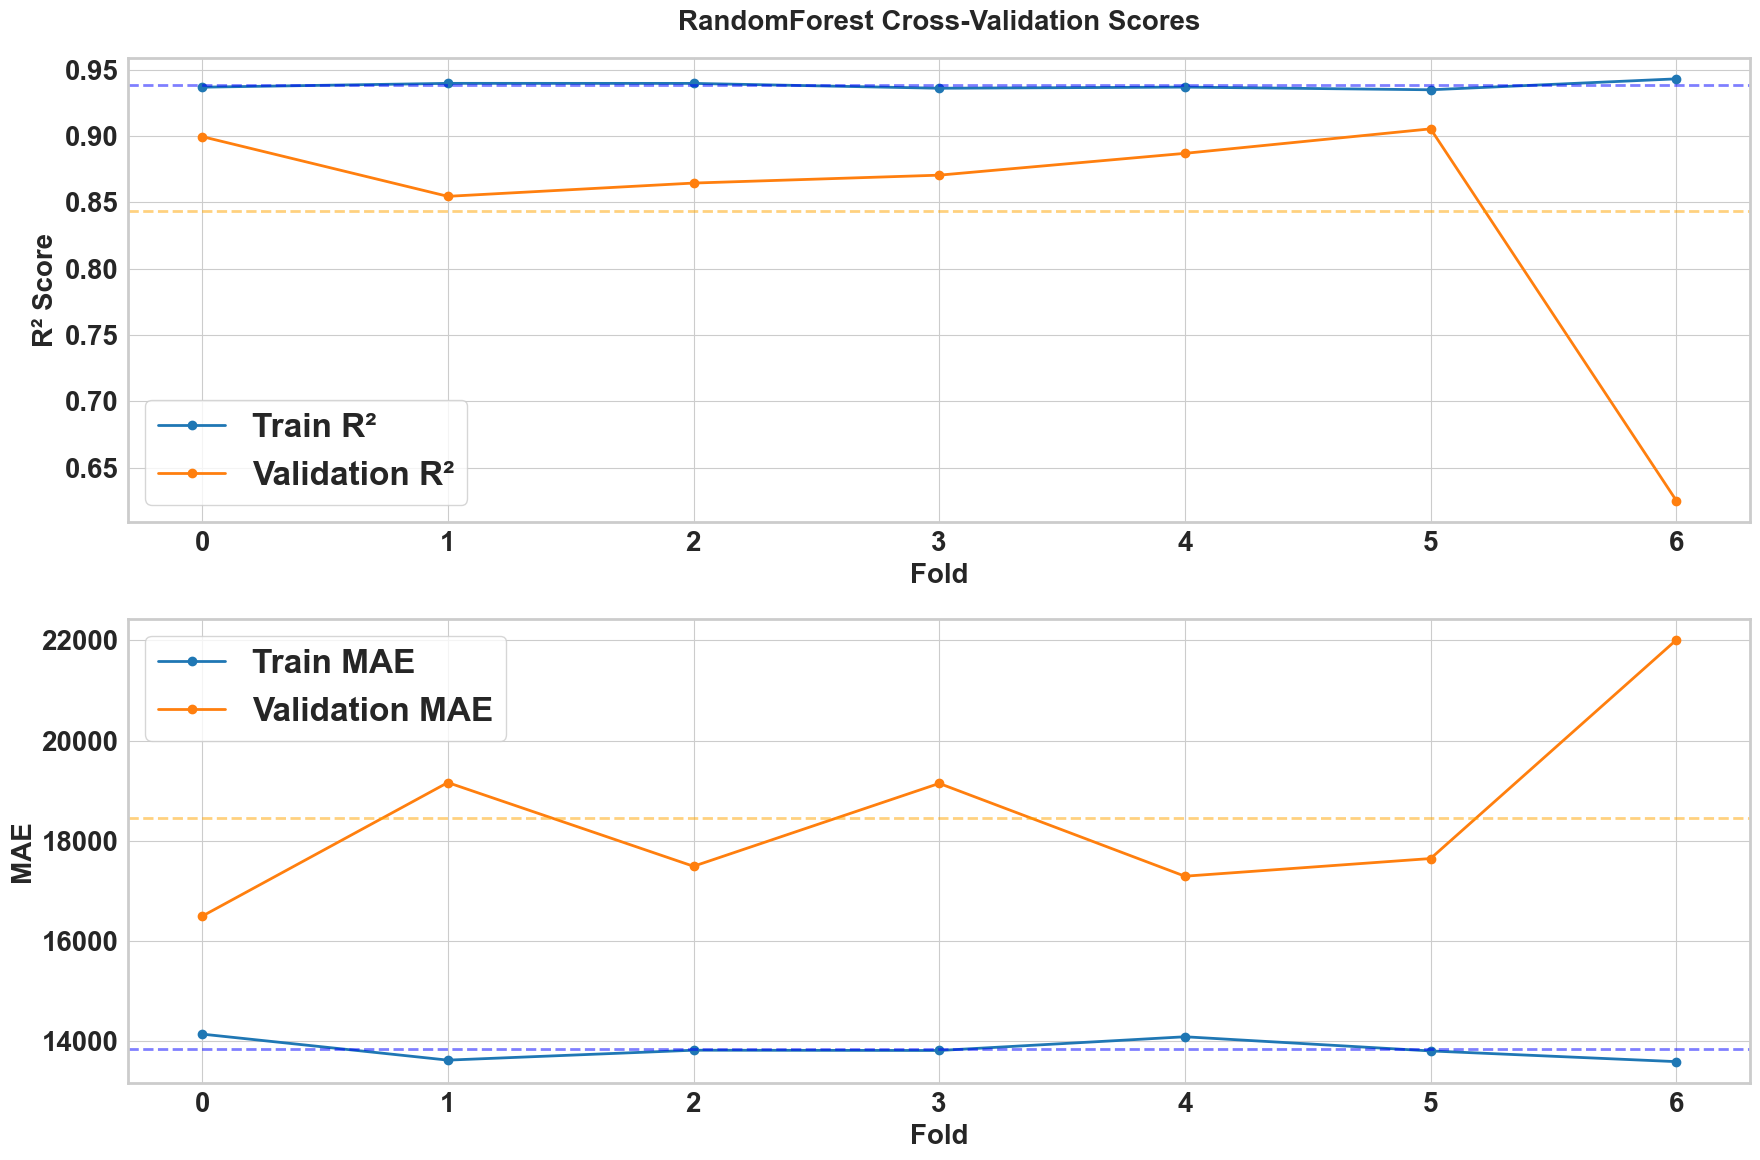

2024-10-24 00:01:47,434 - __main__ - INFO - 
Performing 7-fold CV for LightGBM
2024-10-24 00:01:47,495 - __main__ - INFO - 
Fold 1 Results for LightGBM:
2024-10-24 00:01:47,496 - __main__ - INFO - Train R2: 0.9051
2024-10-24 00:01:47,496 - __main__ - INFO - Validation R2: 0.9122
2024-10-24 00:01:47,496 - __main__ - INFO - Train MAE: 12665.6019
2024-10-24 00:01:47,496 - __main__ - INFO - Validation MAE: 15381.5602
2024-10-24 00:01:47,551 - __main__ - INFO - 
Fold 2 Results for LightGBM:
2024-10-24 00:01:47,552 - __main__ - INFO - Train R2: 0.9107
2024-10-24 00:01:47,553 - __main__ - INFO - Validation R2: 0.8570
2024-10-24 00:01:47,553 - __main__ - INFO - Train MAE: 12557.5806
2024-10-24 00:01:47,554 - __main__ - INFO - Validation MAE: 17319.4408
2024-10-24 00:01:47,603 - __main__ - INFO - 
Fold 3 Results for LightGBM:
2024-10-24 00:01:47,605 - __main__ - INFO - Train R2: 0.9109
2024-10-24 00:01:47,605 - __main__ - INFO - Validation R2: 0.8903
2024-10-24 00:01:47,606 - __main__ - INFO - 

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000168 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 853
[LightGBM] [Info] Number of data points in the train set: 2009, number of used features: 23
[LightGBM] [Info] Start training from score 160000.000000
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000199 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 848
[LightGBM] [Info] Number of data points in the train set: 2009, number of used features: 23
[LightGBM] [Info] Start training from score 160000.000000
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000138 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 852
[LightGBM] [Info] Number of data points in the train set: 2009, number of used features: 23
[LightGBM] [Info] Start

2024-10-24 00:01:47,656 - __main__ - INFO - 
Fold 4 Results for LightGBM:
2024-10-24 00:01:47,656 - __main__ - INFO - Train R2: 0.9103
2024-10-24 00:01:47,656 - __main__ - INFO - Validation R2: 0.8596
2024-10-24 00:01:47,656 - __main__ - INFO - Train MAE: 12434.0005
2024-10-24 00:01:47,656 - __main__ - INFO - Validation MAE: 18246.3966
2024-10-24 00:01:47,705 - __main__ - INFO - 
Fold 5 Results for LightGBM:
2024-10-24 00:01:47,716 - __main__ - INFO - Train R2: 0.9071
2024-10-24 00:01:47,717 - __main__ - INFO - Validation R2: 0.9152
2024-10-24 00:01:47,718 - __main__ - INFO - Train MAE: 12699.3373
2024-10-24 00:01:47,718 - __main__ - INFO - Validation MAE: 14900.0475
2024-10-24 00:01:47,767 - __main__ - INFO - 
Fold 6 Results for LightGBM:
2024-10-24 00:01:47,768 - __main__ - INFO - Train R2: 0.8997
2024-10-24 00:01:47,769 - __main__ - INFO - Validation R2: 0.9080
2024-10-24 00:01:47,770 - __main__ - INFO - Train MAE: 12692.1726
2024-10-24 00:01:47,771 - __main__ - INFO - Validation MA

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000131 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 845
[LightGBM] [Info] Number of data points in the train set: 2009, number of used features: 23
[LightGBM] [Info] Start training from score 159000.000000
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000189 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 848
[LightGBM] [Info] Number of data points in the train set: 2009, number of used features: 23
[LightGBM] [Info] Start training from score 160000.000000
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000168 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 847
[LightGBM] [Info] Number of data points in the train set: 2010, number of used features: 23
[LightGBM] [Info] Start

2024-10-24 00:01:47,866 - __main__ - INFO - 
Fold 7 Results for LightGBM:
2024-10-24 00:01:47,883 - __main__ - INFO - Train R2: 0.9228
2024-10-24 00:01:47,883 - __main__ - INFO - Validation R2: 0.7981
2024-10-24 00:01:47,883 - __main__ - INFO - Train MAE: 12127.7396
2024-10-24 00:01:47,883 - __main__ - INFO - Validation MAE: 19466.4265


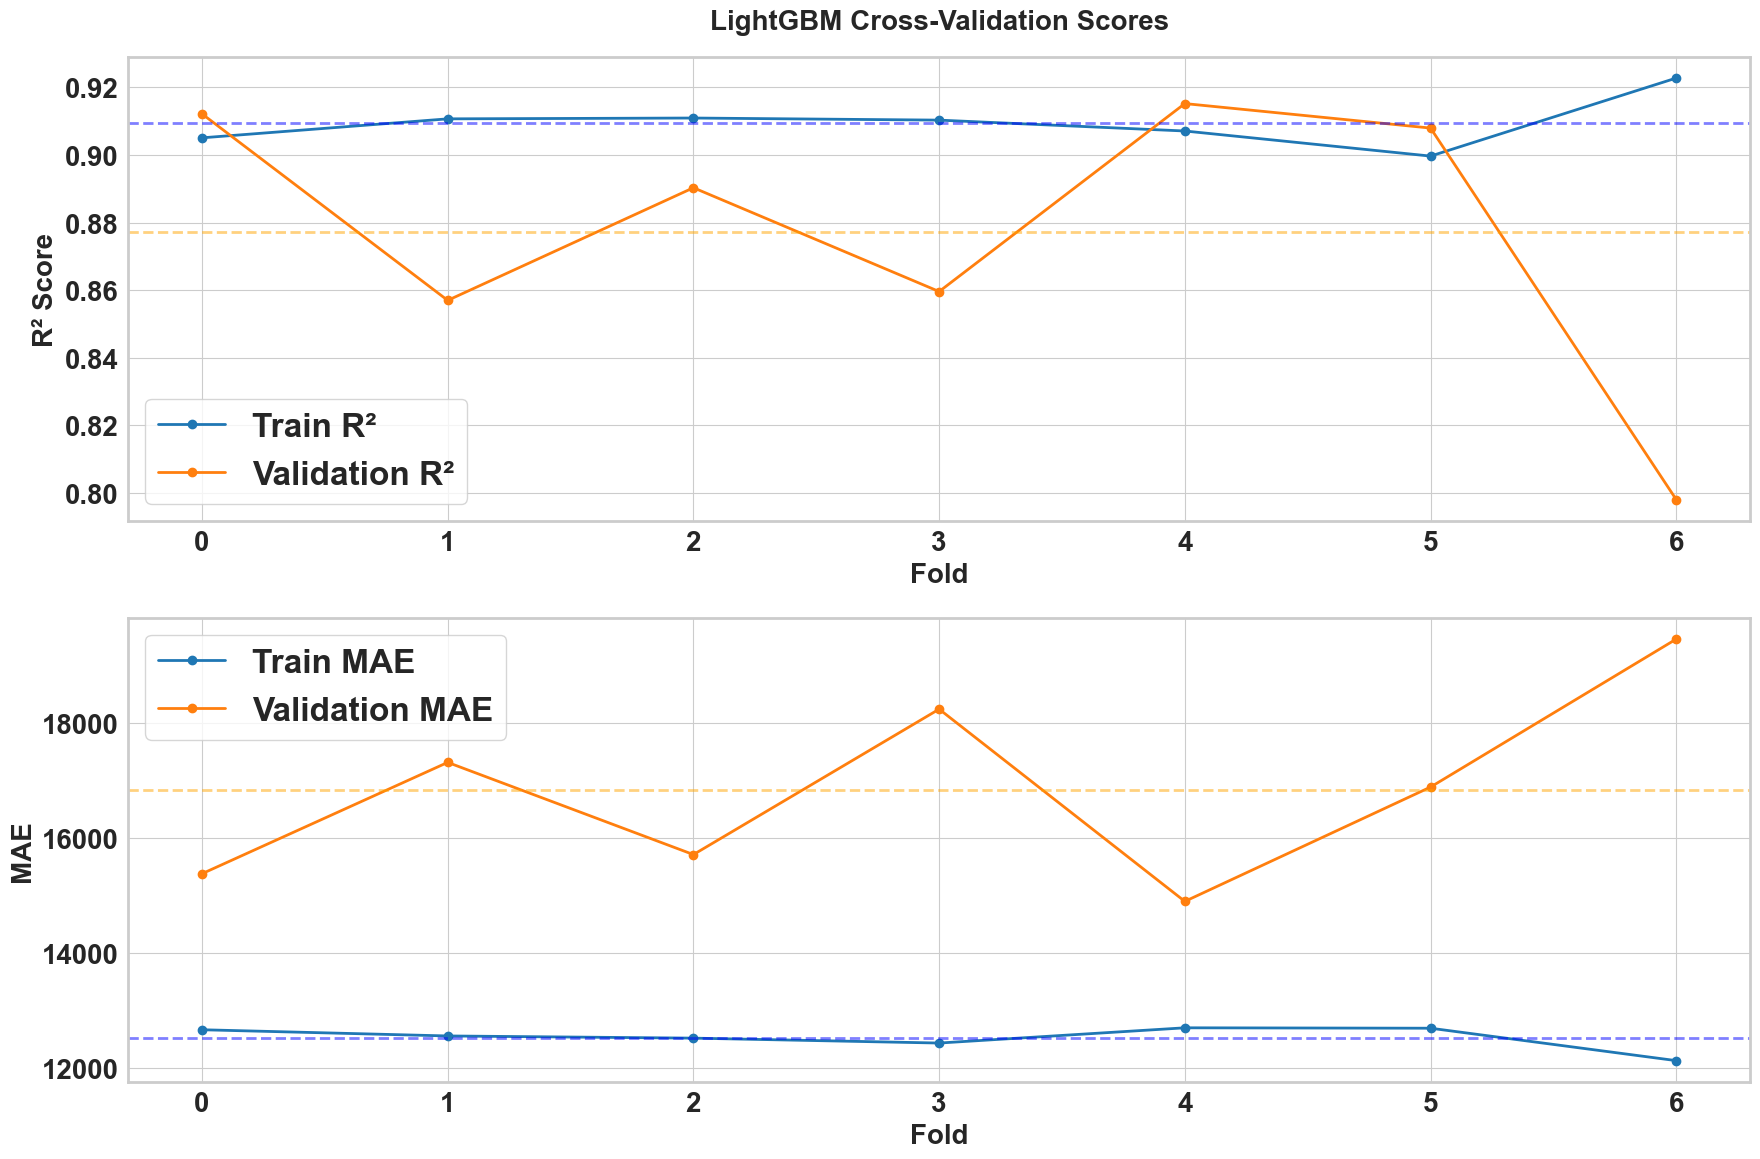

2024-10-24 00:01:48,254 - __main__ - INFO - 
Performing 7-fold CV for CatBoost
2024-10-24 00:01:50,401 - __main__ - INFO - 
Fold 1 Results for CatBoost:
2024-10-24 00:01:50,401 - __main__ - INFO - Train R2: 0.9370
2024-10-24 00:01:50,401 - __main__ - INFO - Validation R2: 0.9234
2024-10-24 00:01:50,401 - __main__ - INFO - Train MAE: 12634.6244
2024-10-24 00:01:50,401 - __main__ - INFO - Validation MAE: 14366.4262
2024-10-24 00:01:52,636 - __main__ - INFO - 
Fold 2 Results for CatBoost:
2024-10-24 00:01:52,636 - __main__ - INFO - Train R2: 0.9348
2024-10-24 00:01:52,636 - __main__ - INFO - Validation R2: 0.8734
2024-10-24 00:01:52,636 - __main__ - INFO - Train MAE: 12648.3418
2024-10-24 00:01:52,636 - __main__ - INFO - Validation MAE: 16544.5422
2024-10-24 00:01:54,838 - __main__ - INFO - 
Fold 3 Results for CatBoost:
2024-10-24 00:01:54,838 - __main__ - INFO - Train R2: 0.9384
2024-10-24 00:01:54,838 - __main__ - INFO - Validation R2: 0.8946
2024-10-24 00:01:54,838 - __main__ - INFO - 

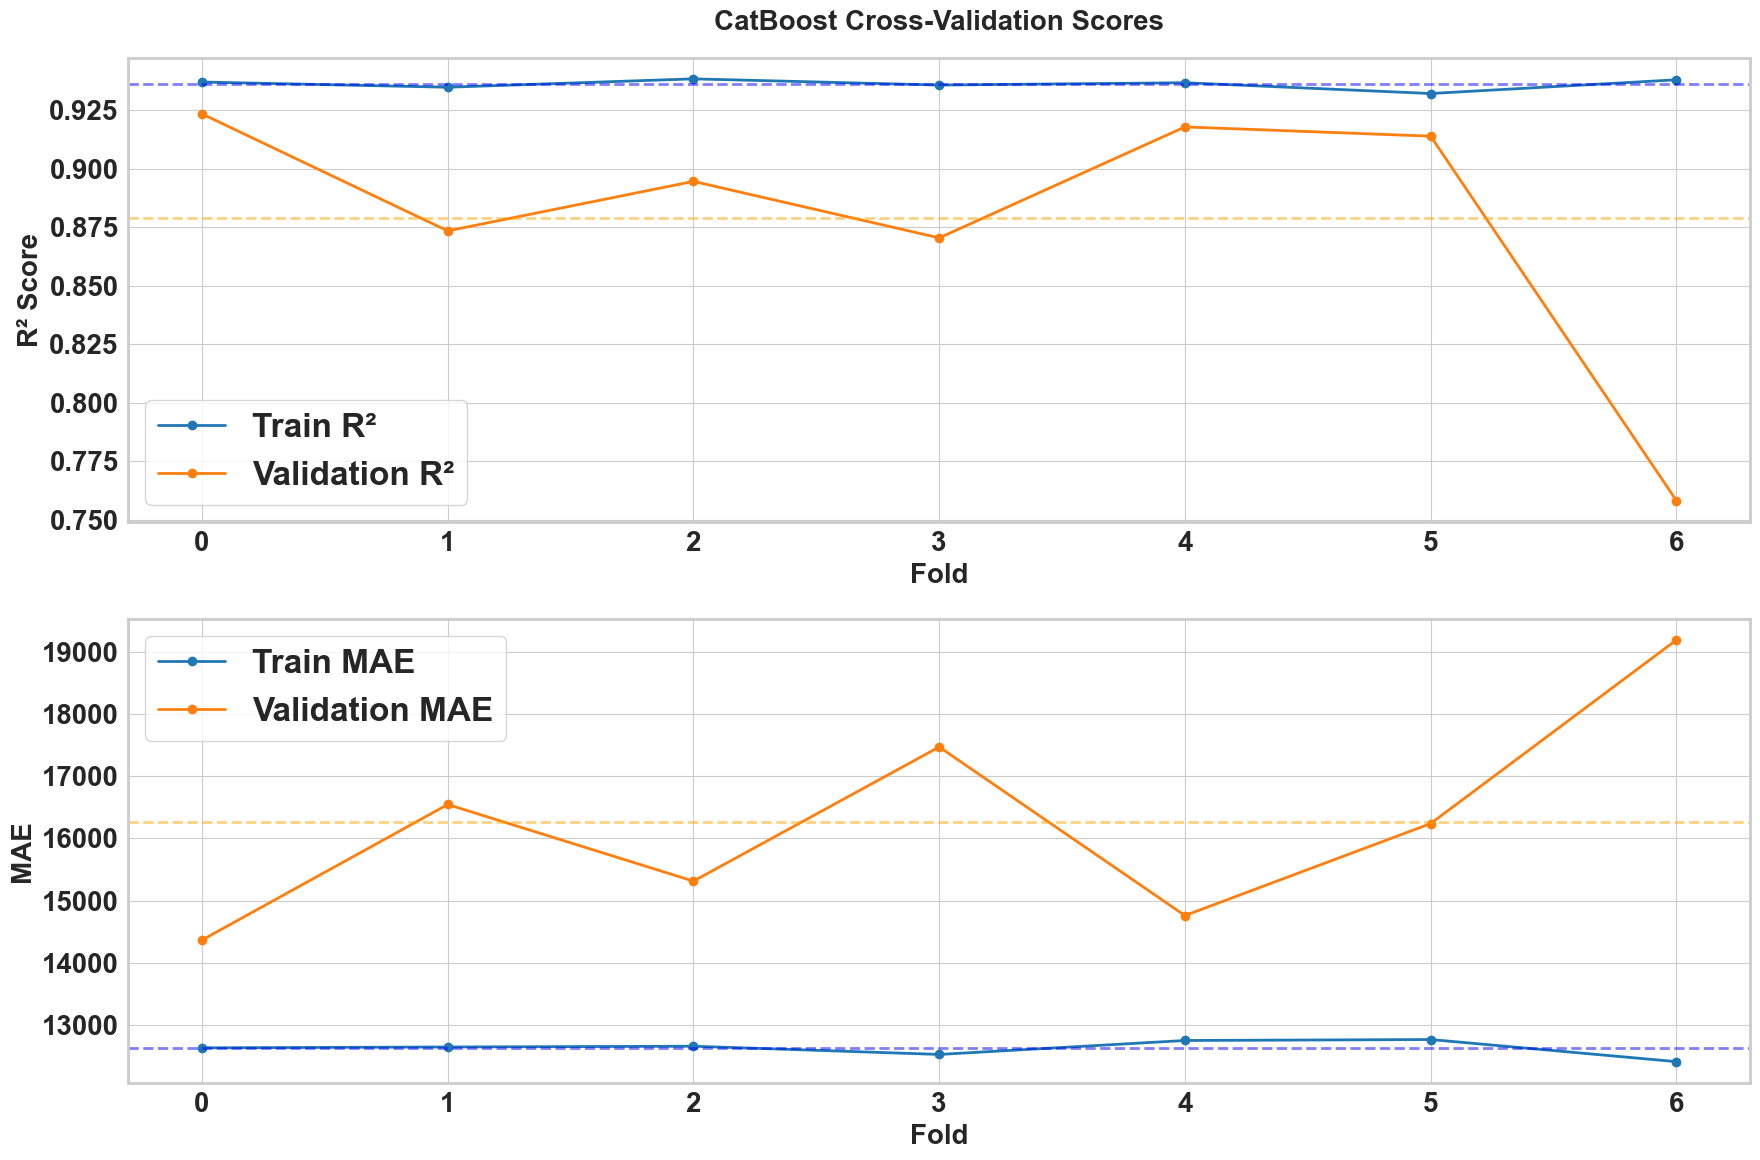

2024-10-24 00:02:03,983 - __main__ - INFO - 
Performing 7-fold CV for AdaBoost
2024-10-24 00:02:04,254 - __main__ - INFO - 
Fold 1 Results for AdaBoost:
2024-10-24 00:02:04,254 - __main__ - INFO - Train R2: 0.8684
2024-10-24 00:02:04,254 - __main__ - INFO - Validation R2: 0.8517
2024-10-24 00:02:04,254 - __main__ - INFO - Train MAE: 21661.2658
2024-10-24 00:02:04,254 - __main__ - INFO - Validation MAE: 20881.0235
2024-10-24 00:02:04,534 - __main__ - INFO - 
Fold 2 Results for AdaBoost:
2024-10-24 00:02:04,534 - __main__ - INFO - Train R2: 0.8639
2024-10-24 00:02:04,534 - __main__ - INFO - Validation R2: 0.7991
2024-10-24 00:02:04,534 - __main__ - INFO - Train MAE: 22042.0575
2024-10-24 00:02:04,534 - __main__ - INFO - Validation MAE: 24496.8921
2024-10-24 00:02:04,803 - __main__ - INFO - 
Fold 3 Results for AdaBoost:
2024-10-24 00:02:04,817 - __main__ - INFO - Train R2: 0.8787
2024-10-24 00:02:04,818 - __main__ - INFO - Validation R2: 0.7958
2024-10-24 00:02:04,818 - __main__ - INFO - 

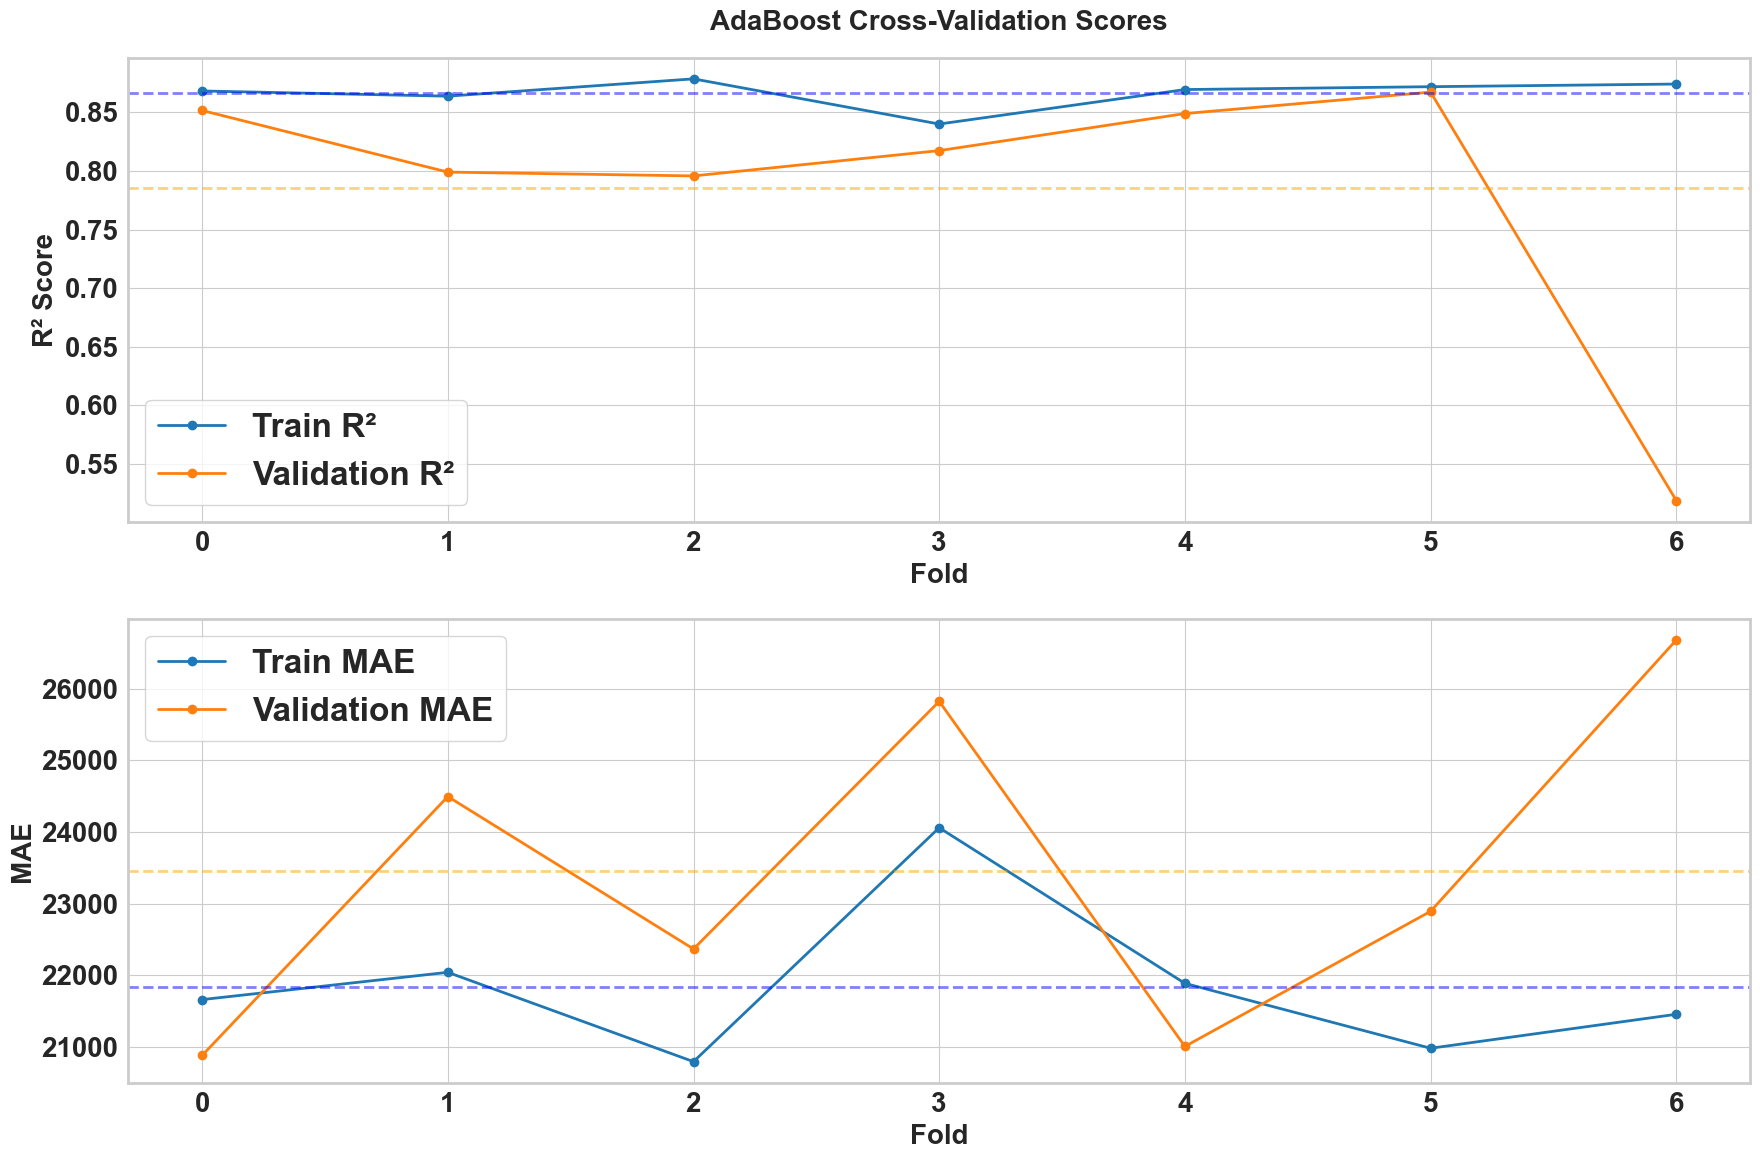

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000132 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 859
[LightGBM] [Info] Number of data points in the train set: 2344, number of used features: 23
[LightGBM] [Info] Start training from score 160000.000000


2024-10-24 00:02:09,438 - __main__ - INFO - 
Selected 4 models for hypertuning:
2024-10-24 00:02:09,438 - __main__ - INFO - Model: CatBoost, Train R²: 0.9346, Test R²: 0.9242, Train MAE: 12868.3389, Test MAE: 15541.8739, Delta: 0.0104
2024-10-24 00:02:09,438 - __main__ - INFO - Model: LightGBM, Train R²: 0.9082, Test R²: 0.9042, Train MAE: 12775.6973, Test MAE: 16584.3566, Delta: 0.0041
2024-10-24 00:02:09,438 - __main__ - INFO - Model: RandomForest, Train R²: 0.9346, Test R²: 0.8902, Train MAE: 14184.6845, Test MAE: 17962.2837, Delta: 0.0444
2024-10-24 00:02:09,451 - __main__ - INFO - Model: AdaBoost, Train R²: 0.8663, Test R²: 0.8581, Train MAE: 21712.3702, Test MAE: 23014.7327, Delta: 0.0082


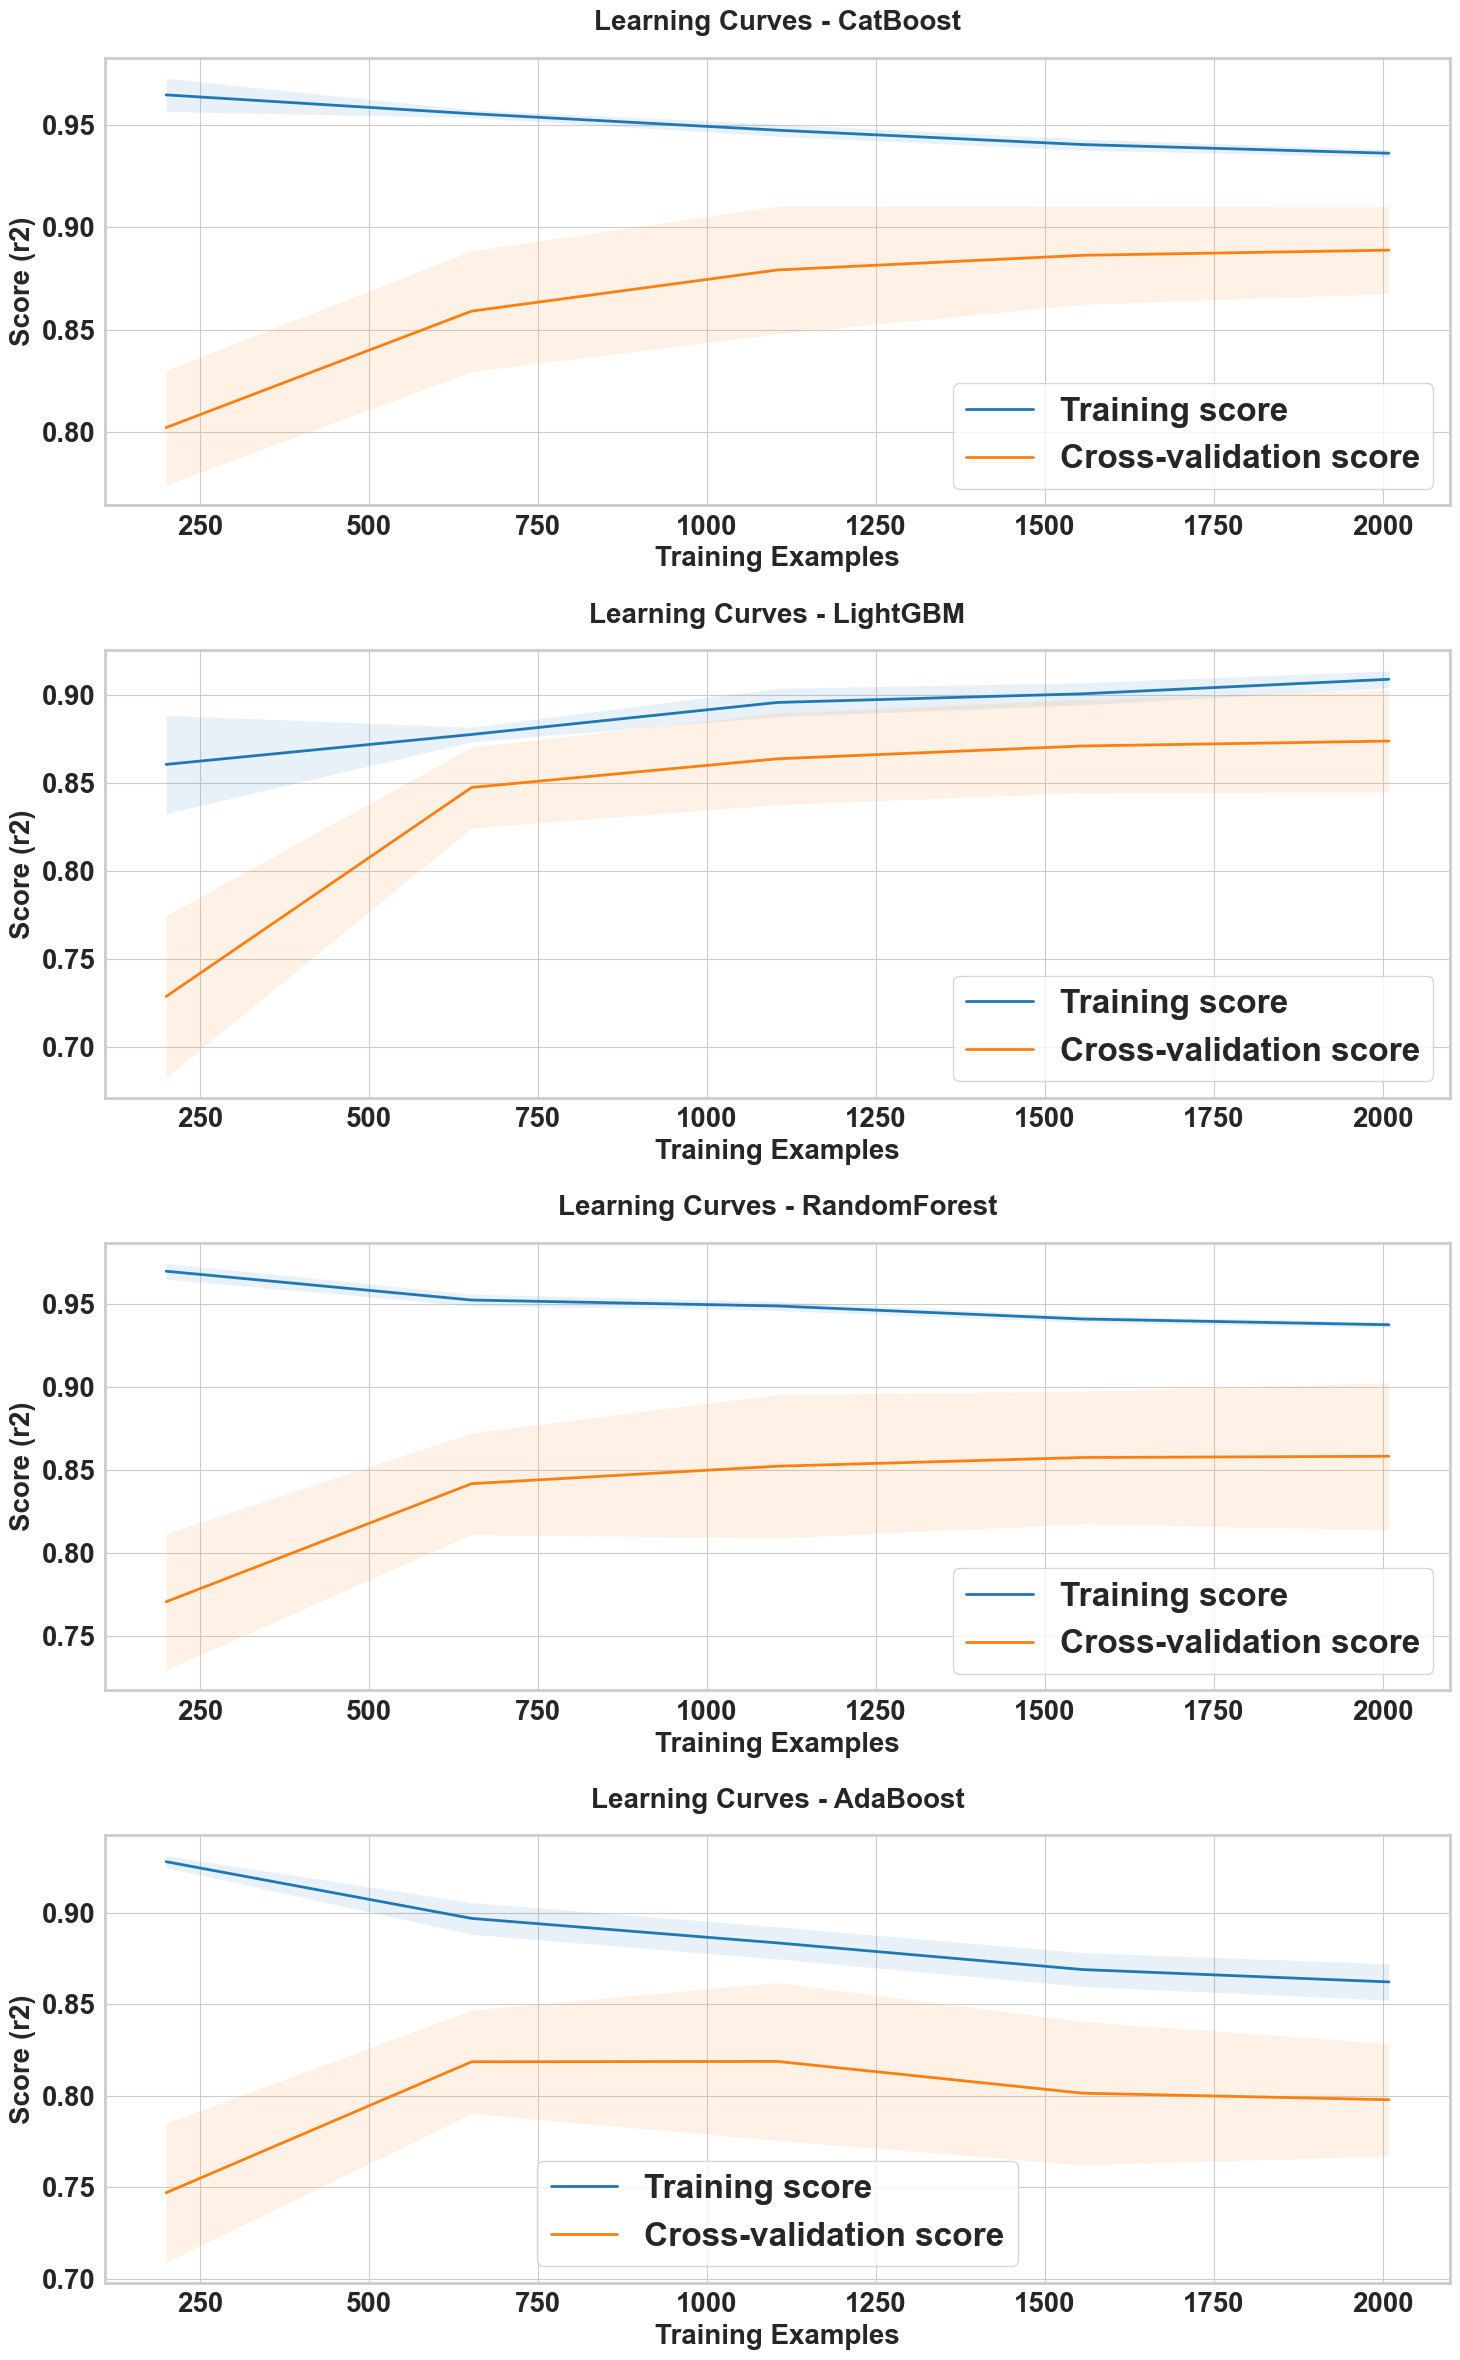

2024-10-24 00:03:01,672 - __main__ - INFO - Starting hyperparameter tuning...
2024-10-24 00:03:01,672 - __main__ - INFO - Tuning CatBoost...
2024-10-24 04:43:46,991 - __main__ - INFO - Best parameters for CatBoost: {'depth': 6, 'iterations': 1000, 'l2_leaf_reg': 7, 'learning_rate': 0.05, 'subsample': 0.8}
Best score: 0.8963
2024-10-24 04:43:47,018 - __main__ - INFO - Tuning LightGBM...


KeyboardInterrupt: 

In [27]:
import os
import time, datetime
import pickle
import logging
import pandas as pd
import numpy as np
from typing import Dict, List, Tuple, Optional, Union
from sklearn.base import BaseEstimator, TransformerMixin, clone
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import (
    GridSearchCV, 
    KFold, 
    learning_curve,
    validation_curve,
    train_test_split
)
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import matplotlib.pyplot as plt
import re
import warnings

# Configure logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s'
)
logger = logging.getLogger(__name__)

# Constants
TRAIN_TEST_DELTA_THRESHOLD = 0.2
NUM_MODELS = 4 # Can be int, str, or None
CAT_THRESHOLD = 10   # If missing values are below this %, impute with mode
MERGE_THRESHOLD = 8  # If subcategories account for less than this %, merge to form 'Others'
CV_FOLDS = 7        # Number of cross-fold validations

# Model name mapping for convenience
MODEL_NAME_MAPPING = {
    'rf': 'RandomForest',
    'lgbm': 'LightGBM',
    'cat': 'CatBoost',
    'ada': 'AdaBoost',
    'RandomForest': 'RandomForest',
    'LightGBM': 'LightGBM',
    'CatBoost': 'CatBoost',
    'AdaBoost': 'AdaBoost'
}

# Parameter Grids
PARAM_GRIDS = {
    'RandomForest': {
        'max_depth': [5, 7, 9, 11, None],
        'n_estimators': [100, 200, 300],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'LightGBM': {
        'num_leaves': [31, 63, 127],
        'learning_rate': [0.01, 0.05, 0.1],
        'n_estimators': [100, 200, 300],
        'min_child_samples': [20, 50, 100],
        'subsample': [0.8, 0.9, 1.0],
        'colsample_bytree': [0.8, 0.9, 1.0],
        'verbose': [-1]
    },
    'CatBoost': {
        'depth': [6, 8, 10],
        'learning_rate': [0.01, 0.05, 0.1],
        'iterations': [500, 1000],
        'l2_leaf_reg': [3, 5, 7],
        'subsample': [0.8, 0.9, 1.0]
    },
    'AdaBoost': {  
        'n_estimators': [50, 100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1, 1.0],
        'loss': ['linear', 'square', 'exponential']  
    }
}

class DataLoader:
    """Handles data loading and initial preprocessing"""
    def __init__(self, file_path: str):
        self.file_path = file_path
        
    def load_data(self) -> pd.DataFrame:
        """Loads data from file and performs initial checks"""
        try:
            file_ext = os.path.splitext(self.file_path)[1].lower()
            
            if file_ext == '.csv':
                data = pd.read_csv(self.file_path)
            elif file_ext in ['.xlsx', '.xls']:
                data = pd.read_excel(self.file_path)
            else:
                raise ValueError(f"Unsupported file format: {file_ext}")
                
            logger.info(f"Loaded {len(data)} rows and {len(data.columns)} columns")
            return data
            
        except Exception as e:
            logger.error(f"Error loading data: {str(e)}")
            raise

class ColumnProcessor:
    """Handles column normalization and validation"""
    @staticmethod
    def normalize_column_names(df: pd.DataFrame) -> pd.DataFrame:
        """Normalizes column names by removing spaces and special characters"""
        df_copy = df.copy()
        df_copy.columns = [re.sub(r'[^a-zA-Z0-9]', '', col.strip()) for col in df_copy.columns]
        return df_copy

class FeaturePreprocessor(BaseEstimator, TransformerMixin):
    """Handles initial feature preprocessing including handling missing values and merging categories."""
    
    def __init__(
        self, 
        numeric_features: List[str], 
        categorical_features: List[str], 
        cat_threshold: float = CAT_THRESHOLD,
        merge_threshold: float = MERGE_THRESHOLD
    ):
        self.numeric_features = numeric_features
        self.categorical_features = categorical_features
        self.cat_threshold = cat_threshold
        self.merge_threshold = merge_threshold
        self.num_imputer = SimpleImputer(strategy='median')
        self.cat_modes = {}
        self.category_maps = {}

    def fit(self, X, y=None):
        """Learn preprocessing parameters from training data."""
        data = X.copy()
        
        # Fit numeric imputer
        numeric_data = data[self.numeric_features].copy()
        self.num_imputer.fit(numeric_data)
        
        # Learn categorical handling parameters
        for col in self.categorical_features:
            if col in data.columns:
                missing_ratio = data[col].isnull().mean() * 100
                
                if missing_ratio > self.cat_threshold:
                    unique_cats = list(data[col].dropna().unique())
                    self.category_maps[col] = unique_cats + ['Unknown']
                else:
                    self.cat_modes[col] = data[col].mode()[0]
                    value_counts = data[col].value_counts(normalize=True) * 100
                    keep_categories = value_counts[value_counts >= self.merge_threshold].index.tolist()
                    
                    if any(value_counts < self.merge_threshold):
                        keep_categories.append('Other')
                    
                    self.category_maps[col] = keep_categories
                    
                    logger.info(f"\nColumn: {col}")
                    logger.info(f"Categories to keep: {keep_categories}")
                    logger.info(f"Number of categories after merging: {len(keep_categories)}")

        return self

    def transform(self, X):
        """Apply preprocessing to features."""
        data = X.copy()
        
        # Transform numeric features
        numeric_data = data[self.numeric_features].copy()
        data[self.numeric_features] = self.num_imputer.transform(numeric_data)
        
        # Transform categorical features
        for col in self.categorical_features:
            if col in data.columns:
                missing_ratio = data[col].isnull().mean() * 100
                
                if missing_ratio > self.cat_threshold:
                    data[col] = data[col].fillna('Unknown')
                else:
                    data[col] = data[col].fillna(self.cat_modes[col])
                    
                    # Map values using comprehensive logic
                    known_categories = set(self.category_maps[col])
                    data[col] = data[col].apply(
                        lambda x: (x if x in known_categories else 'Other')
                        if 'Other' in known_categories
                        else (x if x in known_categories else next(iter(known_categories)))
                    )

        return data

    def get_feature_names(self, pipeline) -> Dict[str, List[str]]:
        """Get feature names after preprocessing and one-hot encoding"""
        try:
            categorical_encoded = []
            for col in self.categorical_features:
                if col in self.category_maps:
                    categories = self.category_maps[col][1:]
                    encoded_names = [f"{col}_{cat}" for cat in categories]
                    categorical_encoded.extend(encoded_names)
                    
                    logger.info(f"\nEncoding for {col}:")
                    logger.info(f"Original categories: {self.category_maps[col]}")
                    logger.info(f"Encoded features: {encoded_names}")

            feature_engineer = pipeline.named_steps['feature_engineering']
            engineered_features = feature_engineer.engineered_features if hasattr(feature_engineer, 'engineered_features') else []
            
            numeric_features = [f for f in self.numeric_features if f not in feature_engineer.features_to_drop]
            numeric_features.extend(engineered_features)
            
            feature_info = {
                'numeric_features': numeric_features,
                'categorical_features': categorical_encoded,
                'total_features': len(numeric_features) + len(categorical_encoded)
            }
            
            logger.info("\n=== Final Feature Counts ===")
            logger.info(f"Numeric features: {len(numeric_features)}")
            logger.info(f"Categorical features (encoded): {len(categorical_encoded)}")
            logger.info(f"Total features: {feature_info['total_features']}")
            
            return feature_info
            
        except Exception as e:
            logger.error(f"Error getting feature names: {str(e)}")
            raise

class FeatureEngineer(BaseEstimator, TransformerMixin):
    """Creates new features and removes original features used in engineering"""
    def __init__(self):
        self.original_features = None
        self.engineered_features = None
        self.features_to_drop = None
        
    def fit(self, X, y=None):
        """Identify features to be created and dropped"""
        X = pd.DataFrame(X) if not isinstance(X, pd.DataFrame) else X
        
        self.original_features = X.columns.tolist()
        self.engineered_features = []
        self.features_to_drop = set()
        
        feature_combinations = [
            (['GrLivArea', 'TotalBsmtSF'], 'TotalSqFt'),
            (['YrSold', 'YearBuilt'], 'HouseAge'),
            (['FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath'], 'TotalBaths'),
            (['YrSold', 'YearRemodAdd'], 'YrRemodAge')
        ]
        
        for required_cols, new_feature in feature_combinations:
            if all(col in X.columns for col in required_cols):
                self.engineered_features.append(new_feature)
                self.features_to_drop.update(required_cols)
        
        logger.info("\n=== Feature Engineering Information ===")
        logger.info(f"Original features to be dropped: {list(self.features_to_drop)}")
        logger.info(f"New engineered features: {self.engineered_features}")
        
        return self

    def transform(self, X):
        """Apply feature engineering transformations"""
        X = pd.DataFrame(X) if not isinstance(X, pd.DataFrame) else X
        data = X.copy()
        
        # Total Square Footage
        if all(col in data.columns for col in ['GrLivArea', 'TotalBsmtSF']):
            data['TotalSqFt'] = data['GrLivArea'].astype(float) + data['TotalBsmtSF'].fillna(0).astype(float)
        
        # House Age
        if all(col in data.columns for col in ['YrSold', 'YearBuilt']):
            data['HouseAge'] = data['YrSold'].astype(float) - data['YearBuilt'].astype(float)
        
        # Total Bathrooms
        bathroom_cols = ['FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath']
        if all(col in data.columns for col in bathroom_cols):
            data['TotalBaths'] = (
                data['FullBath'].astype(float) + 
                0.5 * data['HalfBath'].fillna(0).astype(float) + 
                data['BsmtFullBath'].fillna(0).astype(float) + 
                0.5 * data['BsmtHalfBath'].fillna(0).astype(float)
            )
        
        # Years since remodeling
        if all(col in data.columns for col in ['YrSold', 'YearRemodAdd']):
            data['YrRemodAge'] = data['YrSold'].astype(float) - data['YearRemodAdd'].astype(float)
        
        data = data.drop(columns=list(self.features_to_drop), errors='ignore')
        
        return data

class ModelTrainer:
    """Handles model training and evaluation"""
    def __init__(self):
        self.models = {
            'RandomForest': RandomForestRegressor(
                max_depth=7,
                n_estimators=100,
                random_state=42
            ),
            'LightGBM': LGBMRegressor(
                objective='regression_l1',
                metric='mae',
                num_leaves=31,
                learning_rate=0.1,
                n_estimators=50,
                min_child_samples=20,
                min_child_weight=1e-3,
                subsample=1.0,
                colsample_bytree=1.0,
                reg_alpha=0.0,
                reg_lambda=0.0
            ),
            'CatBoost': CatBoostRegressor(
                iterations=1000,
                learning_rate=0.01,
                depth=6,
                subsample=1.0,
                colsample_bylevel=1.0,
                min_data_in_leaf=1,
                verbose=0,
                objective="MAE",
                eval_metric="MAE",
                early_stopping_rounds=500
            ),
            'AdaBoost': AdaBoostRegressor(
                n_estimators=100,
                learning_rate=1.0
            )
        }
        
    def train_and_evaluate(
        self, 
        X_train: np.ndarray, 
        y_train: np.ndarray, 
        X_test: np.ndarray, 
        y_test: np.ndarray
    ) -> pd.DataFrame:
        """Trains multiple models and evaluates their performance"""
        results = []
        
        for name, model in self.models.items():
            start_time = time.time()
            
            model.fit(X_train, y_train)
            # Make predictions
            train_preds = model.predict(X_train)
            test_preds = model.predict(X_test)
            
            # Calculate metrics
            train_mae = mean_absolute_error(y_train, train_preds)
            test_mae = mean_absolute_error(y_test, test_preds)
            train_r2 = r2_score(y_train, train_preds)
            test_r2 = r2_score(y_test, test_preds)
            train_mape = mean_absolute_percentage_error(y_train, train_preds)
            test_mape = mean_absolute_percentage_error(y_test, test_preds)
            
            # Record results
            results.append({
                'Model': name,
                'Train MAE': train_mae,
                'Test MAE': test_mae,
                'Train R2': train_r2,
                'Test R2': test_r2,
                'Train MAPE': train_mape,
                'Test MAPE': test_mape,
                'Training Time': f"{time.time() - start_time:.2f}s"
            })
            
            logger.info(f"Trained {name}")
            
        return pd.DataFrame(results)

class ModelHypertuner:
    """Handles model hyperparameter tuning and validation analysis"""
    def __init__(
        self, 
        models: Dict,
        param_grids: Optional[Dict] = None,
        train_test_delta_threshold: float = TRAIN_TEST_DELTA_THRESHOLD,
        n_best_models: Optional[Union[int, str, List[str]]] = NUM_MODELS,
        cv_folds: int = CV_FOLDS,
        scoring: str = 'r2',
        n_jobs: int = -1
    ):
        self.models = models
        self.param_grids = param_grids or PARAM_GRIDS
        self.delta_threshold = train_test_delta_threshold
        self.models_to_select = n_best_models
        self.cv_folds = cv_folds
        self.scoring = scoring
        self.n_jobs = n_jobs
        self.best_models = {}
        self.cv_results = {}
        self.tuned_models = {}

    def _get_model_name(self, name: str) -> str:
        """Convert potential shorthand model names to full names"""
        return MODEL_NAME_MAPPING.get(name, name)

    def _filter_models(self) -> Dict:
        """Filter models based on models_to_select parameter"""
        if self.models_to_select is None:
            return self.models
            
        if isinstance(self.models_to_select, int):
            return self.models
            
        if isinstance(self.models_to_select, str):
            model_name = self._get_model_name(self.models_to_select)
            if model_name not in self.models:
                raise ValueError(f"Model {model_name} not found in available models")
            return {model_name: self.models[model_name]}
            
        if isinstance(self.models_to_select, (list, tuple)):
            selected_models = {}
            for name in self.models_to_select:
                model_name = self._get_model_name(name)
                if model_name not in self.models:
                    raise ValueError(f"Model {model_name} not found in available models")
                selected_models[model_name] = self.models[model_name]
            return selected_models
            
        raise ValueError("Invalid models_to_select parameter")

    def select_best_models(
        self, 
        X_train: np.ndarray, 
        y_train: np.ndarray,
        X_test: np.ndarray,
        y_test: np.ndarray
    ) -> Dict:
        """Select best models based on performance metrics or specification"""
        available_models = self._filter_models()
        model_scores = []

        for name, model in available_models.items():
            model.fit(X_train, y_train)
            
            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)

            train_mae = mean_absolute_error(y_train, y_train_pred)
            test_mae = mean_absolute_error(y_test, y_test_pred)
            train_r2 = r2_score(y_train, y_train_pred)
            test_r2 = r2_score(y_test, y_test_pred)
            score_delta = abs(train_r2 - test_r2)

            model_scores.append({
                'name': name,
                'model': model,
                'train_r2': train_r2,
                'test_r2': test_r2,
                'train_mae': train_mae,
                'test_mae': test_mae,
                'score_delta': score_delta
            })

        if isinstance(self.models_to_select, (str, list, tuple)):
            self.best_models = available_models
        else:
            valid_models = [
                model for model in model_scores 
                if model['score_delta'] <= self.delta_threshold
            ]

            if not valid_models:
                logger.warning(
                    f"No models found with train-test delta below {self.delta_threshold}. "
                    "Using all models."
                )
                valid_models = model_scores

            valid_models.sort(key=lambda x: x['test_r2'], reverse=True)
            n_models = self.models_to_select if isinstance(self.models_to_select, int) else 2
            selected_models = valid_models[:n_models]
            
            self.best_models = {
                model['name']: model['model'] for model in selected_models
            }

        logger.info(f"\nSelected {len(self.best_models)} models for hypertuning:")
        for name, model in self.best_models.items():
            score = next(s for s in model_scores if s['name'] == name)
            logger.info(
                f"Model: {name}, "
                f"Train R²: {score['train_r2']:.4f}, "
                f"Test R²: {score['test_r2']:.4f}, "
                f"Train MAE: {score['train_mae']:.4f}, "
                f"Test MAE: {score['test_mae']:.4f}, "
                f"Delta: {score['score_delta']:.4f}"
            )

        return self.best_models

    def tune_hyperparameters(
        self,
        X: np.ndarray,
        y: np.ndarray
    ) -> Dict:
        """Perform hyperparameter tuning using GridSearchCV"""
        logger.info("Starting hyperparameter tuning...")
        
        for name, model in self.best_models.items():
            if name not in self.param_grids:
                logger.warning(f"No parameter grid defined for {name}. Skipping tuning.")
                continue
                
            logger.info(f"Tuning {name}...")
            grid_search = GridSearchCV(
                estimator=model,
                param_grid=self.param_grids[name],
                cv=self.cv_folds,
                scoring=self.scoring,
                n_jobs=self.n_jobs,
                verbose=0
            )
            
            grid_search.fit(X, y)
            
            self.tuned_models[name] = grid_search.best_estimator_
            self.cv_results[name] = pd.DataFrame(grid_search.cv_results_)
            
            logger.info(
                f"Best parameters for {name}: {grid_search.best_params_}\n"
                f"Best score: {grid_search.best_score_:.4f}"
            )
        
        return self.tuned_models

    def plot_learning_curves(
        self,
        X: np.ndarray,
        y: np.ndarray,
        train_sizes: np.ndarray = np.linspace(0.1, 1.0, 5)
    ) -> None:
        """Plot learning curves for each selected model"""
        plt.figure(figsize=(15, 6 * len(self.best_models)))
        
        for idx, (name, model) in enumerate(self.best_models.items(), 1):
            train_sizes_abs, train_scores, test_scores = learning_curve(
                estimator=model,
                X=X,
                y=y,
                train_sizes=train_sizes,
                cv=self.cv_folds,
                n_jobs=self.n_jobs,
                scoring=self.scoring
            )
            
            train_mean = np.mean(train_scores, axis=1)
            train_std = np.std(train_scores, axis=1)
            test_mean = np.mean(test_scores, axis=1)
            test_std = np.std(test_scores, axis=1)
            
            plt.subplot(len(self.best_models), 1, idx)
            
            plt.plot(train_sizes_abs, train_mean, label='Training score')
            plt.plot(train_sizes_abs, test_mean, label='Cross-validation score')
            
            plt.fill_between(
                train_sizes_abs,
                train_mean - train_std,
                train_mean + train_std,
                alpha=0.1
            )
            plt.fill_between(
                train_sizes_abs,
                test_mean - test_std,
                test_mean + test_std,
                alpha=0.1
            )
            
            plt.title(f'Learning Curves - {name}')
            plt.xlabel('Training Examples')
            plt.ylabel(f'Score ({self.scoring})')
            plt.legend(loc='best')
            plt.grid(True)
        
        plt.tight_layout()
        plt.show()

    def get_cv_summary(self) -> pd.DataFrame:
        """Generate a summary of cross-validation results"""
        summary_data = []
        
        for name, cv_result in self.cv_results.items():
            best_idx = cv_result['rank_test_score'].argmin()
            
            summary_data.append({
                'Model': name,
                'Best Score': cv_result.loc[best_idx, 'mean_test_score'],
                'Std Score': cv_result.loc[best_idx, 'std_test_score'],
                'Best Parameters': cv_result.loc[best_idx, 'params']
            })
        
        return pd.DataFrame(summary_data)

class TunedModelTrainer:
    """Handles training of models using hypertuned parameters"""
    
    def __init__(self):
        self.best_models = {}
        self.model_predictions = {}
        self.performance_metrics = {}
        self.feature_names = None
        
    def set_feature_names(self, pipeline, original_features: List[str]):
        """Set feature names based on the preprocessing pipeline and original features"""
        try:
            final_preprocessor = pipeline.named_steps.get('final_preprocessing')
            if not final_preprocessor:
                logger.warning("Could not find final preprocessing step in pipeline")
                return
                
            numeric_features = final_preprocessor.named_transformers_['num'].get_feature_names_out()
            categorical_features = final_preprocessor.named_transformers_['cat'].get_feature_names_out()
            
            self.feature_names = np.concatenate([numeric_features, categorical_features])
            
            logger.info(f"\nFeature names set: {len(self.feature_names)} features")
            
        except Exception as e:
            logger.error(f"Error setting feature names: {str(e)}")
            self.feature_names = [f"feature_{i}" for i in range(100)]

    def get_feature_importance(self, model_name: str) -> Optional[pd.DataFrame]:
        """Get feature importance for a specific model"""
        if model_name not in self.best_models:
            logger.warning(f"Model {model_name} not found in trained models")
            return None
            
        model = self.best_models[model_name]
        
        try:
            feature_names = self.feature_names or [f"feature_{i}" for i in range(100)]
            
            if hasattr(model, 'feature_importances_'):
                importance = model.feature_importances_
            elif hasattr(model, 'coef_'):
                importance = np.abs(model.coef_)
                if importance.ndim > 1:
                    importance = np.mean(importance, axis=0)
            else:
                logger.warning(f"Feature importance not available for {model_name}")
                return None
            
            importance_df = pd.DataFrame({
                'Feature': feature_names[:len(importance)],
                'Importance': importance
            })
            
            importance_df = importance_df.sort_values('Importance', ascending=False).reset_index(drop=True)
            importance_df['Relative Importance (%)'] = (
                importance_df['Importance'] / importance_df['Importance'].sum() * 100
            )
            
            return importance_df
            
        except Exception as e:
            logger.error(f"Error getting feature importance: {str(e)}")
            return None
            
    def train_with_tuned_params(
        self,
        cv_results: Dict,
        X_train: np.ndarray,
        y_train: np.ndarray,
        X_test: np.ndarray,
        y_test: np.ndarray,
        models: Dict,
        pipeline = None,
        original_features: List[str] = None
    ) -> Tuple[Dict, pd.DataFrame]:
        """Train models using the best parameters found from GridSearchCV"""
        if pipeline and original_features:
            self.set_feature_names(pipeline, original_features)
        
        metrics_list = []
        
        if not cv_results:
            logger.warning("No CV results provided. Using default parameters.")
            for model_name, model in models.items():
                self._train_single_model(
                    model_name, model, model.get_params(),
                    X_train, y_train, X_test, y_test, metrics_list
                )
        else:
            for model_name, model_cv_results in cv_results.items():
                if model_name not in models:
                    continue
                    
                if isinstance(model_cv_results, pd.DataFrame) and 'params' in model_cv_results.columns:
                    best_idx = model_cv_results['rank_test_score'].argmin()
                    best_params = model_cv_results.loc[best_idx, 'params']
                else:
                    best_params = models[model_name].get_params()
                
                self._train_single_model(
                    model_name, models[model_name], best_params,
                    X_train, y_train, X_test, y_test, metrics_list
                )
        
        if not self.model_predictions:
            raise ValueError("No models were successfully trained")
            
        return self.best_models, pd.DataFrame(metrics_list)

    def _train_single_model(
        self,
        model_name: str,
        base_model,
        params: Dict,
        X_train: np.ndarray,
        y_train: np.ndarray,
        X_test: np.ndarray,
        y_test: np.ndarray,
        metrics_list: List
    ):
        """Helper method to train a single model and record metrics"""
        try:
            logger.info(f"\nTraining {model_name} with parameters:")
            for param, value in params.items():
                logger.info(f"  {param}: {value}")
            
            # Create and train model
            start_time = time.time()
            model = type(base_model)(**params)
            model.fit(X_train, y_train)
            training_time = time.time() - start_time
            
            # Make predictions
            train_pred = model.predict(X_train)
            test_pred = model.predict(X_test)
            
            # Store model and predictions
            self.best_models[model_name] = model
            self.model_predictions[model_name] = {
                'train': train_pred,
                'test': test_pred
            }
            
            # Calculate metrics
            metrics = {
                'Model': model_name,
                'Train R²': r2_score(y_train, train_pred),
                'Test R²': r2_score(y_test, test_pred),
                'Train MAE': mean_absolute_error(y_train, train_pred),
                'Test MAE': mean_absolute_error(y_test, test_pred),
                'Train MAPE': mean_absolute_percentage_error(y_train, train_pred),
                'Test MAPE': mean_absolute_percentage_error(y_test, test_pred),
                'Training Time': f"{training_time:.2f}s",
                'Best Parameters': params
            }
            
            metrics_list.append(metrics)
            self.performance_metrics[model_name] = metrics
            
            logger.info(f"Successfully trained {model_name}")
            logger.info(f"Training time: {training_time:.2f}s")
            logger.info(f"Test R²: {metrics['Test R²']:.4f}")
            logger.info(f"Test MAE: {metrics['Test MAE']:.4f}")
            
        except Exception as e:
            logger.error(f"Error training {model_name}: {str(e)}")
    
    def get_ensemble_predictions(
        self,
        weights: Optional[Dict[str, float]] = None
    ) -> Tuple[np.ndarray, np.ndarray]:
        """Create weighted ensemble predictions from tuned models"""
        if not self.model_predictions:
            raise ValueError("No model predictions available. Train models first.")
            
        if weights is None:
            weights = {
                model_name: 1/len(self.model_predictions) 
                for model_name in self.model_predictions.keys()
            }
            
        if set(weights.keys()) != set(self.model_predictions.keys()):
            raise ValueError("Weights must be provided for all models")
            
        first_model = next(iter(self.model_predictions.values()))
        train_pred = np.zeros_like(first_model['train'])
        test_pred = np.zeros_like(first_model['test'])
        
        logger.info("\n=== Creating Ensemble Predictions ===")
        logger.info("Model weights:")
        for model_name, weight in weights.items():
            logger.info(f"  {model_name}: {weight:.3f}")
            train_pred += weight * self.model_predictions[model_name]['train']
            test_pred += weight * self.model_predictions[model_name]['test']
            
        return train_pred, test_pred

def save_models(base_models: Dict, tuned_models: Dict, model_dir: str = './models') -> None:
    """Save base and hypertuned models to specified directory"""
    os.makedirs(model_dir, exist_ok=True)
    timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M")
    
    logger.info("\nSaving base models...")
    for name, model in base_models.items():
        filename = f"{name}_base_{timestamp}.pkl"
        path = os.path.join(model_dir, filename)
        with open(path, 'wb') as f:
            pickle.dump(model, f)
        logger.info(f"Saved base model: {filename}")
    
    logger.info("\nSaving tuned models...")
    for name, model in tuned_models.items():
        filename = f"{name}_tuned_{timestamp}.pkl"
        path = os.path.join(model_dir, filename)
        with open(path, 'wb') as f:
            pickle.dump(model, f)
        logger.info(f"Saved tuned model: {filename}")

def load_model(model_path: str) -> object:
    """Load a specific model from file"""
    with open(model_path, 'rb') as f:
        model = pickle.load(f)
    return model

def list_saved_models(model_dir: str = './models') -> pd.DataFrame:
    """List all saved models with their details"""
    if not os.path.exists(model_dir):
        return pd.DataFrame()
    
    models_info = []
    for filename in os.listdir(model_dir):
        if filename.endswith('.pkl'):
            name_parts = filename.replace('.pkl', '').split('_')
            model_name = name_parts[0]
            model_type = name_parts[1]
            timestamp = '_'.join(name_parts[2:])
            
            models_info.append({
                'Model Name': model_name,
                'Type': model_type,
                'Timestamp': timestamp,
                'Filename': filename,
                'Path': os.path.join(model_dir, filename)
            })
    
    return pd.DataFrame(models_info)

class HousePricePipeline:
    """Main pipeline class that orchestrates the entire process"""
    def __init__(self, file_path: str):
        self.file_path = file_path
        self.data_loader = DataLoader(file_path)
        self.column_processor = ColumnProcessor()
        
        # Define feature groups
        self.engineering_features = [
            'GrLivArea', 'TotalBsmtSF',
            'YrSold', 'YearBuilt',
            'FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath',
            'YearRemodAdd'
        ]
        
        self.original_numeric_features = [
            'OverallQual',
            'TotRmsAbvGrd',
            'GarageCars',
            'Fireplaces',
            'LotFrontage',
            'MasVnrArea'
        ]
        
        self.engineered_features = [
            'TotalSqFt',
            'HouseAge',
            'TotalBaths',
            'YrRemodAge'
        ]
        
        self.numeric_features = self.original_numeric_features + self.engineered_features
        
        self.categorical_features = [
            'Neighborhood',
            'FireplaceQu',
            'KitchenQual',
            'BsmtExposure'
        ]

    def create_preprocessing_pipeline(self) -> Pipeline:
        """Creates the preprocessing pipeline"""
        numeric_transformer = Pipeline(steps=[
            ('scaler', StandardScaler())
        ])
        
        categorical_transformer = Pipeline(steps=[
            ('onehot', OneHotEncoder(
                drop='first',
                sparse_output=False,
                handle_unknown='ignore'
            ))
        ])
        
        initial_numeric_features = list(set(
            self.engineering_features + 
            [f for f in self.numeric_features if f not in self.engineered_features]
        ))
        
        initial_preprocessor = FeaturePreprocessor(
            numeric_features=initial_numeric_features,
            categorical_features=self.categorical_features
        )
        
        final_preprocessor = ColumnTransformer(
            transformers=[
                ('num', numeric_transformer, self.numeric_features),
                ('cat', categorical_transformer, self.categorical_features)
            ],
            remainder='drop'
        )
        
        return Pipeline([
            ('initial_preprocessing', initial_preprocessor),
            ('feature_engineering', FeatureEngineer()),
            ('final_preprocessing', final_preprocessor)
        ])

    def run(self) -> Tuple[Dict, Dict]:
        """Runs the entire pipeline"""
        try:
            logger.info("Starting house price prediction pipeline...")
            
            # Load and preprocess data
            data = self.data_loader.load_data()
            data = self.column_processor.normalize_column_names(data)
            
            # Split features and target
            X = data.drop('SalePrice', axis=1)
            y = data['SalePrice']
            
            # Create train-test split
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.2, random_state=42
            )

            # Create and fit preprocessing pipeline
            preprocessing_pipeline = self.create_preprocessing_pipeline()
            X_train_processed = preprocessing_pipeline.fit_transform(X_train)
            X_test_processed = preprocessing_pipeline.transform(X_test)
            y_train = y_train.reset_index(drop=True)
            
            # Get feature information
            feature_preprocessor = preprocessing_pipeline.named_steps['initial_preprocessing']
            feature_info = feature_preprocessor.get_feature_names(preprocessing_pipeline)

            # Initialize trainer and cross-validation
            trainer = ModelTrainer()
            hypertuner = ModelHypertuner(
                models=trainer.models,
                param_grids=PARAM_GRIDS,
                train_test_delta_threshold=TRAIN_TEST_DELTA_THRESHOLD,
                n_best_models=NUM_MODELS
            )
            
            # Select best models
            best_models = hypertuner.select_best_models(
                X_train_processed, y_train,
                X_test_processed, y_test
            )
            
            # Tune hyperparameters
            tuned_models = hypertuner.tune_hyperparameters(
                X_train_processed,
                y_train
            )
            
            # Train final models
            tuned_trainer = TunedModelTrainer()
            final_models, metrics = tuned_trainer.train_with_tuned_params(
                cv_results=hypertuner.cv_results,
                X_train=X_train_processed,
                y_train=y_train,
                X_test=X_test_processed,
                y_test=y_test,
                models=trainer.models,
                pipeline=preprocessing_pipeline,
                original_features=X.columns.tolist()
            )
            
            # Create ensemble predictions
            train_ensemble, test_ensemble = tuned_trainer.get_ensemble_predictions()
            
            # Calculate ensemble metrics
            ensemble_metrics = {
                'Model': 'Ensemble',
                'Train R²': r2_score(y_train, train_ensemble),
                'Test R²': r2_score(y_test, test_ensemble),
                'Train MAE': mean_absolute_error(y_train, train_ensemble),
                'Test MAE': mean_absolute_error(y_test, test_ensemble),
                'Training Time': 'N/A',
                'Best Parameters': 'N/A'
            }
            
            metrics = pd.concat([
                metrics,
                pd.DataFrame([ensemble_metrics])
            ], ignore_index=True)
            
            # Get feature importance
            feature_importance = {
                name: tuned_trainer.get_feature_importance(name)
                for name in final_models.keys()
            }
            
            # Save models
            save_models(trainer.models, final_models)
            
            logger.info("Pipeline completed successfully")
            
            return {
                'pipeline': preprocessing_pipeline,
                'feature_info': feature_info,
                'models': trainer.models,
                'tuned_models': final_models,
                'ensemble_predictions': (train_ensemble, test_ensemble),
                'feature_importance': feature_importance,
                'X_train': X_train_processed,
                'X_test': X_test_processed,
                'y_train': y_train,
                'y_test': y_test
            }, {
                'model_metrics': metrics,
                'cv_summary': hypertuner.get_cv_summary()
            }
            
        except Exception as e:
            logger.error(f"Pipeline failed: {str(e)}")
            raise
    
    def plot_feature_importance(self, importance_df: pd.DataFrame, model_name: str) -> None:
        """Plot feature importance for a given model"""
        plt.figure(figsize=(12, 6))
        sns.barplot(
            data=importance_df.head(10),
            x='Relative Importance (%)',
            y='Feature',
            palette='viridis'
        )
        plt.title(f'Top 10 Important Features - {model_name}')
        plt.tight_layout()
        plt.show()

    def plot_cv_results(self, cv_results: Dict[str, Dict]) -> None:
        """Plot cross-validation results for each model"""
        for model_name, results in cv_results.items():
            plt.figure(figsize=(18, 12))
            
            # Plot R² scores
            plt.subplot(2, 1, 1)
            plt.plot(np.arangeresults['train_scores'], 'o-', label='Train R²')
            plt.plot(results['val_scores'], 'o-', label='Validation R²')
            plt.axhline(y=results['train_mean_r2'], color='b', linestyle='--', alpha=0.5)
            plt.axhline(y=results['val_mean_r2'], color='orange', linestyle='--', alpha=0.5)
            plt.title(f'{model_name} Cross-Validation Scores')
            plt.xlabel('Fold')
            plt.ylabel('R² Score')
            plt.legend()
            plt.grid(True)
            
            # Plot MAE scores
            plt.subplot(2, 1, 2)
            plt.plot(results['train_mae'], 'o-', label='Train MAE')
            plt.plot(results['val_mae'], 'o-', label='Validation MAE')
            plt.axhline(y=results['train_mean_mae'], color='b', linestyle='--', alpha=0.5)
            plt.axhline(y=results['val_mean_mae'], color='orange', linestyle='--', alpha=0.5)
            plt.xlabel('Fold')
            plt.ylabel('MAE')
            plt.legend()
            plt.grid(True)
            
            plt.tight_layout()
            plt.show()

    def run(self) -> Tuple[Dict, Dict]:
        """Runs the entire pipeline"""
        try:
            # 1. Initial Setup and Data Loading
            logger.info("Starting house price prediction pipeline...")
            data = self.data_loader.load_data()
            data = self.column_processor.normalize_column_names(data)
            
            # 2. Data Splitting
            X = data.drop('SalePrice', axis=1)
            y = data['SalePrice']
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.2, random_state=42
            )

            # 3. Feature Processing
            preprocessing_pipeline = self.create_preprocessing_pipeline()
            
            # Initial preprocessing and feature engineering
            X_train_processed = preprocessing_pipeline.fit_transform(X_train)
            X_test_processed = preprocessing_pipeline.transform(X_test)
            y_train = y_train.reset_index(drop=True)
            
            # Get feature information for logging
            feature_preprocessor = preprocessing_pipeline.named_steps['initial_preprocessing']
            feature_info = feature_preprocessor.get_feature_names(preprocessing_pipeline)

            # 4. Initial Model Training and Cross-Validation
            trainer = ModelTrainer()
            cv_results = {}
            
            for model_name, model in trainer.models.items():
                logger.info(f"\nPerforming {CV_FOLDS}-fold CV for {model_name}")
                cv_result = self._perform_cross_validation(
                    model, model_name, X_train_processed, y_train
                )
                cv_results[model_name] = cv_result
                
                # Plot CV results for each model
                self.plot_cv_results({model_name: cv_result})

            # 5. Model Selection
            hypertuner = ModelHypertuner(
                models=trainer.models,
                param_grids=PARAM_GRIDS,
                train_test_delta_threshold=TRAIN_TEST_DELTA_THRESHOLD,
                n_best_models=NUM_MODELS
            )
            
            best_models = hypertuner.select_best_models(
                X_train_processed, y_train,
                X_test_processed, y_test
            )

            # 6. Learning Curves for Selected Models
            hypertuner.plot_learning_curves(X_train_processed, y_train)

            # 7. Hyperparameter Tuning
            tuned_models = hypertuner.tune_hyperparameters(
                X_train_processed,
                y_train
            )

            # 8. Final Model Training
            tuned_trainer = TunedModelTrainer()
            final_models, metrics = tuned_trainer.train_with_tuned_params(
                cv_results=hypertuner.cv_results,
                X_train=X_train_processed,
                y_train=y_train,
                X_test=X_test_processed,
                y_test=y_test,
                models=trainer.models,
                pipeline=preprocessing_pipeline,
                original_features=X.columns.tolist()
            )

            # 9. Feature Importance Analysis
            feature_importance = {}
            for model_name in final_models.keys():
                importance_df = tuned_trainer.get_feature_importance(model_name)
                if importance_df is not None:
                    feature_importance[model_name] = importance_df
                    self.plot_feature_importance(importance_df, model_name)

            # 10. Ensemble Predictions
            train_ensemble, test_ensemble = tuned_trainer.get_ensemble_predictions()
            
            ensemble_metrics = {
                'Model': 'Ensemble',
                'Train R²': r2_score(y_train, train_ensemble),
                'Test R²': r2_score(y_test, test_ensemble),
                'Train MAE': mean_absolute_error(y_train, train_ensemble),
                'Test MAE': mean_absolute_error(y_test, test_ensemble),
                'Training Time': 'N/A',
                'Best Parameters': 'N/A'
            }
            
            metrics = pd.concat([
                metrics,
                pd.DataFrame([ensemble_metrics])
            ], ignore_index=True)

            # 11. Save Models and Results
            save_models(trainer.models, final_models)
            
            logger.info("Pipeline completed successfully")
            
            return {
                'pipeline': preprocessing_pipeline,
                'feature_info': feature_info,
                'cv_results': cv_results,
                'models': trainer.models,
                'tuned_models': final_models,
                'ensemble_predictions': (train_ensemble, test_ensemble),
                'feature_importance': feature_importance,
                'X_train': X_train_processed,
                'X_test': X_test_processed,
                'y_train': y_train,
                'y_test': y_test
            }, {
                'model_metrics': metrics,
                'cv_summary': hypertuner.get_cv_summary()
            }
            
        except Exception as e:
            logger.error(f"Pipeline failed: {str(e)}")
            raise

    def _perform_cross_validation(
        self,
        model,
        model_name: str,
        X: np.ndarray,
        y: np.ndarray
    ) -> Dict:
        """Perform k-fold cross-validation for a single model"""
        kf = KFold(n_splits=CV_FOLDS, shuffle=True, random_state=42)
        cv_results = {
            'fold_scores': [],
            'train_scores': [],
            'val_scores': [],
            'train_mae': [],
            'val_mae': []
        }
        
        for fold, (train_idx, val_idx) in enumerate(kf.split(X), 1):
            # Split data
            X_fold_train = X[train_idx]
            X_fold_val = X[val_idx]
            y_fold_train = y.iloc[train_idx]
            y_fold_val = y.iloc[val_idx]
            
            # Train model
            fold_model = clone(model)
            fold_model.fit(X_fold_train, y_fold_train)
            
            # Get predictions
            train_pred = fold_model.predict(X_fold_train)
            val_pred = fold_model.predict(X_fold_val)
            
            # Calculate metrics
            train_r2 = r2_score(y_fold_train, train_pred)
            val_r2 = r2_score(y_fold_val, val_pred)
            train_mae = mean_absolute_error(y_fold_train, train_pred)
            val_mae = mean_absolute_error(y_fold_val, val_pred)
            
            # Store results
            cv_results['fold_scores'].append({
                'fold': fold,
                'train_r2': train_r2,
                'val_r2': val_r2,
                'train_mae': train_mae,
                'val_mae': val_mae
            })
            cv_results['train_scores'].append(train_r2)
            cv_results['val_scores'].append(val_r2)
            cv_results['train_mae'].append(train_mae)
            cv_results['val_mae'].append(val_mae)
            
            logger.info(f"\nFold {fold} Results for {model_name}:")
            logger.info(f"Train R2: {train_r2:.4f}")
            logger.info(f"Validation R2: {val_r2:.4f}")
            logger.info(f"Train MAE: {train_mae:.4f}")
            logger.info(f"Validation MAE: {val_mae:.4f}")
        
        # Calculate averages
        cv_results['train_mean_r2'] = np.mean(cv_results['train_scores'])
        cv_results['train_std_r2'] = np.std(cv_results['train_scores'])
        cv_results['val_mean_r2'] = np.mean(cv_results['val_scores'])
        cv_results['val_std_r2'] = np.std(cv_results['val_scores'])
        cv_results['train_mean_mae'] = np.mean(cv_results['train_mae'])
        cv_results['val_mean_mae'] = np.mean(cv_results['val_mae'])
        
        return cv_results
    
    def print_summary(self, results: Dict) -> None:
        """Print summary of pipeline results with improved formatting"""
        print("\n=== House Price Prediction Pipeline Summary ===")
        
        if 'feature_info' in results:
            print("\nFeature Information:")
            for key, value in results['feature_info'].items():
                if isinstance(value, list):
                    print(f"{key}: {len(value)} features")
                else:
                    print(f"{key}: {value}")
        
        if 'model_metrics' in results:
            print("\nModel Performance Metrics:")
            metrics_df = results['model_metrics']
            # Format numeric columns to 4 decimal places
            numeric_cols = ['Train R²', 'Test R²', 'Train MAE', 'Test MAE']
            for col in numeric_cols:
                if col in metrics_df.columns:
                    metrics_df[col] = metrics_df[col].map('{:.4f}'.format)
            print(metrics_df.to_string(index=False))
        
        print("\nModel Types Explanation:")
        print("- Initial: First version of models with default parameters")
        print("- Base: Models used as starting point for hyperparameter tuning")
        print("- Tuned: Models after hyperparameter optimization")
        print("- Hypertuned: Best performing models after extensive tuning")

    def get_cv_summary(self) -> pd.DataFrame:
        """Generate a detailed cross-validation summary"""
        summary_data = []
        
        for model_name, cv_result in self.cv_results.items():
            summary_data.append({
                'Model': model_name,
                'Mean Train R²': np.mean(cv_result['train_scores']),
                'Mean Test R²': np.mean(cv_result['val_scores']),
                'Train R² Std': np.std(cv_result['train_scores']),
                'Test R² Std': np.std(cv_result['val_scores']),
                'Mean Train MAE': np.mean(cv_result['train_mae']),
                'Mean Test MAE': np.mean(cv_result['val_mae']),
                'Train MAE Std': np.std(cv_result['train_mae']),
                'Test MAE Std': np.std(cv_result['val_mae'])
            })
        
        return pd.DataFrame(summary_data)

def main():
    """Main function to run the pipeline"""
    warnings.filterwarnings('ignore')
    
    file_path = './data/raw_data/AmesHousing.csv'
    
    try:
        pipeline = HousePricePipeline(file_path)
        artifacts, results = pipeline.run()
        pipeline.print_summary(results)
        
        logger.info("\nSaved Model Information:")
        models_info = list_saved_models()
        if not models_info.empty:
            print(models_info.to_string(index=False))
        
        return artifacts, results
        
    except Exception as e:
        logger.error(f"Error in main execution: {str(e)}")
        raise

if __name__ == "__main__":
    main()